# Automated Paddy Flooding Detection

In [10]:
!pip install rasterio rasterstats fiona geopandas geemap -q

Mounted at /content/drive


Processing Dates:   9%|▉         | 3/33 [01:52<15:37, 31.25s/it]

No images found for date 2022-01-27 within the specified cloud coverage.
Skipping date 2022-01-27 due to no valid MNDWI


Processing Dates:  12%|█▏        | 4/33 [03:39<29:31, 61.10s/it]

Started export task for Flooding_map_2022-02-01


Processing Dates:  27%|██▋       | 9/33 [09:37<29:44, 74.37s/it]

Started export task for Flooding_map_2022-02-26


Processing Dates:  45%|████▌     | 15/33 [17:51<26:39, 88.88s/it]

Started export task for Flooding_map_2022-03-28


Processing Dates:  64%|██████▎   | 21/33 [25:00<16:04, 80.38s/it]

Started export task for Flooding_map_2022-04-27


Processing Dates:  82%|████████▏ | 27/33 [34:56<09:39, 96.57s/it]

Started export task for Flooding_map_2022-05-27


Processing Dates: 100%|██████████| 33/33 [42:59<00:00, 78.17s/it]

Started export task for Flooding_map_2022-06-26


Map(bottom=119297.0, center=[16.540113899658394, -15.88279724121094], controls=(WidgetControl(options=['positi…

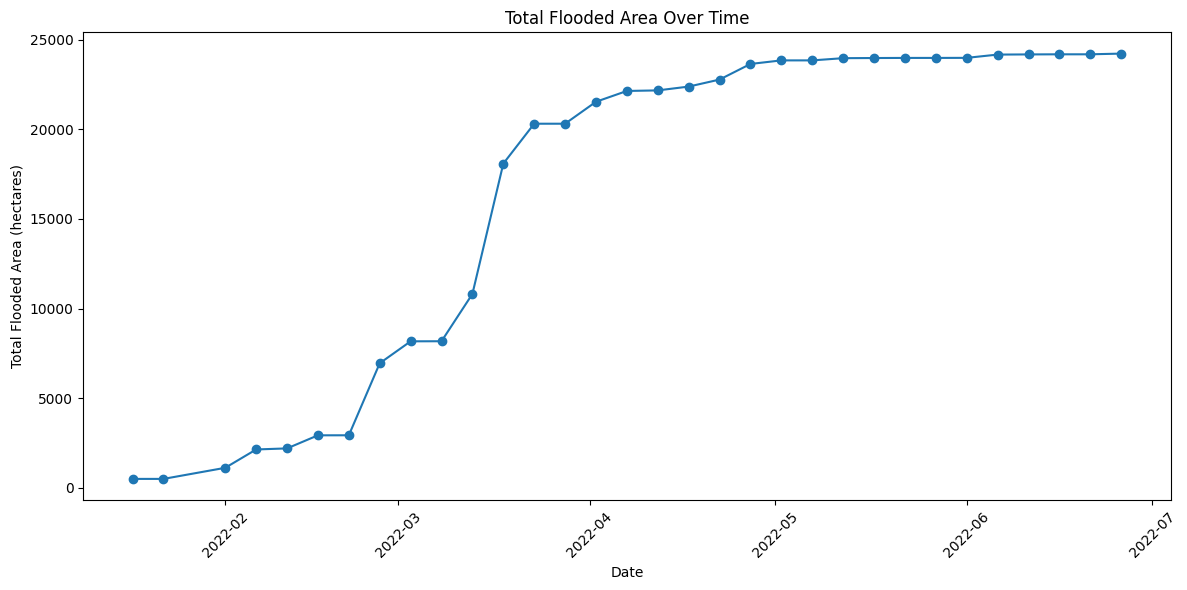

        Date  Flooded_Area
0 2022-01-17        488.19
1 2022-01-22        488.19
2 2022-02-01       1107.98
3 2022-02-06       2131.62
4 2022-02-11       2191.01
count       32.000000
mean     16513.337812
std       9372.959213
min        488.190000
25%       7863.437500
50%      22163.345000
75%      23987.820000
max      24233.560000
Name: Flooded_Area, dtype: float64


In [11]:
#@title updated - Process the images and extract flooded areas
!pip install rasterio rasterstats fiona geopandas geemap -q

#if using colab
using_colab = True
if using_colab:
  from google.colab import drive
  drive.mount ('/content/drive', force_remount=True)

import os
from rasterio.plot import show
import matplotlib.pyplot as plt
import geemap.colormaps as cm
import ee
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter, DayLocator
os.chdir('/content/drive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow')
from datetime import datetime
from IPython.display import display
import geemap
from branca.colormap import LinearColormap
import pandas as pd
import altair as alt
import numpy as np
import folium
import geemap.foliumap as geema
from geemap.basemaps import GoogleMapsTileProvider
from tqdm import tqdm

from updated_s2_flooding_detection import *

year = '2022'
# Define the date range for processing
start_date = '2022-01-17'
end_date = '2022-06-30'
# Process flooding data and create DataFrame for analysis
run_detection_flooding(aoi= dagana, grid=grid, start_date=start_date, end_date=end_date, year=year)

In [12]:
# Save DataFrame to HTML
m.to_html('flooded_areas_2022_dhs.html')

In [ ]:
using_colab = True
if using_colab:
  from google.colab import drive
  drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#@title Import packages
#@title updated - Process the images and extract flooded areas
import os
from rasterio.plot import show
import matplotlib.pyplot as plt
import geemap.colormaps as cm
import ee
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter, DayLocator
os.chdir('/content/drive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow')
from datetime import datetime
from IPython.display import display
import geemap
from branca.colormap import LinearColormap
import pandas as pd
import altair as alt
import numpy as np
import folium
import geemap.foliumap as geema
from geemap.basemaps import GoogleMapsTileProvider
from tqdm import tqdm

from updated_s2_flooding_detection import *

year = '2024'
# Define the date range for processing
start_date = '2024-01-17'
end_date = '2024-02-28'
# Process flooding data and create DataFrame for analysis
run_detection_flooding(aoi= dagana, grid=grid, start_date=start_date, end_date=end_date, year=year)

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [ ]:
# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")

# Additional layers
dagana_reservoir = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_reservoir")
dagana_water = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_water")
dagana_riverbanks = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_riverbanks")
dagana_wetland = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_wetland")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")

exclusion_areas = dagana_riverbanks.geometry() \
    .union(dagana_wetland.geometry()) \
    .union(dagana_reservoir.geometry()) \
    .union(dagana_water.geometry())

# Subtract exclusion areas from the initial Dagana region
dagana = init_dagana.geometry().difference(exclusion_areas)#.difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# Create a map
m = geemap.Map(center=[center_lat, center_lon], zoom=10)
# Add basemap
m.add_basemap('Esri.WorldImagery')
year = '2024'
# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-02-28'
#date_ranges = run_detection_flooding.enhanced_date_processing(start_date, end_date)
# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Process flooding data and create DataFrame for analysis
#flood_data = run_detection_flooding.process_and_visualize_flooding(dagana, date_ranges, grid)
run_detection_flooding(aoi= dagana, grid=grid, start_date=start_date, end_date=end_date, year=year)
# df = create_flood_dataframe(flood_data)
# df = df.reset_index()
# df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# # Pivot the table
# df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
# columns_date = df_pivoted.columns
# maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
# df_pivoted['flooding_date'] = maxValueIndex1

# # Assuming the columns_to_keep exist in your data
# columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
# df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
# df_pivoted = df_pivoted.rename_axis(index='grid_id')
# df_final = df_other.join(df_pivoted)
# df_final = df_final.reset_index()
# date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
# df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# output_file_name = f'floodingData_{year}.csv'
# df_final.to_csv(output_file_name, index=False)
# # Display the map
# display(m)
# # Add additional layers to the map
# m.addLayer(dagana_reservoir, {'color': 'blue'}, 'Dagana Reservoir')
# m.addLayer(dagana_water, {'color': 'cyan'}, 'Dagana Water')
# m.addLayer(dagana_riverbanks, {'color': 'green'}, 'Dagana Riverbanks')
# m.addLayer(dagana_wetland, {'color': 'brown'}, 'Dagana Wetland')

In [ ]:
# Example usage
project_id = 'ee-janet'
grid_path = "projects/ee-janet/assets/senegal/52_grid_dagana"
region_path = "projects/ee-janet/assets/senegal/dagana"
exclusion_paths = {
    'reservoir': "projects/ee-janet/assets/senegal/dagana_reservoir",
    'water': "projects/ee-janet/assets/senegal/dagana_water",
    'riverbanks': "projects/ee-janet/assets/senegal/dagana_riverbanks",
    'wetland': "projects/ee-janet/assets/senegal/dagana_wetland",
}

columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']

workflow = FloodDetectionWorkflow(
    project_id=project_id,
    grid_path=grid_path,
    region_path=region_path,
    exclusion_paths=exclusion_paths,
    year=2023,
    display_maps=True,
    export_maps=True
)

def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

df_final = workflow.run(
    start_date='2023-01-07',
    end_date='2023-05-31',
    save_df_path='flood_data_2023.csv',
    columns_to_keep=columns_to_keep
)


Processing Dates:   3%|▎         | 1/29 [00:57<26:41, 57.19s/it]

Started export task for Flooding_2023_2023-01-07


Processing Dates:   7%|▋         | 2/29 [02:02<27:53, 61.99s/it]

Started export task for Flooding_2023_2023-01-12


Processing Dates:  10%|█         | 3/29 [03:19<29:45, 68.68s/it]

Started export task for Flooding_2023_2023-01-17


Processing Dates:  14%|█▍        | 4/29 [04:21<27:29, 65.98s/it]

Started export task for Flooding_2023_2023-01-22


Processing Dates:  17%|█▋        | 5/29 [05:49<29:42, 74.26s/it]

Started export task for Flooding_2023_2023-01-27


Processing Dates:  21%|██        | 6/29 [07:37<32:47, 85.55s/it]

Started export task for Flooding_2023_2023-02-01


Processing Dates:  24%|██▍       | 7/29 [09:21<33:37, 91.73s/it]

Started export task for Flooding_2023_2023-02-06


Processing Dates:  28%|██▊       | 8/29 [11:08<33:47, 96.55s/it]

Started export task for Flooding_2023_2023-02-11


Processing Dates:  31%|███       | 9/29 [12:41<31:46, 95.32s/it]

Started export task for Flooding_2023_2023-02-16


Processing Dates:  34%|███▍      | 10/29 [15:05<34:57, 110.42s/it]

Started export task for Flooding_2023_2023-02-21


Processing Dates:  38%|███▊      | 11/29 [18:11<40:03, 133.53s/it]

Started export task for Flooding_2023_2023-02-26


Processing Dates:  41%|████▏     | 12/29 [20:17<37:11, 131.28s/it]

Started export task for Flooding_2023_2023-03-03


Processing Dates:  45%|████▍     | 13/29 [22:31<35:12, 132.06s/it]

Started export task for Flooding_2023_2023-03-08


Processing Dates:  48%|████▊     | 14/29 [24:05<30:08, 120.59s/it]

Started export task for Flooding_2023_2023-03-13


Processing Dates:  52%|█████▏    | 15/29 [26:10<28:28, 122.00s/it]

Started export task for Flooding_2023_2023-03-18


Processing Dates:  55%|█████▌    | 16/29 [28:38<28:04, 129.58s/it]

Started export task for Flooding_2023_2023-03-23


Processing Dates:  59%|█████▊    | 17/29 [30:25<24:36, 123.02s/it]

Started export task for Flooding_2023_2023-03-28


Processing Dates:  62%|██████▏   | 18/29 [32:39<23:07, 126.18s/it]

Started export task for Flooding_2023_2023-04-02


Processing Dates:  66%|██████▌   | 19/29 [34:29<20:12, 121.23s/it]

Started export task for Flooding_2023_2023-04-07


Processing Dates:  69%|██████▉   | 20/29 [36:59<19:29, 130.00s/it]

Started export task for Flooding_2023_2023-04-12


Processing Dates:  72%|███████▏  | 21/29 [39:25<17:59, 134.93s/it]

Started export task for Flooding_2023_2023-04-17


Processing Dates:  76%|███████▌  | 22/29 [41:45<15:53, 136.22s/it]

Started export task for Flooding_2023_2023-04-22


Processing Dates:  79%|███████▉  | 23/29 [43:59<13:33, 135.56s/it]

Started export task for Flooding_2023_2023-04-27


Processing Dates:  83%|████████▎ | 24/29 [46:05<11:04, 132.81s/it]

Started export task for Flooding_2023_2023-05-02


Processing Dates:  86%|████████▌ | 25/29 [48:53<09:33, 143.30s/it]

Started export task for Flooding_2023_2023-05-07


In [ ]:
#@title Define the required functions
# Define a function to set positive values to 1
def set_positive_to_one(image):
    return image.where(image.gt(0), 1)

In [ ]:
#@title Openstreetmap data-waterbodies
import ee
import geemap

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)

# Calculate Dagana excluding protected and exclusion areas
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Additional layers
dagana_reservoir = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_reservoir")
dagana_water = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_water")
dagana_riverbanks = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_riverbanks")
dagana_wetland = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_wetland")

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# Create a map
Map = geemap.Map(center=[center_lat, center_lon], zoom=10)
# Add basemap
Map.add_basemap('Esri.WorldImagery')
# Load the dataset
dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)

# Define visualization parameters for the dataset
visualization = {
    'bands': ['water'],
    'min': 0.0,
    'max': 2.0,
    'palette': ['ffffff', 'fffcb8', '0905ff']
}

# Add the dataset to the map
Map.addLayer(dataset, visualization, 'JRC Monthly History Layer')

# Select water and create a binary mask
water = dataset.select('water').eq(2)
masked = water.updateMask(water)

# Add the masked layer to the map
Map.addLayer(masked, {'palette': '0905ff'}, 'Water Masked')

# Add additional layers to the map
Map.addLayer(dagana_reservoir, {'color': 'blue'}, 'Dagana Reservoir')
Map.addLayer(dagana_water, {'color': 'cyan'}, 'Dagana Water')
Map.addLayer(dagana_riverbanks, {'color': 'green'}, 'Dagana Riverbanks')
Map.addLayer(dagana_wetland, {'color': 'brown'}, 'Dagana Wetland')



# Display the map
Map


## Flooding detection code

In [ ]:
#@title Running workflow 2022
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")

# Additional layers
dagana_reservoir = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_reservoir")
dagana_water = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_water")
dagana_riverbanks = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_riverbanks")
dagana_wetland = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_wetland")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")

exclusion_areas = dagana_riverbanks.geometry() \
    .union(dagana_wetland.geometry()) \
    .union(dagana_reservoir.geometry()) \
    .union(dagana_water.geometry())

# Subtract exclusion areas from the initial Dagana region
dagana = init_dagana.geometry().difference(exclusion_areas)#.difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# Create a map
m = geemap.Map(center=[center_lat, center_lon], zoom=10)
# Add basemap
m.add_basemap('Esri.WorldImagery')

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to add s2cloudless cloud probability to Sentinel-2 imagery
def add_cloud_probability(image):
    # Load the s2cloudless cloud probability image for the same time as the Sentinel-2 image
    cloud_probability = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY') \
        .filterBounds(image.geometry()) \
        .filterDate(image.date(), image.date().advance(1, 'day')) \
        .first()  # Get the first image in the filtered collection

    # Add the cloud probability as a band to the original image
    return image.addBands(cloud_probability.rename('cloud_prob'))

# Function to mask clouds using s2cloudless cloud probability
def mask_clouds_s2cloudless(image, cloud_prob_threshold=30):
    # Add cloud probability to the image
    image = add_cloud_probability(image)

    # Create a cloud mask where cloud probability is below the threshold
    cloud_mask = image.select('cloud_prob').lt(cloud_prob_threshold)

    # Apply the cloud mask to the image
    return image.updateMask(cloud_mask)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid,date):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        #return feature.set('flood_area_ha', area_ha)
        return feature.set({'flood_area_ha': area_ha, 'date': date})
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df


dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
# Select water and create a binary mask
water = dataset.select('water').eq(2)
masked = water.updateMask(water)

#   .map(mask_clouds_s2) \ .map(mask_clouds_s2cloudless)\
def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
               # .map(calculate_awei_s2)
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
    mosaic_ = mosaic.updateMask(water.Not())
    #Threshold each index
    mndwi_mask = mosaic_.select('MNDWI').gt(0)#updateMask(water_areas.Not()
    return mndwi_mask


# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
        }

    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            #mask1 = base_date_mask.And(cumulative_flood_mask.eq(1))
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(0), grid, date) #.updateMask(cumulative_flood_mask.gt(0))
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                # m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                #             flood_vis_params, f'Flooding Progression up to {date}')
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                              flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
                export_image(
                    cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                    f'Flooding_map_{date}',
                    aoi,
                    export_folder
               )
                # Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()


# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('floodingData_2024Up.csv')
# Display the map
display(m)
# Add additional layers to the map
m.addLayer(dagana_reservoir, {'color': 'blue'}, 'Dagana Reservoir')
m.addLayer(dagana_water, {'color': 'cyan'}, 'Dagana Water')
m.addLayer(dagana_riverbanks, {'color': 'green'}, 'Dagana Riverbanks')
m.addLayer(dagana_wetland, {'color': 'brown'}, 'Dagana Wetland')


Processing Dates:  10%|▉         | 4/41 [04:01<37:41, 61.12s/it]

Started export task for Flooding_map_2024-01-27


Processing Dates:  24%|██▍       | 10/41 [11:07<42:02, 81.38s/it]

Started export task for Flooding_map_2024-02-26


Processing Dates:  39%|███▉      | 16/41 [18:30<36:04, 86.59s/it]

Started export task for Flooding_map_2024-03-27


Processing Dates:  54%|█████▎    | 22/41 [27:05<27:44, 87.60s/it]

Started export task for Flooding_map_2024-04-26


Processing Dates:  71%|███████   | 29/41 [39:07<22:59, 114.95s/it]

Started export task for Flooding_map_2024-05-31


Processing Dates:  85%|████████▌ | 35/41 [49:53<11:41, 116.83s/it]

Started export task for Flooding_map_2024-06-30


Processing Dates: 100%|██████████| 41/41 [1:01:58<00:00, 90.70s/it] 

Started export task for Flooding_map_2024-07-30


Map(center=[16.246652189610472, -15.921360830428728], controls=(WidgetControl(options=['position', 'transparen…

In [ ]:
m

Map(center=[16.246652189610472, -15.921360830428728], controls=(WidgetControl(options=['position', 'transparen…

In [4]:
#@title Visualize the cumulative areas
# Melt the dataframe to convert date columns to rows
date_columns = [col for col in df_final.columns if col.startswith('20')]  # Select only date columns
melted_df = pd.melt(df_final, id_vars=['ID'], value_vars=date_columns,
                    var_name='Date', value_name='Flooded_Area')

# Convert Date column to datetime
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Ensure Flooded_Area is numeric, replacing any non-numeric values with NaN
melted_df['Flooded_Area'] = pd.to_numeric(melted_df['Flooded_Area'], errors='coerce')

# Group by Date and sum the Flooded_Area
total_flooded_area = melted_df.groupby('Date')['Flooded_Area'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(total_flooded_area['Date'], total_flooded_area['Flooded_Area'], marker='o')
plt.title('Total Flooded Area Over Time')
plt.xlabel('Date')
plt.ylabel('Total Flooded Area (hectares)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Print the first few rows of the processed data to verify
print(total_flooded_area.head())

# Print summary statistics
print(total_flooded_area['Flooded_Area'].describe())

NameError: name 'df_final' is not defined

In [ ]:
#@title Running workflow 2022
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
# Calculate Dagana excluding protected and exclusion areas
#dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Additional layers
dagana_reservoir = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_reservoir")
dagana_water = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_water")
dagana_riverbanks = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_riverbanks")
dagana_wetland = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_wetland")

exclusion_areas = dagana_riverbanks.geometry() \
    .union(dagana_wetland.geometry()) \
    .union(dagana_reservoir.geometry()) \
    .union(dagana_water.geometry())

# Subtract exclusion areas from the initial Dagana region
dagana = init_dagana.geometry().difference(exclusion_areas)
# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# Create a map
m = geemap.Map(center=[center_lat, center_lon], zoom=10)
# Add basemap
m.add_basemap('Esri.WorldImagery')
# Load the dataset
dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)

# Define visualization parameters for the dataset
visualization = {
    'bands': ['water'],
    'min': 0.0,
    'max': 2.0,
    'palette': ['ffffff', 'fffcb8', '0905ff']
}

# # Add the dataset to the map
# Map.addLayer(dataset, visualization, 'JRC Monthly History Layer')
dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
# Select water and create a binary mask
water = dataset.select('water').eq(2)
masked = water.updateMask(water)

# # Add the masked layer to the map
# Map.addLayer(masked, {'palette': '0905ff'}, 'Water Masked')

#water_bodies_osm = ee.FeatureCollection('projects/ee-janet/assets/senegal/clipped_waterways_osm')#.filterBounds(init_dagana)
# exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
# protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
# dagana_one = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())
#dagana_reservoir, dagana_water, dagana_riverbanks, dagana_wetland
#dagana = init_dagana.geometry().difference(dagana_riverbanks.geometry()).difference(dagana_wetland.geometry()).difference(dagana_reservoir.geometry()).difference(dagana_water.geometry())
# Combine all exclusion areas into one geometry

# Get the bounding box and center of the ROI for the Folium map
# roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
# center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
# center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2


# Add additional layers to the map
# m.addLayer(dagana_reservoir, {'color': 'purple'}, 'Dagana Reservoir')
# m.addLayer(dagana_water, {'color': 'cyan'}, 'Dagana Water')
# m.addLayer(dagana_riverbanks, {'color': 'green'}, 'Dagana Riverbanks')
# m.addLayer(dagana_wetland, {'color': 'brown'}, 'Dagana Wetland')
# # JRC Global Surface Water data layers
# jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
# water_mask_m = jrcMonthly_dataset.select('water').eq(2)
# # Load the JRC Global Surface Water dataset
# gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
# permanent_water_mask_year = gsw.select('occurrence').gte(90)
# permanent_water_mask_year1 = gsw.select('seasonality').gte(8)
# water_areas = water_mask_m#.Or(permanent_water_mask_year).Or(permanent_water_mask_year1)

# Define a map centered on the region
# m = geemap.Map(center=[center_lat, center_lon], layout={'height': '600px', 'width': 'auto'}, zoom=10)
# m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to add s2cloudless cloud probability to Sentinel-2 imagery
def add_cloud_probability(image):
    # Load the s2cloudless cloud probability image for the same time as the Sentinel-2 image
    cloud_probability = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY') \
        .filterBounds(image.geometry()) \
        .filterDate(image.date(), image.date().advance(1, 'day')) \
        .first()  # Get the first image in the filtered collection

    # Add the cloud probability as a band to the original image
    return image.addBands(cloud_probability.rename('cloud_prob'))

# Function to mask clouds using s2cloudless cloud probability
def mask_clouds_s2cloudless(image, cloud_prob_threshold=30):
    # Add cloud probability to the image
    image = add_cloud_probability(image)

    # Create a cloud mask where cloud probability is below the threshold
    cloud_mask = image.select('cloud_prob').lt(cloud_prob_threshold)

    # Apply the cloud mask to the image
    return image.updateMask(cloud_mask)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid,date):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        #area_ha = ee.Number(area.get('constant')).divide(10000).format('%.2f')
        #return feature.set('flood_area_ha', area_ha)
        return feature.set({'flood_area_ha': area_ha, 'date': date})
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

#   .map(mask_clouds_s2) \ .map(mask_clouds_s2cloudless)\
def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
               # .map(calculate_awei_s2)
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
    #Threshold each index
    mndwi_mask = (mosaic.select('MNDWI')).gt(0)#updateMask(water_areas.Not()
    return mndwi_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2023-01-12'
end_date = '2023-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
        }

    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            #mask1 = base_date_mask.And(cumulative_flood_mask.eq(1))
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(0), grid, date) #.updateMask(cumulative_flood_mask.gt(0))
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                # m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                #             flood_vis_params, f'Flooding Progression up to {date}')
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                              flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
              #   export_image(
              #       cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
              #       f'Flooding_map_{date}',
              #       aoi,
              #       export_folder
              #  )
                # Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('floodingData_2023new.csv')

# Save the map to HTML (optional)
# m.to_html('flooding_detection_2022.html')


In [ ]:
#@title Running workflow 2022
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)
# Create a masked layer
masked = water_mask_m.updateMask(water_mask_m)
non_permanent_water_mask_m = water_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(water_mask_m)

# Define a map centered on the region
m = geemap.Map(center=[center_lat, center_lon], layout={'height': '600px', 'width': 'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to add s2cloudless cloud probability to Sentinel-2 imagery
def add_cloud_probability(image):
    # Load the s2cloudless cloud probability image for the same time as the Sentinel-2 image
    cloud_probability = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY') \
        .filterBounds(image.geometry()) \
        .filterDate(image.date(), image.date().advance(1, 'day')) \
        .first()  # Get the first image in the filtered collection

    # Add the cloud probability as a band to the original image
    return image.addBands(cloud_probability.rename('cloud_prob'))

# Function to mask clouds using s2cloudless cloud probability
def mask_clouds_s2cloudless(image, cloud_prob_threshold=30):
    # Add cloud probability to the image
    image = add_cloud_probability(image)

    # Create a cloud mask where cloud probability is below the threshold
    cloud_mask = image.select('cloud_prob').lt(cloud_prob_threshold)

    # Apply the cloud mask to the image
    return image.updateMask(cloud_mask)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid,date):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        #area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        area_ha = ee.Number(area.get('constant')).divide(10000).format('%.2f')
        #return feature.set('flood_area_ha', area_ha)
        return feature.set({'flood_area_ha': area_ha, 'date': date})
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

#   .map(mask_clouds_s2) \ .map(mask_clouds_s2cloudless)\
def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
                .map(calculate_awei_s2)
     # Check if the collection is empty without getInfo()
    #s2_sr_col_size = s2_sr_col.size()
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
     # Threshold each index
    mndwi_mask = mosaic.updateMask(water_mask_m.Not()).select('MNDWI').gt(0)
    return mndwi_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2023-01-12'
end_date = '2023-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    # flood_vis_params = {
    #     'min': min([get_doy(d) for d in date_ranges]),
    #     'max': max([get_doy(d) for d in date_ranges]),
    #     'palette': 'blue'
    # }
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': ['blue', 'cyan', 'green', 'yellow', 'red']  # Adjust or expand as needed
    }

    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)), grid,date)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                # m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                #             flood_vis_params, f'Flooding Progression up to {date}')
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                              flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
                export_image(
                    cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                    f'Flooding_map_{date}',
                    aoi,
                    export_folder
               )
                # Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('floodingData_20233.csv')

# Save the map to HTML (optional)
# m.to_html('flooding_detection_2022.html')


In [ ]:
#@title Running workflow 2023
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = water_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(water_mask_m)

# Define a map centered on the region
m = geemap.Map(center=[center_lat, center_lon], layout={'height': '600px', 'width': 'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df
#.select(['B3', 'B11', 'QA60']) \

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
                .map(calculate_awei_s2)
      #.map(calculate_ndwi_s2) \
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
     # Threshold each index
    mndwi_mask = mosaic.select('MNDWI').gt(0)
    #ndwi_mask = mosaic.select('NDWI').gt(0)
    awei_mask = mosaic.select('AWEI').gt(0)
    # Combine masks using a voting system (at least 2 out of 3 indices agree)
    combined_mask = mndwi_mask.add(awei_mask)#.gte(3).add(ndwi_mask).

    return combined_mask.updateMask(water_mask_m.Not())

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2023-01-12'
end_date = '2023-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': 'blue'
    }
    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                            flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
                export_image(
                    cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                    f'Flood_Mask_{date}',
                    aoi,
                    export_folder
               )
                # Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('flooding_data_20233.csv')

# Save the map to HTML (optional)
# m.to_html('flooding_detection_2022.html')

In [ ]:
#@title Running workflow 2024
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = water_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(water_mask_m)

# Define a map centered on the region
m = geemap.Map(center=[center_lat, center_lon], layout={'height': '600px', 'width': 'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df
#.select(['B3', 'B11', 'QA60']) \

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
                .map(calculate_awei_s2)
      #.map(calculate_ndwi_s2) \
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
     # Threshold each index
    mndwi_mask = mosaic.select('MNDWI').gt(0)
    #ndwi_mask = mosaic.select('NDWI').gt(0)
    awei_mask = mosaic.select('AWEI').gt(0)
    # Combine masks using a voting system (at least 2 out of 3 indices agree)
    combined_mask = mndwi_mask.add(awei_mask)#.gte(3).add(ndwi_mask).

    # mosaic_ = s2_sr_col.select('MNDWI').mosaic() \
    #           .updateMask(water_mask_m.Not()) \
    #           .clip(dagana)
    #mndwi_gt_0 = mosaic_.gt(0)
    return combined_mask.updateMask(water_mask_m.Not())

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': 'blue'
    }
    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                            flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
                export_image(
                    cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                    f'Flood_Mask_{date}',
                    aoi,
                    export_folder
               )
                # Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('flooding_data_2024up.csv')

# Save the map to HTML (optional)
# m.to_html('flooding_detection_2022.html')

In [ ]:
#@title Running workflow 2021
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = water_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(water_mask_m)

# Define a map centered on the region
m = geemap.Map(center=[center_lat, center_lon], layout={'height': '600px', 'width': 'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df
#.select(['B3', 'B11', 'QA60']) \

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
                .map(calculate_awei_s2)
      #.map(calculate_ndwi_s2) \
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
     # Threshold each index
    mndwi_mask = mosaic.select('MNDWI').gt(0)
    #ndwi_mask = mosaic.select('NDWI').gt(0)
    awei_mask = mosaic.select('AWEI').gt(0)
    # Combine masks using a voting system (at least 2 out of 3 indices agree)
    combined_mask = mndwi_mask.add(awei_mask)#.gte(3).add(ndwi_mask).

    # mosaic_ = s2_sr_col.select('MNDWI').mosaic() \
    #           .updateMask(water_mask_m.Not()) \
    #           .clip(dagana)
    #mndwi_gt_0 = mosaic_.gt(0)
    return combined_mask.updateMask(water_mask_m.Not())

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2021-01-12'
end_date = '2021-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': 'blue'
    }
    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                            flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
                export_image(
                    cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                    f'Flooding_Map_{date}',
                    aoi,
                    export_folder
               )
                # Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('flooding_data_2021up.csv')

# Save the map to HTML (optional)
m.to_html('flooding_detection_2022.html')

In [ ]:
#@title Running workflow 2020
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = water_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(water_mask_m)

# Define a map centered on the region
m = geemap.Map(center=[center_lat, center_lon], layout={'height': '600px', 'width': 'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df
#.select(['B3', 'B11', 'QA60']) \

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
                .map(calculate_awei_s2)
      #.map(calculate_ndwi_s2) \
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
     # Threshold each index
    mndwi_mask = mosaic.select('MNDWI').gt(0)
    #ndwi_mask = mosaic.select('NDWI').gt(0)
    awei_mask = mosaic.select('AWEI').gt(0)
    # Combine masks using a voting system (at least 2 out of 3 indices agree)
    combined_mask = mndwi_mask.add(awei_mask)#.gte(3).add(ndwi_mask).

    # mosaic_ = s2_sr_col.select('MNDWI').mosaic() \
    #           .updateMask(water_mask_m.Not()) \
    #           .clip(dagana)
    #mndwi_gt_0 = mosaic_.gt(0)
    return combined_mask.updateMask(water_mask_m.Not())

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2020-01-13'
end_date = '2020-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': 'blue'
    }
    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                            flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
                export_image(
                    cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                    f'Flood_Mask_{date}',
                    aoi,
                    export_folder
               )
                #Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('flooding_data_2020up.csv')

# Save the map to HTML (optional)
# m.to_html('flooding_detection_2022.html')

In [ ]:
#@title Running workflow 2019
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = water_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(water_mask_m)

# Define a map centered on the region
m = geemap.Map(center=[center_lat, center_lon], layout={'height': '600px', 'width': 'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to calculate NDWI for Sentinel-2
def calculate_ndwi_s2(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

# Function to calculate AWEI for Sentinel-2
def calculate_awei_s2(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Function to process dates every 5 days
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **{k: v for k, v in feature['properties'].items() if k != 'flood_area_ha'}
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df
#.select(['B3', 'B11', 'QA60']) \

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 18)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)\
                .map(calculate_awei_s2)
      #.map(calculate_ndwi_s2) \
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        return None
    # Mosaic the images
    mosaic = s2_sr_col.mosaic().clip(dagana)
     # Threshold each index
    mndwi_mask = mosaic.select('MNDWI').gt(0)
    #ndwi_mask = mosaic.select('NDWI').gt(0)
    awei_mask = mosaic.select('AWEI').gt(0)
    # Combine masks using a voting system (at least 2 out of 3 indices agree)
    combined_mask = mndwi_mask.add(awei_mask)#.gte(3).add(ndwi_mask).

    # mosaic_ = s2_sr_col.select('MNDWI').mosaic() \
    #           .updateMask(water_mask_m.Not()) \
    #           .clip(dagana)
    #mndwi_gt_0 = mosaic_.gt(0)
    return combined_mask.updateMask(water_mask_m.Not())

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2019-01-13'
end_date = '2019-07-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Add this new function for exporting images
def export_image(image, description, region, folder):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=10,
        region=region,
        maxPixels=1e13
    )
    task.start()
    print(f"Started export task for {description}")

# Function to process and visualize flooding, mapping only at the end of each month
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    flood_vis_params = {
        'min': min([get_doy(d) for d in date_ranges]),
        'max': max([get_doy(d) for d in date_ranges]),
        'palette': 'blue'
    }
    current_month = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask.And(cumulative_flood_mask.eq(0)), doy)
            # Calculate the flood area for the grid at each 5-day interval
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            # Get the month of the current date
            date_obj = datetime.strptime(date, "%Y-%m-%d")
            if current_month is None:
                current_month = date_obj.month
            # Check if the next date is in a new month or if it's the last date
            is_end_of_month = (i == len(date_ranges) - 1) or (datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month != current_month)
            if is_end_of_month:
                # Add layer to map
                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                            flood_vis_params, f'Flooding Progression up to {date}')

                export_folder = "fis_flooding_maps"
                # Export the cumulative flood mask
                export_image(
                    cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                    f'Flood_Mask_{date}',
                    aoi,
                    export_folder
               )
                # Reset current_month for the next month
                if i != len(date_ranges) - 1:
                    current_month = datetime.strptime(date_ranges[i + 1], "%Y-%m-%d").month
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

# Assuming the columns_to_keep exist in your data
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df.drop_duplicates(subset=['grid_id'])[columns_to_keep + ['grid_id']].set_index('grid_id')
df_pivoted = df_pivoted.rename_axis(index='grid_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['grid_id', 'index']]
df_final = df_final[columns_to_keep + ['grid_id'] + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
df_final.to_csv('flooding_data_2019up.csv')

# Save the map to HTML (optional)
# m.to_html('flooding_detection_2022.html')

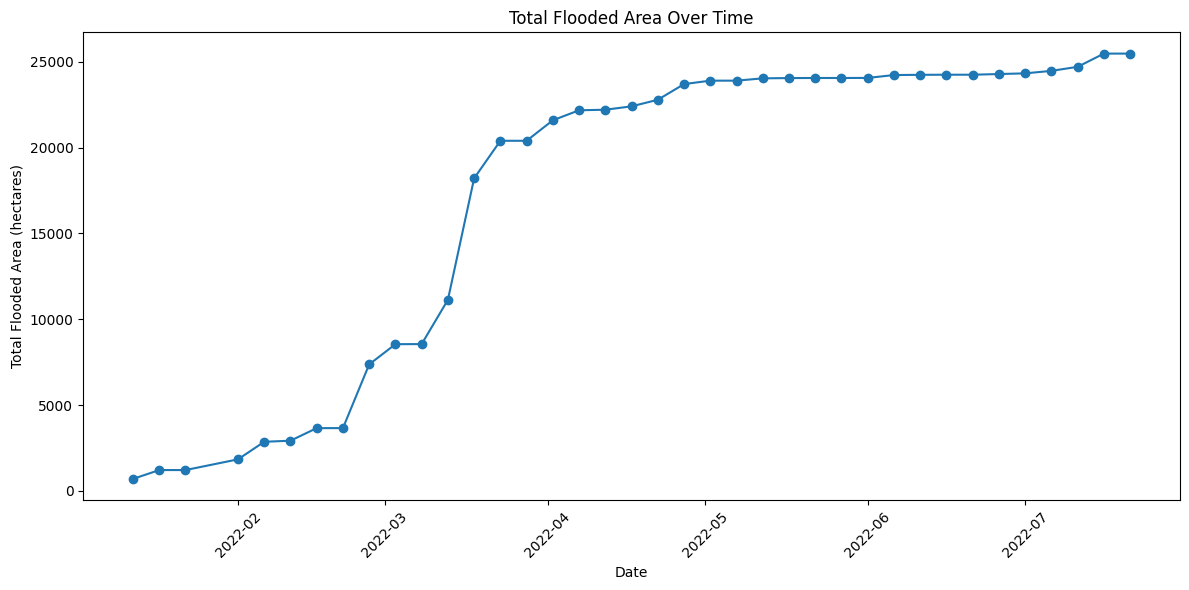

        Date  Flooded_Area
0 2022-01-12        701.47
1 2022-01-17       1216.52
2 2022-01-22       1216.52
3 2022-02-01       1839.31
4 2022-02-06       2862.57
count       38.000000
mean     17398.104211
std       9205.859565
min        701.470000
25%       8547.912500
50%      22589.030000
75%      24178.352500
max      25468.990000
Name: Flooded_Area, dtype: float64


In [ ]:
#@title Visualize the cumulative areas
# Melt the dataframe to convert date columns to rows
date_columns = [col for col in df_final.columns if col.startswith('20')]  # Select only date columns
melted_df = pd.melt(df_final, id_vars=['ID'], value_vars=date_columns,
                    var_name='Date', value_name='Flooded_Area')

# Convert Date column to datetime
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Ensure Flooded_Area is numeric, replacing any non-numeric values with NaN
melted_df['Flooded_Area'] = pd.to_numeric(melted_df['Flooded_Area'], errors='coerce')

# Group by Date and sum the Flooded_Area
total_flooded_area = melted_df.groupby('Date')['Flooded_Area'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(total_flooded_area['Date'], total_flooded_area['Flooded_Area'], marker='o')
plt.title('Total Flooded Area Over Time')
plt.xlabel('Date')
plt.ylabel('Total Flooded Area (hectares)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Print the first few rows of the processed data to verify
print(total_flooded_area.head())

# Print summary statistics
print(total_flooded_area['Flooded_Area'].describe())

In [ ]:
#@title Running workflow
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas =ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# Function to add s2cloudless cloud probability to Sentinel-2 imagery
def add_cloud_probability(image):
    # Load the s2cloudless cloud probability image for the same time as the Sentinel-2 image
    cloud_probability = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY') \
        .filterBounds(image.geometry()) \
        .filterDate(image.date(), image.date().advance(1, 'day')) \
        .first()  # Get the first image in the filtered collection

    # Add the cloud probability as a band to the original image
    return image.addBands(cloud_probability.rename('cloud_prob'))

# Function to mask clouds using s2cloudless cloud probability
def mask_clouds_s2cloudless(image, cloud_prob_threshold=30):
    # Add cloud probability to the image
    image = add_cloud_probability(image)

    # Create a cloud mask where cloud probability is below the threshold
    cloud_mask = image.select('cloud_prob').lt(cloud_prob_threshold)

    # Apply the cloud mask to the image
    return image.updateMask(cloud_mask)

# JRC Global Surface Water data layers
#jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)#.select('water').clip(dagana)
#non_permanent_water_mask_m = jrcMonthly_dataset.select('water').eq(1) or dataset.select('water').eq(0)
watwater_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = watwater_mask_m.Not()
#jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
# Create a mask for permanent water (water occurrence > 90%)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
# Create a mask for non-permanent water areas
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y#.And(non_permanent_water_mask_m)
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(watwater_mask_m)
# Land Cover Data
#land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")
# m.add_layer(permanent_water_mask_year2, {'color':['white','grey','light blue','blue']},'permanent_water_mask_year')
# m.add_layer(water_areas, {'color':'blue'},'water_mask')
# m.add_layer(watwater_mask_m, {'color':['ffffff', 'fffcb8', '0905ff']},'watwater_mask_m')
# m.add_layer(jrcMonthly_dataset, {'color':['white','grey','light blue','blue']},'jrcMonthly_dataset')


# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B11', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)
                #.filter('CLOUDY_PIXEL_PERCENTAGE < 17') #th image code
                #.filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 1.0)) #th image code

     # Check if the image collection is empty

    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")

        return None
    #s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    #permanent_water_mask_year.And(permanent_water_mask_year2).And(watwater_mask_m)
    mosaic_ = s2_sr_col.select('MNDWI').mosaic()\
              .updateMask(watwater_mask_m.Not())\
              .clip(dagana)
              # .updateMask(permanent_water_mask_year.Not())\
              # .updateMask(permanent_water_mask_year2.Not())\
              # .updateMask(watwater_mask_m.Not())

    mndwi_gt_0 = mosaic_.gt(0)
    current_mask = mosaic_.updateMask(mndwi_gt_0)
    return mndwi_gt_0

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2022-01-12'
end_date = '2022-03-28'
date_ranges = enhanced_date_processing(start_date, end_date)

#image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()
# Function to process and visualize flooding for each date with exception handling
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
          current_mndwi = process_each_date(aoi, date)
          if current_mndwi is not None:
              doy = get_doy(date)
              base_date_mask = current_mndwi
              if i == 0:
                  cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
              else:
                  new_areas = current_mndwi.And(cumulative_flood_mask.eq(0))
                  cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

              flood_vis_params = {
                  'min': min([get_doy(d) for d in date_ranges]),
                  'max': max([get_doy(d) for d in date_ranges]),
                  'palette':'blue'
              }

              m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                        flood_vis_params, f'{date} Flooding Progression')
              # Calculate the flood area for the grid
              grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid) #changed from .gt(0)
              flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
          else:
              print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    # Export the final cumulative flood mask
    # export_task = ee.batch.Export.image.toDrive(
    #     image=cumulative_flood_mask.updateMask(cumulative_flood_mask),
    #     description='2022_Final_Flood',
    #     folder=folder,#'Updated_mndwi_maps',
    #     fileNamePrefix=export_path,
    #     scale=10,
    #     region=aoi,#.geometry().bounds(),
    #     maxPixels=1e13
    # )
    # export_task.start()

    # print("Export task started. Check your Google Drive for the exported image.")

    return flood_data

# Usage
#export_path = 'final_flood_mask_2022_moret'
# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
#m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
#df_final.to_csv('trials/flooding_data_2022_fin.csv')
# m.to_html('data/flooding_detection_2023_moret.html')

In [ ]:
#@title Running workflow
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# Load the JRC Global Surface Water Monthly dataset
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)  # Water class in the monthly data
# Create a masked layer
water_mask_m = water_mask_m.updateMask(water_mask_m)
non_water_areas = water_mask_m.Not()  # Areas that are not water in the monthly data

# Define a map centered on the region
m = geemap.Map(center=[center_lat, center_lon], layout={'height':'600px', 'width':'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B11', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 40)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)
    # Check if the image collection is empty
    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        print(s2_sr_col.getInfo())
        return None
    #water_mask_m = water_mask_m.updateMask(water_mask_m)

    mosaic_ = s2_sr_col.select('MNDWI').mosaic() \
              .updateMask(non_water_areas) \
              .clip(dagana)
    mndwi_gt_0 = mosaic_.gt(0)
    current_mask = mosaic_.updateMask(mndwi_gt_0)
    #current_mask = current_mask.updateMask(current_mask)
    return current_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2022-01-22'
end_date = '2022-01-28'
date_ranges = enhanced_date_processing(start_date, end_date)

# Image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()

# Function to process and visualize flooding for each date with exception handling
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)
            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': 'blue'
            }
            m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                        flood_vis_params, f'{date} Flooding Progression')
            # Calculate the flood area for the grid
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    return flood_data

# Display the map
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]

# Save the final DataFrame to CSV (optional)
# df_final.to_csv('flooding_data_2022_final.csv')

# Save the map to HTML (optional)
# m.to_html('flooding_detection_2022.html')


In [ ]:
#@title Running workflow
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas =ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
#jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)#.select('water').clip(dagana)
#non_permanent_water_mask_m = jrcMonthly_dataset.select('water').eq(1) or dataset.select('water').eq(0)
water_mask_m = jrcMonthly_dataset.select('water').eq(2)
# Create a masked layer
masked_monthly1 = water_mask_m.updateMask(water_mask_m)
# Alternative way to create a masked layer
masked_monthly2 = water_mask_m.selfMask()
#non_permanent water using the monthly layer
non_permanent_water_mask_m = masked_monthly1.Not()
#jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
# Create a mask for permanent water (water occurrence > 90%)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
# Create a mask for non-permanent water areas
non_permanent_water_mask_y = permanent_water_mask_year.Not()
non_water_areas = non_permanent_water_mask_y#.And(non_permanent_water_mask_m)
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(water_mask_m)
# Land Cover Data
#land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")
# m.add_layer(permanent_water_mask_year2, {'color':['white','grey','light blue','blue']},'permanent_water_mask_year')
# m.add_layer(water_areas, {'color':'blue'},'water_mask')
# m.add_layer(watwater_mask_m, {'color':['ffffff', 'fffcb8', '0905ff']},'watwater_mask_m')
# m.add_layer(jrcMonthly_dataset, {'color':['white','grey','light blue','blue']},'jrcMonthly_dataset')


# Function to calculate MNDWI for Sentinel-2
def calculate_mndwi_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B11', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                .map(mask_clouds_s2) \
                .map(calculate_mndwi_s2)
                #.filter('CLOUDY_PIXEL_PERCENTAGE < 17') #th image code
                #.filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 1.0)) #th image code

     # Check if the image collection is empty

    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")

        return None
    #s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
         #.updateMask(permanent_water_mask_year.Not())\
              #.updateMask(permanent_water_mask_year2.Not())\
    #permanent_water_mask_year.And(permanent_water_mask_year2).And(watwater_mask_m)
    mosaic_ = s2_sr_col.select('MNDWI').mosaic()\
              .updateMask(water_mask_m.Not())\
              .clip(dagana)

    mndwi_gt_0 = mosaic_.gt(0)
    current_mask = mosaic_.updateMask(mndwi_gt_0)
    return mndwi_gt_0

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2021-01-22'
end_date = '2021-02-18'
date_ranges = enhanced_date_processing(start_date, end_date)

#image to initialize the shape of the array
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()
projection = first_image.select('B2').projection()
# Function to process and visualize flooding for each date with exception handling
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
          current_mndwi = process_each_date(aoi, date)
          if current_mndwi is not None:
              doy = get_doy(date)
              base_date_mask = current_mndwi
              if i == 0:
                  cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
              else:
                  new_areas = current_mndwi.And(cumulative_flood_mask.eq(0))
                  cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

              flood_vis_params = {
                  'min': min([get_doy(d) for d in date_ranges]),
                  'max': max([get_doy(d) for d in date_ranges]),
                  'palette':'blue'
              }

              m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                        flood_vis_params, f'{date} Flooding Progression')
              # Calculate the flood area for the grid
              grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid) #changed from .gt(0)
              flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
          else:
              print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    # Export the final cumulative flood mask
    # export_task = ee.batch.Export.image.toDrive(
    #     image=cumulative_flood_mask.updateMask(cumulative_flood_mask),
    #     description='2022_Final_Flood',
    #     folder=folder,#'Updated_mndwi_maps',
    #     fileNamePrefix=export_path,
    #     scale=10,
    #     region=aoi,#.geometry().bounds(),
    #     maxPixels=1e13
    # )
    # export_task.start()

    # print("Export task started. Check your Google Drive for the exported image.")

    return flood_data

# Usage
#export_path = 'final_flood_mask_2022_moret'
# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
#m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)
display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
#df_final.to_csv('trials/flooding_data_2022_fin.csv')
# m.to_html('data/flooding_detection_2023_moret.html')

In [ ]:
# @title Including other indices
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm
import geemap

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
watwater_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = watwater_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
#non_water_areas = non_permanent_water_mask_y
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(watwater_mask_m)

# Define a map centered on the region of interest
m = geemap.Map(center=[center_lat, center_lon], layout={'height':'600px', 'width':'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Functions to calculate various indices
def calculate_mndwi(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    return image.addBands(mndwi)

def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

def calculate_ndwi(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands(ndwi)

def calculate_awei(image):
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands(awei)

def calculate_indices_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    ndmi = image.normalizedDifference(['B8', 'B11']).rename('NDMI')
    return image.addBands(mndwi).addBands(ndvi).addBands(ndwi).addBands(awei).addBands(ndmi)
# Add this function to visualize all indices
def visualize_indices(image, date):
    # NDVI visualization
    ndvi_vis = {
        'min': -1,
        'max': 1,
        'palette': ['blue', 'white', 'green']
    }
    m.add_layer(image.select('NDVI'), ndvi_vis, f'{date} NDVI')

    # NDWI visualization
    ndwi_vis = {
        'min': -1,
        'max': 1,
        'palette': ['red', 'white', 'blue']
    }
    m.add_layer(image.select('NDWI'), ndwi_vis, f'{date} NDWI')

    # AWEI visualization
    awei_vis = {
        'min': -0.5,
        'max': 0.5,
        'palette': ['red', 'white', 'blue']
    }
    m.add_layer(image.select('AWEI'), awei_vis, f'{date} AWEI')

    # MNDWI visualization
    mndwi_vis = {
        'min': -1,
        'max': 1,
        'palette': ['red', 'white', 'blue']
    }
    m.add_layer(image.select('MNDWI'), mndwi_vis, f'{date} MNDWI')
    ndmi_vis = {
        'min': -1,
        'max': 1,
        'palette': ['red', 'white', 'blue']
    }
    m.add_layer(image.select('NDMI'), ndmi_vis, f'{date} NDMI')
# Function to mask clouds in Sentinel-2 imagery
def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B4', 'B8', 'B11', 'B12', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                .map(mask_clouds_s2) \
                .map(calculate_indices_s2)

    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        return None

    mosaic_ = s2_sr_col.mosaic().clip(dagana)

    # Visualize indices
   # visualize_indices(mosaic_, date)

     # Use multiple indices to create a more robust flood mask
    flood_mask = mosaic_.select('MNDWI').gt(0) \
                 .And(mosaic_.select('NDVI').lt(0.3)) \
                 .And(mosaic_.select('NDWI').gt(0)) \
                 .And(mosaic_.select('AWEI').gt(0))

    # Exclude marshy areas
    marsh_mask = mosaic_.select('NDVI').gt(0.2) \
                 .And(mosaic_.select('NDMI').gt(0)) \
                 .And(mosaic_.select('MNDWI').gt(0))

    # Remove permanent water, non-flood water, and marshy areas
    flood_mask = flood_mask.updateMask(permanent_water_mask_year.Not()) \
                 .updateMask(permanent_water_mask_year2.Not()) \
                 .updateMask(watwater_mask_m.Not()) \
                 .updateMask(marsh_mask.Not())

    return flood_mask

# Make sure to initialize first_image before using it
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()

def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=first_image.select('B2').projection(), scale=10).clip(aoi)

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_flood_mask = process_each_date(aoi, date)
        if current_flood_mask is not None:
            doy = get_doy(date)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(current_flood_mask, 2)
            else:
                new_areas = current_flood_mask.And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': ['08519c', '3182bd', '6baed6', 'bdd7e7', 'eff3ff']
            }

            m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                        flood_vis_params, f'{date} Flooding Progression')
            # Calculate the flood area for the grid
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
        else:
            print(f"Skipping date {date} due to no valid flood mask")

    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")

    return flood_data
# Define the date range for processing
start_date = '2022-01-22'
end_date = '2022-02-28'
date_ranges = enhanced_date_processing(start_date, end_date)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]

# Display the map
display(m)

# Optionally, save the results
# df_final.to_csv('flooding_data_2022_enhanced.csv')
# m.to_html('flooding_detection_2022_enhanced.html')

print("Processing complete. Results are available in the df_final DataFrame.")

In [ ]:
df_final

In [ ]:
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm
import geemap

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry()).difference(protected_areas.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)
watwater_mask_m = jrcMonthly_dataset.select('water').eq(2)
non_permanent_water_mask_m = watwater_mask_m.Not()

# Load the JRC Global Surface Water dataset
gsw = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').clip(dagana)
permanent_water_mask_year = gsw.select('occurrence').gte(90)
permanent_water_mask_year2 = gsw.select('seasonality').gte(8)
non_permanent_water_mask_y = permanent_water_mask_year.Not()
water_areas = permanent_water_mask_year.And(permanent_water_mask_year2).And(watwater_mask_m)

# Define a map centered on the region of interest
m = geemap.Map(center=[center_lat, center_lon], layout={'height':'600px', 'width':'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

def calculate_indices_s2(image):
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    ndmi = image.normalizedDifference(['B8', 'B11']).rename('NDMI')
    return image.addBands(mndwi).addBands(ndvi).addBands(ndwi).addBands(awei).addBands(ndmi)

def mask_clouds_s2(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

def enhanced_date_processing(start_date, end_date, interval_days=1):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    current_date = start_date
    while current_date <= end_date:
        date_list.append(current_date.strftime("%Y-%m-%d"))
        current_date += timedelta(days=interval_days)
    return date_list

def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B4', 'B8', 'B11', 'B12', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                .map(mask_clouds_s2) \
                .map(calculate_indices_s2)

    if s2_sr_col.size().getInfo() == 0:
        print(f"No images found for date {date} within the specified cloud coverage.")
        return None

    mosaic_ = s2_sr_col.mosaic().clip(dagana)

    flood_mask = mosaic_.select('MNDWI').gt(0) \
                #  .And(mosaic_.select('NDVI').lt(0.3)) \
                #  .And(mosaic_.select('NDWI').gt(0)) \
                #  .And(mosaic_.select('AWEI').gt(0))

    marsh_mask = mosaic_.select('NDVI').gt(0.2) \
                 .And(mosaic_.select('NDMI').gt(0)) \
                 .And(mosaic_.select('MNDWI').gt(0))

    flood_mask = flood_mask.updateMask(permanent_water_mask_year.Not()) \
                 .updateMask(permanent_water_mask_year2.Not()) \
                 .updateMask(watwater_mask_m.Not()) \
              #   .updateMask(marsh_mask.Not())

    return flood_mask

first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(dagana).first()

def get_last_day_of_month(date):
    next_month = date.replace(day=28) + timedelta(days=4)  # This will never fail
    return next_month - timedelta(days=next_month.day)

def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    cumulative_flood_mask = ee.Image(0).reproject(crs=first_image.select('B2').projection(), scale=10).clip(aoi)
    last_displayed_month = None

    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_date = datetime.strptime(date, "%Y-%m-%d")
        current_flood_mask = process_each_date(aoi, date)
        if current_flood_mask is not None:
            doy = get_doy(date)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(current_flood_mask, 2)
            else:
                new_areas = current_flood_mask.And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            is_last_day = (current_date.day == get_last_day_of_month(current_date).day or
                           current_date == datetime.strptime(date_ranges[-1], "%Y-%m-%d"))

            if is_last_day and current_date.month != last_displayed_month:
                flood_vis_params = {
                    'min': min([get_doy(d) for d in date_ranges]),
                    'max': max([get_doy(d) for d in date_ranges]),
                    'palette': ['08519c', '3182bd', '6baed6', 'bdd7e7', 'eff3ff']
                }

                m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0),
                            flood_vis_params, f'{date} Flooding Progression')
                last_displayed_month = current_date.month

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.updateMask(cumulative_flood_mask).gt(0), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
        else:
            print(f"Skipping date {date} due to no valid flood mask")

    # m.add_colorbar(flood_vis_params, label="Day of the year",
    #                orientation="horizontal",
    #                layer_name="Flooding detection")

    return flood_data

# Define the date range for processing
start_date = '2022-01-22'
end_date = '2022-07-31'
date_ranges = enhanced_date_processing(start_date, end_date, interval_days=1)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]

# Display the map
display(m)

# Optionally, save the results
# df_final.to_csv('flooding_data_2022_enhanced.csv')
# m.to_html('flooding_detection_2022_enhanced.html')

print("Processing complete. Results are available in the df_final DataFrame.")

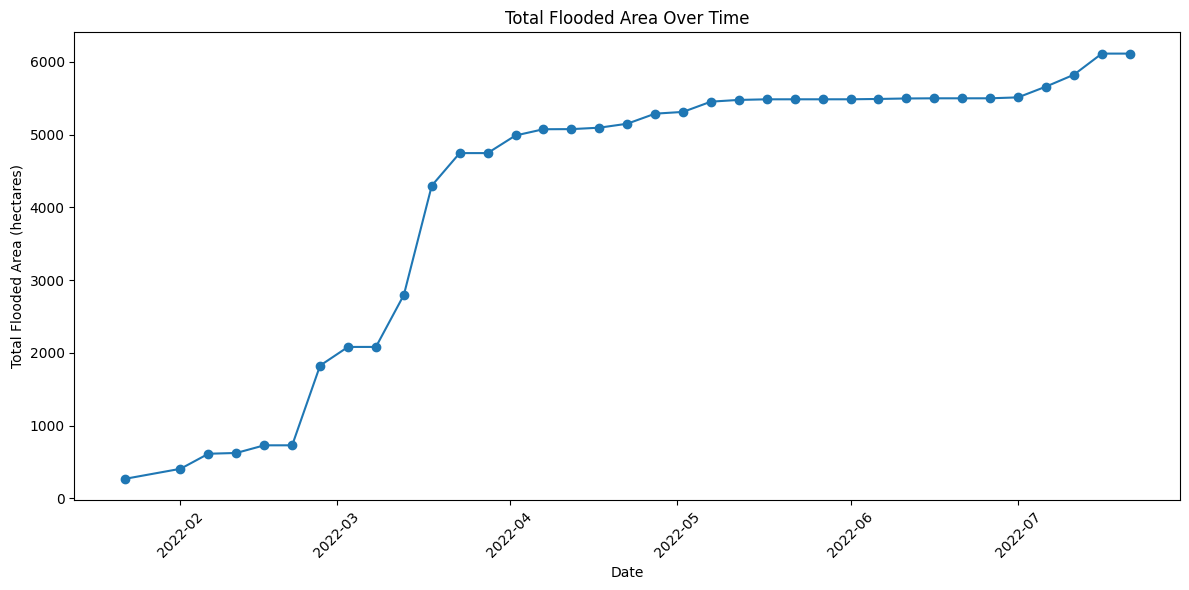

        Date  Flooded_Area
0 2022-01-22        266.60
1 2022-02-01        405.53
2 2022-02-06        612.55
3 2022-02-11        623.27
4 2022-02-16        728.37
count      36.000000
mean     4209.398333
std      1965.584852
min       266.600000
25%      2617.565000
50%      5220.225000
75%      5493.375000
max      6115.460000
Name: Flooded_Area, dtype: float64


In [ ]:
# Melt the dataframe to convert date columns to rows
date_columns = [col for col in df_final.columns if col.startswith('20')]  # Select only date columns
melted_df = pd.melt(df_final, id_vars=['ID'], value_vars=date_columns,
                    var_name='Date', value_name='Flooded_Area')

# Convert Date column to datetime
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Ensure Flooded_Area is numeric, replacing any non-numeric values with NaN
melted_df['Flooded_Area'] = pd.to_numeric(melted_df['Flooded_Area'], errors='coerce')

# Group by Date and sum the Flooded_Area
total_flooded_area = melted_df.groupby('Date')['Flooded_Area'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(total_flooded_area['Date'], total_flooded_area['Flooded_Area'], marker='o')
plt.title('Total Flooded Area Over Time')
plt.xlabel('Date')
plt.ylabel('Total Flooded Area (hectares)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Print the first few rows of the processed data to verify
print(total_flooded_area.head())

# Print summary statistics
print(total_flooded_area['Flooded_Area'].describe())

In [ ]:
m

In [ ]:
#@title Running workflow
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janetmumo68')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas =ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)#.select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B11', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter('CLOUDY_PIXEL_PERCENTAGE < 17') #th image code
                #.filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 1.0)) #th image code

     # Check if the image collection is empty

    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")

        return None
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    # Create a mask for non-water areas (0 = non-water, 1 = water, 2 = no data)
    non_water_mask = jrcMonthly_dataset.select('water').eq(1) or dataset.select('water').eq(0)
    # Apply the mask to the original image
    non_permanent_water3 = dataset.updateMask(non_water_mask)
    #non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #permanent_water3 = jrcMonthly_dataset.eq(0).Or(jrcMonthly_dataset.eq(1))
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(non_permanent_water3)#.updateMask(cropland_and_grassland_mask)
    return current_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2019-01-18'
end_date = '2019-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)


# Function to process and visualize flooding for each date with exception handling
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        # if date == ['2022-05-07']:
        #   print(f"Skipping date {date} due to high cloud coverage")
        #   continue  # Skip to the next date in the loop
        #try:
          current_mndwi = process_each_date(aoi, date)
          if current_mndwi is not None:
              doy = get_doy(date)
              base_date_mask = current_mndwi.gt(0)
              if i == 0:
                  cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 17)
              else:
                  new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                  cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

              flood_vis_params = {
                  'min': min([get_doy(d) for d in date_ranges]),
                  'max': max([get_doy(d) for d in date_ranges]),
                  'palette': cm.palettes.winter
              }

              m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
                        flood_vis_params, f'{date} Flooding Progression')
              # Calculate the flood area for the grid
              grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)
              flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
          else:
              print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    # Export the final cumulative flood mask
    export_task = ee.batch.Export.image.toDrive(
        image=cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
        description='2019_Final_Flood_Mask',
        folder='Earth_Engine_Exports',
        fileNamePrefix=export_path,
        scale=10,
        region=aoi,#.geometry().bounds(),
        maxPixels=1e13
    )
    export_task.start()

    print("Export task started. Check your Google Drive for the exported image.")

    return flood_data

# Usage
export_path = 'final_flood_mask_2019'
# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
# m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('data/flooding_data_2019a.csv')
m.to_html('data/flooding_detection_2019.html')

Processing Dates: 100%|██████████| 39/39 [27:09<00:00, 41.79s/it]


Export task started. Check your Google Drive for the exported image.


In [ ]:
#@title Running workflow
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janetmumo68')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas =ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)#.select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B11', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter('CLOUDY_PIXEL_PERCENTAGE < 17') #th image code
                #.filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 1.0)) #th image code

     # Check if the image collection is empty

    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")

        return None
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    #s Apply the mask to the original image
    non_permanent_water3 = dataset.updateMask(non_water_mask)
    #non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #permanent_water3 = jrcMonthly_dataset.eq(0).Or(jrcMonthly_dataset.eq(1))
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(non_permanent_water3)#.updateMask(cropland_and_grassland_mask)
    return current_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2021-01-17'
end_date = '2021-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)


# Function to process and visualize flooding for each date with exception handling
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        # if date == ['2022-05-07']:
        #   print(f"Skipping date {date} due to high cloud coverage")
        #   continue  # Skip to the next date in the loop
        #try:
          current_mndwi = process_each_date(aoi, date)
          if current_mndwi is not None:
              doy = get_doy(date)
              base_date_mask = current_mndwi.gt(0)
              if i == 0:
                  cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 17)
              else:
                  new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                  cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

              flood_vis_params = {
                  'min': min([get_doy(d) for d in date_ranges]),
                  'max': max([get_doy(d) for d in date_ranges]),
                  'palette': cm.palettes.winter
              }

              m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
                        flood_vis_params, f'{date} Flooding Progression')
              # Calculate the flood area for the grid
              grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)
              flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
          else:
              print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    # Export the final cumulative flood mask
    export_task = ee.batch.Export.image.toDrive(
        image=cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
        description='2021_Final_Flood_Mask',
        folder='Earth_Engine_Exports',
        fileNamePrefix=export_path,
        scale=10,
        region=aoi,#.geometry().bounds(),
        maxPixels=1e13
    )
    export_task.start()

    print("Export task started. Check your Google Drive for the exported image.")

    return flood_data

# Usage
export_path = 'final_flood_mask_2021'
# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
# m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('data/flooding_data_2021a.csv')
m.to_html('data/flooding_detection_2021.html')
    #

Processing Dates:  77%|███████▋  | 30/39 [16:46<05:32, 36.95s/it]

No images found for date 2021-06-11 within the specified cloud coverage.
Skipping date 2021-06-11 due to no valid MNDWI


Processing Dates:  82%|████████▏ | 32/39 [18:42<05:31, 47.36s/it]

In [ ]:
#@title Running workflow
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janetmumo68')

# Parameters
# CLOUD_FILTER = 60
# CLD_PRB_THRESH = 50
# NIR_DRK_THRESH = 0.15
# CLD_PRJ_DIST = 1
# BUFFER = 50
# CLOUD_PERCENTAGE_THRESHOLD = 20
# MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas =ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').clip(dagana)#.select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B11', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter('CLOUDY_PIXEL_PERCENTAGE < 17') #th image code
                #.filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 1.0)) #th image code

     # Check if the image collection is empty

    if s2_sr_col.size().getInfo() == 0:

        print(f"No images found for date {date} within the specified cloud coverage.")

        return None
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    # Create a mask for non-water areas (0 = non-water, 1 = water, 2 = no data)
    non_water_mask = jrcMonthly_dataset.select('water').eq(1) or dataset.select('water').eq(0)
    # Apply the mask to the original image
    non_permanent_water3 = dataset.updateMask(non_water_mask)
    #non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #permanent_water3 = jrcMonthly_dataset.eq(0).Or(jrcMonthly_dataset.eq(1))
    #cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(non_permanent_water3)#.updateMask(cropland_and_grassland_mask)
    return current_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2023-01-17'
end_date = '2023-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)


# Function to process and visualize flooding for each date with exception handling
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        # if date == ['2022-05-07']:
        #   print(f"Skipping date {date} due to high cloud coverage")
        #   continue  # Skip to the next date in the loop
        #try:
          current_mndwi = process_each_date(aoi, date)
          if current_mndwi is not None:
              doy = get_doy(date)
              base_date_mask = current_mndwi.gt(0)
              if i == 0:
                  cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 17)
              else:
                  new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                  cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

              flood_vis_params = {
                  'min': min([get_doy(d) for d in date_ranges]),
                  'max': max([get_doy(d) for d in date_ranges]),
                  'palette': cm.palettes.winter
              }

              m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
                        flood_vis_params, f'{date} Flooding Progression')
              # Calculate the flood area for the grid
              grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)
              flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
          else:
              print(f"Skipping date {date} due to no valid MNDWI")
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")
    # Export the final cumulative flood mask
    export_task = ee.batch.Export.image.toDrive(
        image=cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
        description='2023_Final_Flood_Mask',
        folder='Earth_Engine_Exports',
        fileNamePrefix=export_path,
        scale=10,
        region=aoi,#.geometry().bounds(),
        maxPixels=1e13
    )
    export_task.start()

    print("Export task started. Check your Google Drive for the exported image.")

    return flood_data

# Usage
export_path = 'final_flood_mask_2023'
# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
# m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('data/flooding_data_2023a.csv')
m.to_html('data/flooding_detection_2023.html')

Processing Dates:  90%|████████▉ | 35/39 [23:44<03:06, 46.51s/it]

No images found for date 2023-07-06 within the specified cloud coverage.
Skipping date 2023-07-06 due to no valid MNDWI


Processing Dates:  92%|█████████▏| 36/39 [23:44<01:37, 32.67s/it]

No images found for date 2023-07-11 within the specified cloud coverage.
Skipping date 2023-07-11 due to no valid MNDWI


Processing Dates:  95%|█████████▍| 37/39 [23:44<00:45, 22.95s/it]

No images found for date 2023-07-16 within the specified cloud coverage.
Skipping date 2023-07-16 due to no valid MNDWI


Processing Dates: 100%|██████████| 39/39 [25:56<00:00, 39.90s/it]


Export task started. Check your Google Drive for the exported image.


In [ ]:
#@title Workflow 1 -21918ha
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janetmumo68')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/updated_dagana_region")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas =ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

# def process_each_date(aoi, date):
#     start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
#     end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
#     s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
#                 .select(['B3', 'B11', 'QA60']) \
#                 .filterBounds(aoi) \
#                 .filterDate(start_period, end_period) \
#                 .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 30))
#     s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
#     qa_band = s2_sr.select('QA60')
#     cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
#     s2_sr_masked = s2_sr.updateMask(cloud_mask)
#     non_permanent_water3 = jrcMonthly_dataset.eq(1)
#     #permanent_water3 = jrcMonthly_dataset.eq(0).Or(jrcMonthly_dataset.eq(1))
#     cropland_and_grassland_mask  = land_cover_dataset.eq(40)
#     mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
#     current_mask = mndwi.gt(0).updateMask(non_permanent_water3)#.updateMask(cropland_and_grassland_mask)
#     return current_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2021-01-17'
end_date = '2021-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)

def mask_clouds_and_shadows(image):
    # Get QA band
    qa = image.select('QA60')

    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(
           qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Return the masked image, updating the mask and scaling the image
    return image.updateMask(mask).divide(10000)

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 30)) \
                .map(mask_clouds_and_shadows)

    if s2_sr_col.size().getInfo() == 0:
        return None

    s2_sr = s2_sr_col.mosaic()  # Use median composite instead of mosaic

    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #cropland_and_grassland_mask = land_cover_dataset.eq(40)
    mndwi = s2_sr.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(non_permanent_water3)

    return current_mask

def process_and_visualize_flooding(aoi, date_ranges, grid, cloud_threshold=30):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    previous_mask = None
    previous_date = None

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        try:
            current_mndwi = process_each_date(aoi, date)

            if current_mndwi is None:
                print(f"No valid data for date {date}")
                if previous_mask is not None and previous_date is not None:
                    print(f"Using data from previous date: {previous_date}")
                    flood_data.extend(extract_flood_data(calculate_grid_flood_area(previous_mask, grid).getInfo()['features'], date))
                continue

            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 17)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': cm.palettes.winter
            }

            # Calculate the flood area for the grid
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))

            # Update previous mask and date
            previous_mask = cumulative_flood_mask.gte(3)
            previous_date = date

        except ee.EEException as e:
            print(f"Error processing date {date}: {e}")
            continue  # Skip to the next date

    # Add layer control and save the map
    m.add_colorbar(flood_vis_params, label="Day of the year",
                   orientation="horizontal",
                   layer_name="Flooding detection")

    return flood_data

# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
# m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('data/flooding_data_2022_mosaic.csv')
m.to_html('data/flooding_detection_2022_mosaicc.html')

Processing Dates: 100%|██████████| 39/39 [41:07<00:00, 63.28s/it] 


In [ ]:
# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas =ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry())
date = '2022-05-07'
end_date = '2022-05-08'
start_period = date#datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
end_period = end_date #datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
            .select(['B3', 'B11', 'QA60']) \
            .filterBounds(dagana) \
            .filterDate(start_period, end_period) \
            .filter('CLOUDY_PIXEL_PERCENTAGE < 15') #th image code
           # .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 0.6))
s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE')#.first()#.mosaic()
print(s2_sr.getInfo())
print(s2_sr_col.size().getInfo())
#
# qa_band = s2_sr.select('QA60')
# cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
# s2_sr_masked = s2_sr.updateMask(cloud_mask)

{'type': 'ImageCollection', 'bands': [], 'version': 1726410041644391, 'id': 'COPERNICUS/S2_SR_HARMONIZED', 'properties': {'date_range': [1490659200000, 1647907200000], 'period': 0, 'system:visualization_0_min': '0.0', 'type_name': 'ImageCollection', 'keywords': ['copernicus', 'esa', 'eu', 'msi', 'reflectance', 'sentinel', 'sr'], 'system:visualization_0_bands': 'B4,B3,B2', 'thumb': 'https://mw1.google.com/ges/dd/images/COPERNICUS_S2_SR_thumb.png', 'description': '<p>Sentinel-2 is a wide-swath, high-resolution, multi-spectral\nimaging mission supporting Copernicus Land Monitoring studies,\nincluding the monitoring of vegetation, soil and water cover,\nas well as observation of inland waterways and coastal areas.</p><p>The Sentinel-2 L2 data are downloaded from scihub. They were\ncomputed by running sen2cor. WARNING: ESA did not produce L2 data\nfor all L1 assets, and earlier L2 coverage is not global.</p><p>The assets contain\n12 UINT16 spectral bands representing SR scaled by 10000 (unl

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1lHHttEHXEto8qMdIO-aLd329xLy3zCJ7/SRV_flooding_detection_models/Dagana/workflow/new_flow'

In [ ]:
#@title agCelerant 2023 DHS flooding detection - the code is okay but it takes time to even run 100 plots/grids
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janetmumo68')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 40
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
#grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_agce_plots_dhs_2023")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons_FeatureView")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")

# Define a function to set positive values to 1
def set_positive_to_one(image):
    return image.where(image.gt(0), 1)
# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['culture_id']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']  # Include all other properties
        })
    return flood_data


def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .select(['B3', 'B11', 'QA60']) \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 0.4))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    band_names = s2_sr.bandNames().getInfo()
    #print(band_names)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #permanent_water3 = jrcMonthly_dataset.eq(0).Or(jrcMonthly_dataset.eq(1))
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(non_permanent_water3)#.updateMask(cropland_and_grassland_mask)
    return current_mask

#folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
# for 2019,2020, we start from -01-18, 2021, 2022,2023,2024 we start from -01-17
start_date = '2022-01-17'
end_date = '2022-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)

# Function to process and visualize flooding for each date
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 17)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)
                #print(cumulative_flood_mask.getInfo())
            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': cm.palettes.winter}

            # m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
            #     flood_vis_params, f'{date} Flooding Progression')
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
        else:
            print(f"Skipping date {date} due to no valid MNDWI")
    # Add layer control and save the map
    # m.add_colorbar(flood_vis_params, label="Day of the year",
    #                 orientation="horizontal",
    #                 layer_name="Flooding detection")


    return flood_data


# Function to filter grids by plot type
def filter_by_plot_type(grid, plot_type_column, plot_type_value):
    """Filter the grid by plot type."""
    filtered_grid = grid.filter(ee.Filter.eq(plot_type_column, plot_type_value))
    return filtered_grid

# Function to get unique plot types
def get_unique_plot_types(grid, plot_type_column):
    """Get unique plot types from the grid data."""
    unique_plot_types = grid.aggregate_array(plot_type_column).distinct().getInfo()
    return unique_plot_types

# Column name for plot types (assuming it's something like 'plot_type')
plot_type_column = 'state_name'

# Get the unique plot types in the grid
#unique_plot_types = get_unique_plot_types(grid, plot_type_column)
unique_plot_types = [ 'Closure']#['Abandoned', 'Closure', 'Forecast', 'Harvest', 'Production']
# Define the batch size for processing the grid in chunks
BATCH_SIZE = 1000
# Filter the grid by the current plot type
filtered_grid = filter_by_plot_type(grid, plot_type_column,'Closure')
# Get the total number of grid features
total_grid_size = filtered_grid.size().getInfo()

# Get the list of grid features
grid_list = filtered_grid.toList(total_grid_size)
total_grid_size = filtered_grid.size().getInfo()

# Get the list of grid features
grid_list = filtered_grid.toList(total_grid_size)
#print(grid_list.getInfo())
# Initialize an empty list to store flood data
all_flood_data = []

# Process the grid in batches
for offset in tqdm(range(0, total_grid_size, BATCH_SIZE), desc="Processing Grid Batches"):
    # Get a batch of the grid using toList
    grid_batch = ee.FeatureCollection(grid_list.slice(offset, offset + BATCH_SIZE))

    # Process flooding for the batch and all dates
    flood_data_batch = process_and_visualize_flooding(dagana, date_ranges, grid_batch)

    # Append the results for this batch to the overall flood data
    all_flood_data.extend(flood_data_batch)

# Convert the combined flood data into a DataFrame
df = create_flood_dataframe(all_flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date_rs'] = maxValueIndex1
columns_to_keep = ['culture_ar', 'culture_id', 'flooding_d', 'gie_id',
       'gie_locati', 'lat_grp', 'lat_plot', 'lon_grp', 'lon_plot',
       'parcel_cod', 'parcel_loc', 'phenologic', 'producer_i',
       'production', 'state_name']
df_other = df[columns_to_keep].drop_duplicates().set_index('culture_id')
df_pivoted = df_pivoted.rename_axis(index='culture_id')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
# Save the results as CSV
df_final.to_csv('data/flooding_data_by_plot_type_2024_jan_july_closure.csv')

Processing Grid Batches:   0%|          | 0/5 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
#@title Workflow for 2024 year
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import altair as alt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janetmumo68')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons_FeatureView").filterBounds(init_dagana)
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
# Change the basemap layer to 'Esri World Imagery'
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10)#,basemap='Esri.WorldImagery')
m.add_basemap(basemap="Esri.WorldImagery")

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #permanent_water3 = jrcMonthly_dataset.eq(0).Or(jrcMonthly_dataset.eq(1))
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(non_permanent_water3)#.updateMask(cropland_and_grassland_mask)
    return current_mask

folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'

# Define the date range for processing
start_date = '2024-01-17'
end_date = '2024-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)

from tqdm import tqdm  # Import tqdm for the progress bar

# Function to process and visualize flooding for each date with progress bar
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    # Initialize the progress bar
    for i, date in tqdm(enumerate(date_ranges), total=len(date_ranges), desc="Processing Dates"):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 17)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': cm.palettes.winter}

            m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(3)),
                        flood_vis_params, f'{date} Flooding Progression')

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    # Add layer control and save the map
    m.add_colorbar(flood_vis_params, label="Day of the year",
                    orientation="horizontal",
                    layer_name="Flooding detection")

    return flood_data

# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
# m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('flooding_data_2024.csv')
m.to_html('flooding_detection_2024.html')

In [ ]:

# Define the date range for processing
start_date = '2022-01-17'
end_date = '2022-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)

from tqdm import tqdm  # Import tqdm for the progress bar

# m.add_layer(jrcYearly_dataset, {'color':['white','grey','light blue','blue']},'jrcYearly_dataset')
# m.add_layer(jrcMonthly_dataset, {'color':['ffffff', 'fffcb8', '0905ff']},'jrcMonthly_dataset')
# m.add_layer(jrcglobal_dataset, {'color':['white','grey','light blue','blue']},'jrcglobal_dataset')
# m.add_layer(land_cover_dataset, {'color':'green'},'land_cover_dataset')
#display(m)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('flooding_data_2022.csv')
m.to_html('flooding_detection_2022.html')

In [ ]:
import numpy as np
import pandas as pd
from numpy import exp, log, sqrt
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Flood prediction models

def linear_model(time, a, b):
    return a * time + b

def exponential_model(time, a, b, c):
    return a * np.exp(b * time) + c

def logistic_model(time, K, r, t0):
    return K / (1 + np.exp(-r * (time - t0)))

class FloodModel:
    def __init__(self, model_name, initial_params=None):
        self.model_name = model_name
        self.function = None
        self.param_names = []
        self.initial_guess = []
        self.bounds = []

        if model_name == 'linear':
            self.function = linear_model
            self.param_names = ['a', 'b']
            self.initial_guess = [1, 0] if initial_params is None else initial_params
            self.bounds = [(-np.inf, np.inf), (-np.inf, np.inf)]
        elif model_name == 'exponential':
            self.function = exponential_model
            self.param_names = ['a', 'b', 'c']
            self.initial_guess = [1, 0.1, 0] if initial_params is None else initial_params
            self.bounds = [(0, np.inf), (-np.inf, np.inf), (-np.inf, np.inf)]
        elif model_name == 'logistic':
            self.function = logistic_model
            self.param_names = ['K', 'r', 't0']
            self.initial_guess = [100, 0.1, 50] if initial_params is None else initial_params
            self.bounds = [(0, np.inf), (0, np.inf), (-np.inf, np.inf)]
        else:
            raise ValueError('Unknown model')

        self.params = pd.DataFrame(self.param_names, columns=['Parameters'])
        self.params['Values'] = self.initial_guess
        self.covariance = None

def fit_model(model, time_data, flood_data):
    def objective(params):
        return np.sum((flood_data - model.function(time_data, *params))**2)

    result = minimize(objective, model.initial_guess, method='L-BFGS-B', bounds=model.bounds)

    model.params['Values'] = result.x
    model.covariance = result.hess_inv

    return model

def predict_flood(model, time_data):
    return model.function(time_data, *model.params['Values'])

def plot_results(model, time_data, flood_data, future_time=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(time_data, flood_data, label='Observed Data')

    # Plot the fitted model
    time_range = np.linspace(min(time_data), max(time_data), 100)
    plt.plot(time_range, predict_flood(model, time_range), label='Fitted Model')

    # Plot future predictions if provided
    if future_time is not None:
        future_predictions = predict_flood(model, future_time)
        plt.plot(future_time, future_predictions, '--', label='Future Predictions')

    plt.xlabel('Time')
    plt.ylabel('Flood Level')
    plt.title(f'Flood Prediction using {model.model_name.capitalize()} Model')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Sample data (replace with your actual flood data)
    time_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    flood_data = np.array([10, 15, 22, 30, 45, 67, 90, 120, 150, 180])

    # Create and fit the model
    model = FloodModel('logistic')
    fitted_model = fit_model(model, time_data, flood_data)

    # Make predictions
    future_time = np.array([10, 11, 12, 13, 14, 15])
    future_predictions = predict_flood(fitted_model, future_time)

    # Plot results
    plot_results(fitted_model, time_data, flood_data, future_time)

    print("Model Parameters:")
    print(fitted_model.params)
    print("\nFuture Predictions:")
    for t, p in zip(future_time, future_predictions):
        print(f"Time {t}: Predicted flood level {p:.2f}")

In [ ]:
df_final.head()

,ID,LatNP,Latitude,LonNP,Longitude,nasapid,2024-01-17,2024-01-22,2024-01-27,2024-02-01,...,2024-06-10,2024-06-15,2024-06-20,2024-06-25,2024-06-30,2024-07-05,2024-07-10,2024-07-15,2024-07-20,flooding_date
0,5505644,16.25,16.208333,-16.25,-16.375000,152968,25.77,25.77,26.13,26.13,...,242.02,242.02,242.54,246.63,246.63,246.63,246.63,249.61,249.80,2024-02-16
1,5505643,16.25,16.208333,-16.25,-16.458333,152968,53.10,53.10,57.48,57.48,...,65.63,65.63,65.63,65.63,65.63,65.63,65.63,65.67,92.08,2024-07-20
2,5505648,16.25,16.208333,-16.25,-16.041667,152968,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.28,26.34,2024-07-20
3,5505647,16.25,16.208333,-16.25,-16.125000,152968,0.57,0.57,0.57,0.57,...,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.80,0.80,2024-07-15
4,5505646,16.25,16.208333,-16.25,-16.208333,152968,20.24,20.24,20.32,20.32,...,132.50,132.50,132.74,133.69,133.69,133.69,133.69,136.59,136.59,2024-04-11


In [ ]:
#@title workflow 2 -21918ha
import ee
import geemap
import folium
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janetmumo68')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons_FeatureView")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
m = geemap.Map(center=[center_lat, center_lon], layout={'height':'600px', 'width':'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

# Initialize the Folium map
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(non_permanent_water3)
    return current_mask

# Define the date range for processing
start_date = '2024-01-22'
end_date = '2024-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)

# Function to process and visualize flooding for each date
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    # Wrap the loop with tqdm for progress tracking
    for i, date in enumerate(tqdm(date_ranges, desc="Processing Flood Data")):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': 'viridis'}

            m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                flood_vis_params, f'{date} Flooding Progression')
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    m.add_colorbar(flood_vis_params, label="Day of the year",
                    orientation="horizontal",
                    layer_name="Flooding detection")

    return flood_data

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('flooding_data3.csv')
m.to_html('flooding_detection_040920246.html')

# print("Flood detection and analysis complete. Results saved to 'dffinal_four.csv'")
# display(m)

Processing Flood Data:  72%|███████▏  | 28/39 [18:58<11:28, 62.55s/it]

In [ ]:
#@title workflow 3
import ee
import geemap
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import geemap.colormaps as cm
from tqdm import tqdm  # Import tqdm for the progress bar

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
WATER_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
protected_areas = ee.FeatureCollection("WCMC/WDPA/current/polygons_FeatureView")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)
# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Get the bounding box and center of the ROI for the map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# Initialize the map
m = geemap.Map(center=[center_lat, center_lon], layout={'height':'600px', 'width':'auto'}, zoom=10)
m.add_basemap(basemap="Esri.WorldImagery")

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df
    return final_df

def calculate_water_indices(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    awei = image.expression(
        '4 * (GREEN - SWIR1) - (0.25 * NIR + 2.75 * SWIR2)',
        {
            'GREEN': image.select('B3'),
            'SWIR1': image.select('B11'),
            'NIR': image.select('B8'),
            'SWIR2': image.select('B12')
        }
    ).rename('AWEI')
    return image.addBands([ndwi, mndwi, awei])

def mask_clouds_and_shadows(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

def improved_process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_PERCENTAGE_THRESHOLD))

    s2_sr = s2_sr_col.map(mask_clouds_and_shadows).sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()

    water_indices = calculate_water_indices(s2_sr)

    # Combine water indices
    water_mask2 = water_indices.select('NDWI').gt(WATER_THRESHOLD) \
                 .Or(water_indices.select('MNDWI').gt(WATER_THRESHOLD)) \
                 .Or(water_indices.select('AWEI').gt(WATER_THRESHOLD))
    water_mask = water_indices.select('MNDWI').gt(WATER_THRESHOLD)

    # Apply additional filters
    non_permanent_water = jrcMonthly_dataset.eq(1)
    cropland_and_grassland_mask = land_cover_dataset.eq(40)

    current_mask = water_mask.updateMask(non_permanent_water)#.updateMask(cropland_and_grassland_mask)

    return current_mask

def improved_process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)
    first_flood_date = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    for i, date in enumerate(date_ranges):
        current_water_mask = improved_process_each_date(aoi, date)
        if current_water_mask is not None:
            doy = get_doy(date)
            new_flood_areas = current_water_mask.And(cumulative_flood_mask.eq(0))
            cumulative_flood_mask = cumulative_flood_mask.where(new_flood_areas, 1)
            first_flood_date = first_flood_date.where(new_flood_areas, doy)

            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': cm.palettes.viridis_r}

            m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                flood_vis_params, f'{date} Flooding Progression')

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(17), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
        else:
            print(f"Skipping date {date} due to no valid water mask")

    m.add_colorbar(flood_vis_params, label="Day of first flooding",
                    orientation="horizontal",
                    layer_name="First Flood Date")

    return flood_data, first_flood_date

# Define the date range for processing
start_date = '2023-01-27'
end_date = '2023-07-30'
date_ranges = enhanced_date_processing(start_date, end_date)

# Process flooding data and create DataFrame for analysis
flood_data, first_flood_date = improved_process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('data/flooding_data2023.csv')
m.to_html('flooding_detection_040920245.html')
# Display the map
#display(m)


EEException: Caller does not have required permission to use project ee-janet. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=ee-janet and then retry. Propagation of the new permission may take a few minutes.

In [ ]:
import numpy as np
import pandas as pd

def estimate_flooding_date(df_pivoted, threshold_percentage=10, consecutive_days=3):
    """
    Estimate the flooding date for each grid cell based on a threshold and consecutive days of flooding.

    :param df_pivoted: Pivoted DataFrame with grid_id as index and dates as columns
    :param threshold_percentage: Percentage of max flooding to consider as start of flooding
    :param consecutive_days: Number of consecutive days above threshold to confirm flooding
    :return: Series with estimated flooding dates for each grid_id
    """
    def find_flooding_start(row):
        max_flood = row.max()
        threshold = max_flood * (threshold_percentage / 100)
        above_threshold = row > threshold

        for i in range(len(row) - consecutive_days + 1):
            if all(above_threshold.iloc[i:i+consecutive_days]):
                return row.index[i]

        return np.nan  # Return NaN if no flooding detected

    return df_pivoted.apply(find_flooding_start, axis=1)

# Usage in your main script
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')
df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)

# Estimate flooding dates
df_final['estimated_flooding_date'] = estimate_flooding_date(df_pivoted)

df_final = df_final.reset_index()
date_columns = [col for col in df_final.columns if col not in columns_to_keep + ['estimated_flooding_date']]
df_final = df_final[columns_to_keep + ['estimated_flooding_date'] + sorted(date_columns)]
df_final.to_csv('flooding_data_improved.csv')

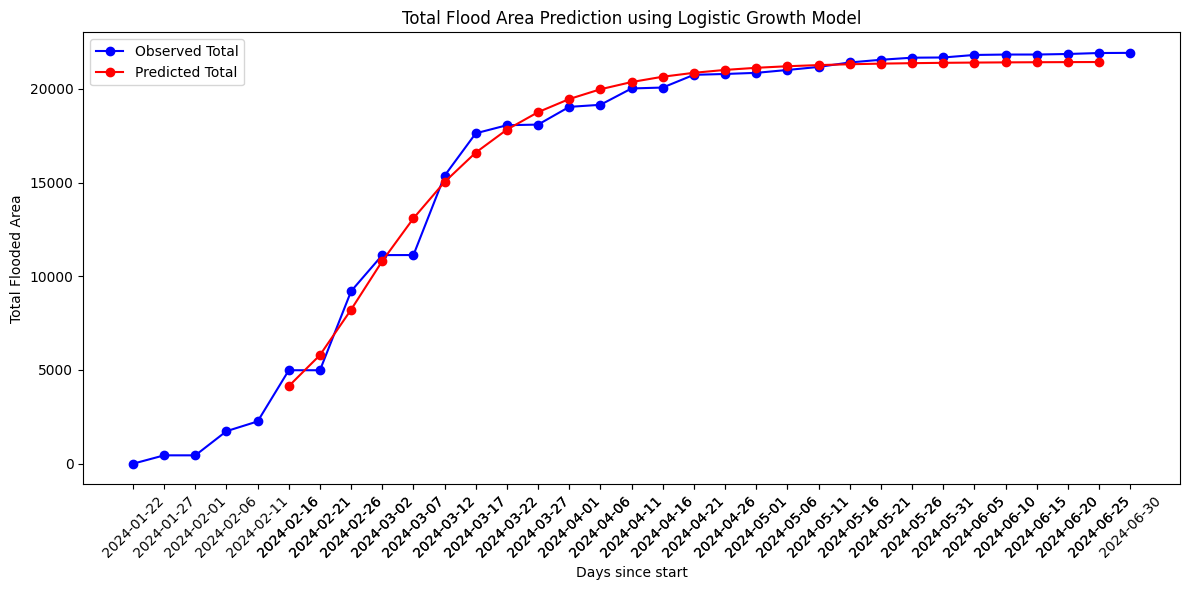

Predictions complete. Results saved to 'flood_detection_results_with_predictions.csv'

Summary of predicted total flood areas:
2024-02-16: 4139.88
2024-02-21: 5796.79
2024-02-26: 8223.54
2024-03-02: 10813.38
2024-03-07: 13093.70
2024-03-12: 15032.41
2024-03-17: 16601.07
2024-03-22: 17824.90
2024-03-27: 18756.94
2024-04-01: 19456.63
2024-04-06: 19977.25
2024-04-11: 20362.40
2024-04-16: 20646.44
2024-04-21: 20855.58
2024-04-26: 21009.39
2024-05-01: 21122.45
2024-05-06: 21205.54
2024-05-11: 21266.66
2024-05-16: 21311.67
2024-05-21: 21344.88
2024-05-26: 21369.47
2024-05-31: 21387.75
2024-06-05: 21401.46
2024-06-10: 21411.82
2024-06-15: 21419.76
2024-06-20: 21425.96
2024-06-25: 21430.88


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Function to predict flood areas using logistic growth model
def predict_grid_flood_areas(df_final, future_dates):
    # Extract date columns (assuming they start from the 7th column)
    date_columns = df_final.columns[6:-1]
    base_date = datetime.strptime(date_columns[0], "%Y-%m-%d")

    # Convert dates to numerical values (days since the first date)
    t = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in date_columns])
    t_future = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in future_dates])

    # Prepare DataFrame for predictions
    predictions_df = pd.DataFrame(index=df_final.index)
    predictions_df['ID'] = df_final['ID']

    for idx, row in df_final.iterrows():
        # Convert the flood area values to numeric, coerce invalid values to NaN
        areas = pd.to_numeric(row[date_columns], errors='coerce').values

        # Skip prediction if all areas are 0 or NaN
        if np.all(np.isnan(areas)) or np.all(areas == 0):
            predictions_df.loc[idx, future_dates] = 0
            continue

        try:
            # Fit the logistic growth model
            p0 = [np.max(areas), 0.1, np.median(t)]  # Initial parameter guess=== need to be updated
            params, _ = curve_fit(logistic_growth, t, areas, p0=p0, maxfev=10000)

            # Generate predictions
            predicted_areas = logistic_growth(t_future, *params)
            predictions_df.loc[idx, future_dates] = predicted_areas
        except:
            # If curve fitting fails, use the last known area for all future dates
            predictions_df.loc[idx, future_dates] = areas[-1]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(t, df_final[date_columns].sum(), 'bo-', label='Observed Total')
    plt.plot(t_future, predictions_df[future_dates].sum(), 'ro-', label='Predicted Total')
    plt.xlabel('Day of Year')
    plt.ylabel('Total Flooded Area')
    plt.title('Total Flood Area Prediction using Logistic Growth Model')
    plt.legend()

    # Add date labels
    all_dates = np.concatenate([t, t_future])
    date_labels = [base_date + timedelta(days=int(d)) for d in all_dates]
    plt.xticks(all_dates, [d.strftime('%Y-%m-%d') for d in date_labels], rotation=45)

    plt.tight_layout()
    plt.show()

    return predictions_df

# Usage in the main script
# Assuming df_final is already created and contains flood area data
df_final = pd.read_csv('dffinal_four.csv', index_col=0)
# Define future dates for prediction (e.g., 30 days after the last observed date)
last_observed_date = datetime.strptime(df_final.columns[-30], "%Y-%m-%d")
future_dates = [(last_observed_date + timedelta(days=5 * i)).strftime("%Y-%m-%d") for i in range(1, 28)]

# Predict future flood areas
predictions_df = predict_grid_flood_areas(df_final, future_dates)

# Combine observed and predicted data
result_df = pd.concat([df_final, predictions_df[future_dates]], axis=1)

# Save the results
result_df.to_csv('flood_detection_results_with_predictions.csv', index=False)

print("Predictions complete. Results saved to 'flood_detection_results_with_predictions.csv'")

# Optional: Print summary statistics for the predictions
print("\nSummary of predicted total flood areas:")
for date in future_dates:
    total_area = predictions_df[date].sum()
    print(f"{date}: {total_area:.2f}")


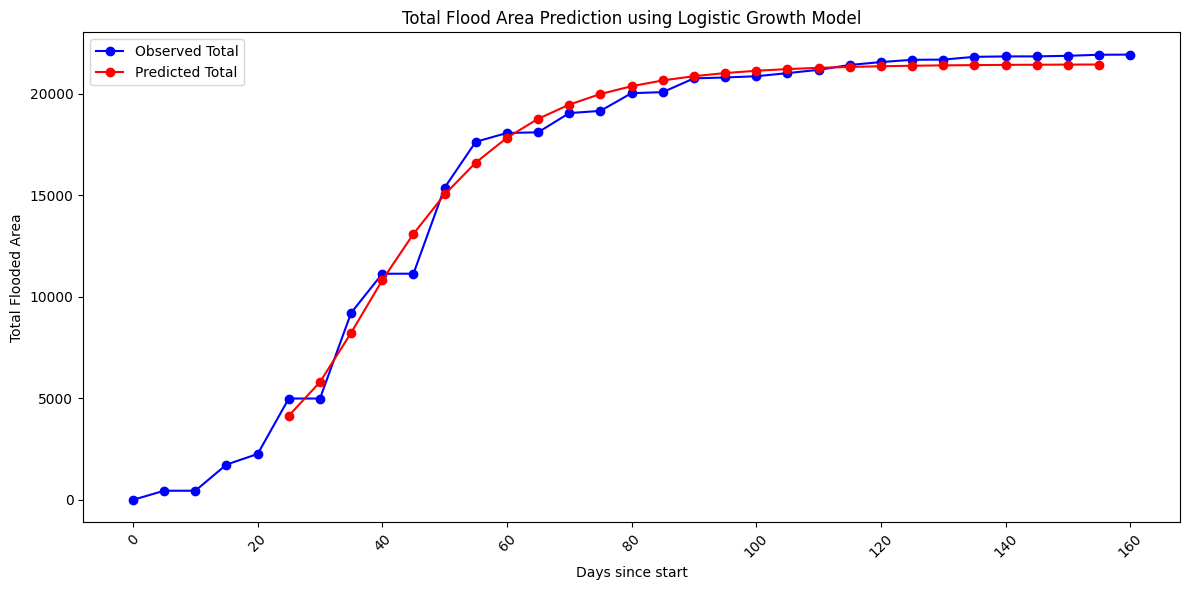

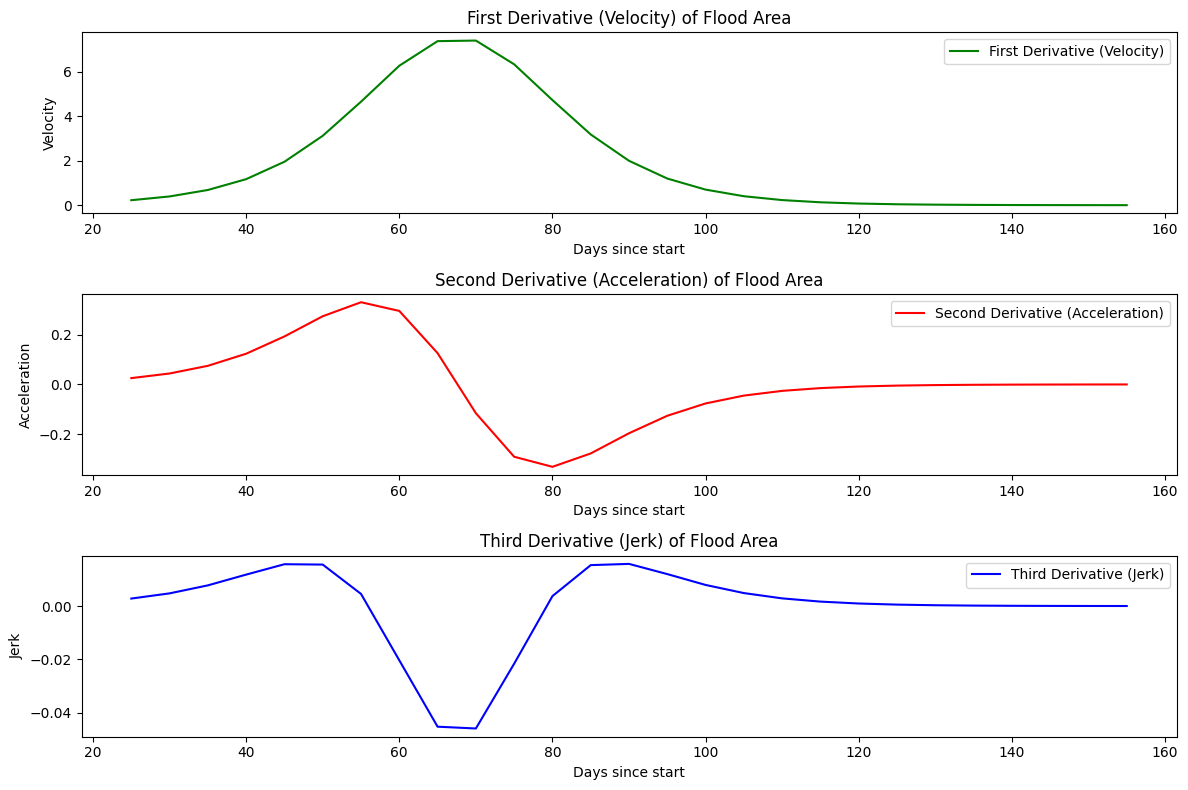

Predictions complete. Results saved to 'flood_detection_results_with_predictions_and_derivatives.csv'

Summary of predicted total flood areas:
2024-02-16: 4139.88
2024-02-21: 5796.79
2024-02-26: 8223.54
2024-03-02: 10813.38
2024-03-07: 13093.70
2024-03-12: 15032.41
2024-03-17: 16601.07
2024-03-22: 17824.90
2024-03-27: 18756.94
2024-04-01: 19456.63
2024-04-06: 19977.25
2024-04-11: 20362.40
2024-04-16: 20646.44
2024-04-21: 20855.58
2024-04-26: 21009.39
2024-05-01: 21122.45
2024-05-06: 21205.54
2024-05-11: 21266.66
2024-05-16: 21311.67
2024-05-21: 21344.88
2024-05-26: 21369.47
2024-05-31: 21387.75
2024-06-05: 21401.46
2024-06-10: 21411.82
2024-06-15: 21419.76
2024-06-20: 21425.96
2024-06-25: 21430.88


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First derivative (rate of change of flood area, "velocity")
def logistic_growth_prime(t, L, k, t0):
    return (L * k * np.exp(-k * (t - t0))) / ((1 + np.exp(-k * (t - t0)))**2)

# Second derivative (acceleration of flood area)
def logistic_growth_double_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (-L * k**2 * exp_term * (1 - exp_term)) / ((1 + exp_term)**3)

# Third derivative (jerk of flood area)
def logistic_growth_triple_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (L * k**3 * exp_term * (1 - 4 * exp_term + exp_term**2)) / ((1 + exp_term)**4)

# Function to predict flood areas using logistic growth model and visualize derivatives
def predict_grid_flood_areas_with_derivatives(df_final, future_dates):
    # Extract date columns (assuming they start from the 7th column)
    date_columns = df_final.columns[6:-1]
    base_date = datetime.strptime(date_columns[0], "%Y-%m-%d")

    # Convert dates to numerical values (days since the first date)
    t = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in date_columns])
    t_future = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in future_dates])

    # Prepare DataFrame for predictions
    predictions_df = pd.DataFrame(index=df_final.index)
    predictions_df['ID'] = df_final['ID']

    for idx, row in df_final.iterrows():
        # Convert the flood area values to numeric, coerce invalid values to NaN
        areas = pd.to_numeric(row[date_columns], errors='coerce').values

        # Skip prediction if all areas are 0 or NaN
        if np.all(np.isnan(areas)) or np.all(areas == 0):
            predictions_df.loc[idx, future_dates] = 0
            continue

        try:
            # Fit the logistic growth model
            p0 = [np.max(areas), 0.1, np.median(t)]  # Initial parameter guess
            params, _ = curve_fit(logistic_growth, t, areas, p0=p0, maxfev=10000)

            # Generate predictions
            predicted_areas = logistic_growth(t_future, *params)
            predictions_df.loc[idx, future_dates] = predicted_areas
        except:
            # If curve fitting fails, use the last known area for all future dates
            predictions_df.loc[idx, future_dates] = areas[-1]

    # Visualize the total observed and predicted flood area
    plt.figure(figsize=(12, 6))
    plt.plot(t, df_final[date_columns].sum(), 'bo-', label='Observed Total')
    plt.plot(t_future, predictions_df[future_dates].sum(), 'ro-', label='Predicted Total')
    plt.xlabel('Days since start')
    plt.ylabel('Total Flooded Area')
    plt.title('Total Flood Area Prediction using Logistic Growth Model')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualizing derivatives (velocity, acceleration, jerk) for the overall sum
    total_areas = predictions_df[future_dates].sum()

    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(t_future, logistic_growth_prime(t_future, *params), 'g-', label="First Derivative (Velocity)")
    plt.title("First Derivative (Velocity) of Flood Area")
    plt.xlabel("Days since start")
    plt.ylabel("Velocity")
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t_future, logistic_growth_double_prime(t_future, *params), 'r-', label="Second Derivative (Acceleration)")
    plt.title("Second Derivative (Acceleration) of Flood Area")
    plt.xlabel("Days since start")
    plt.ylabel("Acceleration")
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t_future, logistic_growth_triple_prime(t_future, *params), 'b-', label="Third Derivative (Jerk)")
    plt.title("Third Derivative (Jerk) of Flood Area")
    plt.xlabel("Days since start")
    plt.ylabel("Jerk")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return predictions_df

# Usage in the main script
# Assuming df_final is already created and contains flood area data
df_final = pd.read_csv('dffinal_four.csv', index_col=0)
# Define future dates for prediction (e.g., 30 days after the last observed date)
last_observed_date = datetime.strptime(df_final.columns[-30], "%Y-%m-%d")
future_dates = [(last_observed_date + timedelta(days=5 * i)).strftime("%Y-%m-%d") for i in range(1, 28)]

# Predict future flood areas and plot derivatives
predictions_df = predict_grid_flood_areas_with_derivatives(df_final, future_dates)

# Combine observed and predicted data
result_df = pd.concat([df_final, predictions_df[future_dates]], axis=1)

# Save the results
result_df.to_csv('flood_detection_results_with_predictions_and_derivatives.csv', index=False)

print("Predictions complete. Results saved to 'flood_detection_results_with_predictions_and_derivatives.csv'")

# Optional: Print summary statistics for the predictions
print("\nSummary of predicted total flood areas:")
for date in future_dates:
    total_area = predictions_df[date].sum()
    print(f"{date}: {total_area:.2f}")


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First derivative (rate of change of flood area, "velocity")
def logistic_growth_prime(t, L, k, t0):
    return (L * k * np.exp(-k * (t - t0))) / ((1 + np.exp(-k * (t - t0)))**2)

# Second derivative (acceleration of flood area)
def logistic_growth_double_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (-L * k**2 * exp_term * (1 - exp_term)) / ((1 + exp_term)**3)

# Third derivative (jerk of flood area)
def logistic_growth_triple_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (L * k**3 * exp_term * (1 - 4 * exp_term + exp_term**2)) / ((1 + exp_term)**4)

# Function to predict and plot flood areas, derivatives (velocity, acceleration, jerk)
def predict_and_plot_derivatives(df_final, future_dates):
    # Extract date columns (assuming they start from the 7th column)
    date_columns = df_final.columns[6:-1]
    base_date = datetime.strptime(date_columns[0], "%Y-%m-%d")

    # Convert dates to numerical values (days since the first date)
    t = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in date_columns])
    t_future = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in future_dates])

    for idx, row in df_final.iterrows():
        # Get the flood area values
        areas = pd.to_numeric(row[date_columns], errors='coerce').values

        # Skip prediction if all areas are 0 or NaN
        if np.all(np.isnan(areas)) or np.all(areas == 0):
            continue

        try:
            # Fit the logistic growth model
            p0 = [np.max(areas), 0.1, np.median(t)]
            params, _ = curve_fit(logistic_growth, t, areas, p0=p0, maxfev=10000)

            # Generate predictions for future dates
            predicted_areas = logistic_growth(t_future, *params)

            # Compute velocity, acceleration, and jerk using the derivatives
            velocity = logistic_growth_prime(t_future, *params)
            acceleration = logistic_growth_double_prime(t_future, *params)
            jerk = logistic_growth_triple_prime(t_future, *params)

            # Plotting
            fig, ax1 = plt.subplots(figsize=(10, 6))
            ax1.set_xlabel('Days since start')
            ax1.set_ylabel('Flood Area', color='blue')
            ax1.plot(t, areas, 'bo-', label="Observed Flood Area", color='blue')
            ax1.plot(t_future, predicted_areas, 'ro-', label="Predicted Flood Area", color='red')
            ax1.tick_params(axis='y', labelcolor='blue')
            ax1.legend(loc="upper left")

            ax2 = ax1.twinx()
            ax2.set_ylabel('Derivatives (Velocity, Acceleration, Jerk)', color='green')
            ax2.plot(t_future, velocity, 'g-', label="Velocity (First Derivative)", linestyle='dashed')
            ax2.plot(t_future, acceleration, 'r-', label="Acceleration (Second Derivative)", linestyle='dotted')
            ax2.plot(t_future, jerk, 'b-', label="Jerk (Third Derivative)", linestyle='dashdot')
            ax2.tick_params(axis='y', labelcolor='green')

            fig.tight_layout()
            ax2.legend(loc="upper right")
            plt.title(f"Flood Area Predictions and Derivatives for Grid {row['ID']}")
            plt.show()

        except Exception as e:
            print(f"Error for Grid {row['ID']}: {e}")

# Usage in the main script
df_final = pd.read_csv('dffinal_four.csv', index_col=0)
# Define future dates for prediction
last_observed_date = datetime.strptime(df_final.columns[-30], "%Y-%m-%d")
future_dates = [(last_observed_date + timedelta(days=5 * i)).strftime("%Y-%m-%d") for i in range(1, 28)]

# Predict flood areas and plot with derivatives
predict_and_plot_derivatives(df_final, future_dates)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First derivative (rate of change of flood area, "velocity")
def logistic_growth_prime(t, L, k, t0):
    return (L * k * np.exp(-k * (t - t0))) / ((1 + np.exp(-k * (t - t0)))**2)

# Second derivative (acceleration of flood area)
def logistic_growth_double_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (-L * k**2 * exp_term * (1 - exp_term)) / ((1 + exp_term)**3)

# Third derivative (jerk of flood area)
def logistic_growth_triple_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (L * k**3 * exp_term * (1 - 4 * exp_term + exp_term**2)) / ((1 + exp_term)**4)

# Function to find inflection points and estimate extreme points of next derivative
def analyze_derivatives(t, params):
    # Compute first, second, and third derivatives
    velocity = logistic_growth_prime(t, *params)
    acceleration = logistic_growth_double_prime(t, *params)
    jerk = logistic_growth_triple_prime(t, *params)

    # Find inflection points (where the derivative changes sign)
    inflection_points_acceleration = np.where(np.diff(np.sign(acceleration)))[0]
    inflection_points_jerk = np.where(np.diff(np.sign(jerk)))[0]

    print(f"Inflection points of acceleration (estimate extreme points of jerk): {inflection_points_acceleration}")
    print(f"Inflection points of velocity (estimate extreme points of acceleration): {inflection_points_jerk}")

    return velocity, acceleration, jerk, inflection_points_acceleration, inflection_points_jerk

# Function to predict flood areas using logistic growth model and analyze derivatives
def predict_and_analyze_derivatives(df_final, future_dates):
    # Extract date columns (assuming they start from the 7th column)
    date_columns = df_final.columns[6:-1]
    base_date = datetime.strptime(date_columns[0], "%Y-%m-%d")

    # Convert dates to numerical values (days since the first date)
    t = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in date_columns])
    t_future = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in future_dates])

    # Prepare DataFrame for predictions
    predictions_df = pd.DataFrame(index=df_final.index)
    predictions_df['ID'] = df_final['ID']

    for idx, row in df_final.iterrows():
        # Convert the flood area values to numeric, coerce invalid values to NaN
        areas = pd.to_numeric(row[date_columns], errors='coerce').values

        # Skip prediction if all areas are 0 or NaN
        if np.all(np.isnan(areas)) or np.all(areas == 0):
            predictions_df.loc[idx, future_dates] = 0
            continue

        try:
            # Fit the logistic growth model
            p0 = [np.max(areas), 0.1, np.median(t)]  # Initial parameter guess
            params, _ = curve_fit(logistic_growth, t, areas, p0=p0, maxfev=10000)

            # Generate predictions
            predicted_areas = logistic_growth(t_future, *params)
            predictions_df.loc[idx, future_dates] = predicted_areas

            # Analyze derivatives and find inflection points
            velocity, acceleration, jerk, inflection_acc, inflection_jerk = analyze_derivatives(t_future, params)

            # Plot derivatives
            plt.figure(figsize=(12, 8))
            plt.subplot(3, 1, 1)
            plt.plot(t_future, velocity, 'g-', label="First Derivative (Velocity)")
            plt.scatter(t_future[inflection_jerk], velocity[inflection_jerk], color='red', label="Inflection Points (Velocity)")
            plt.title("First Derivative (Velocity)")
            plt.xlabel("Days since start")
            plt.ylabel("Velocity")
            plt.legend()

            plt.subplot(3, 1, 2)
            plt.plot(t_future, acceleration, 'r-', label="Second Derivative (Acceleration)")
            plt.scatter(t_future[inflection_acc], acceleration[inflection_acc], color='red', label="Inflection Points (Acceleration)")
            plt.title("Second Derivative (Acceleration)")
            plt.xlabel("Days since start")
            plt.ylabel("Acceleration")
            plt.legend()

            plt.subplot(3, 1, 3)
            plt.plot(t_future, jerk, 'b-', label="Third Derivative (Jerk)")
            plt.title("Third Derivative (Jerk)")
            plt.xlabel("Days since start")
            plt.ylabel("Jerk")
            plt.legend()

            plt.tight_layout()
            plt.show()

        except:
            # If curve fitting fails, use the last known area for all future dates
            predictions_df.loc[idx, future_dates] = areas[-1]

    return predictions_df

# Usage in the main script
# Assuming df_final is already created and contains flood area data
df_final = pd.read_csv('dffinal_four.csv', index_col=0)
# Define future dates for prediction (e.g., 30 days after the last observed date)
last_observed_date = datetime.strptime(df_final.columns[-30], "%Y-%m-%d")
future_dates = [(last_observed_date + timedelta(days=5 * i)).strftime("%Y-%m-%d") for i in range(1, 28)]

# Predict future flood areas and analyze derivatives
predictions_df = predict_and_analyze_derivatives(df_final, future_dates)

# Combine observed and predicted data
result_df = pd.concat([df_final, predictions_df[future_dates]], axis=1)

# # Save the results
# result_df.to_csv('flood_detection_results_with_derivatives_analysis.csv', index=False)

# print("Predictions complete. Results saved to 'flood_detection_results_with_derivatives_analysis.csv'")

# Optional: Print summary statistics for the predictions
print("\nSummary of predicted total flood areas:")
for date in future_dates:
    total_area = predictions_df[date].sum()
    print(f"{date}: {total_area:.2f}")


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First derivative (rate of change of flood area, "velocity")
def logistic_growth_prime(t, L, k, t0):
    return (L * k * np.exp(-k * (t - t0))) / ((1 + np.exp(-k * (t - t0)))**2)

# Second derivative (acceleration of flood area)
def logistic_growth_double_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (-L * k**2 * exp_term * (1 - exp_term)) / ((1 + exp_term)**3)

# Third derivative (jerk of flood area)
def logistic_growth_triple_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (L * k**3 * exp_term * (1 - 4 * exp_term + exp_term**2)) / ((1 + exp_term)**4)

# Function to find inflection points and estimate extreme points of next derivative
def analyze_derivatives(t, params):
    # Compute first, second, and third derivatives
    velocity = logistic_growth_prime(t, *params)
    acceleration = logistic_growth_double_prime(t, *params)
    jerk = logistic_growth_triple_prime(t, *params)

    # Find inflection points (where the derivative changes sign)
    inflection_points_acceleration = np.where(np.diff(np.sign(acceleration)))[0]
    inflection_points_jerk = np.where(np.diff(np.sign(jerk)))[0]

    return velocity, acceleration, jerk, inflection_points_acceleration, inflection_points_jerk

# Function to predict flood areas, analyze derivatives, and plot them per grid
def predict_and_plot_derivatives_per_grid(df_final, future_dates):
    # Extract date columns (assuming they start from the 7th column)
    date_columns = df_final.columns[6:-1]
    base_date = datetime.strptime(date_columns[0], "%Y-%m-%d")

    # Convert dates to numerical values (days since the first date)
    t = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in date_columns])
    t_future = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in future_dates])

    # Prepare DataFrame for predictions
    predictions_df = pd.DataFrame(index=df_final.index)
    predictions_df['ID'] = df_final['ID']

    for idx, row in df_final.iterrows():
        # Convert the flood area values to numeric, coerce invalid values to NaN
        areas = pd.to_numeric(row[date_columns], errors='coerce').values

        # Skip prediction if all areas are 0 or NaN
        if np.all(np.isnan(areas)) or np.all(areas == 0):
            predictions_df.loc[idx, future_dates] = 0
            continue

        try:
            # Fit the logistic growth model
            p0 = [np.max(areas), 0.1, np.median(t)]  # Initial parameter guess
            params, _ = curve_fit(logistic_growth, t, areas, p0=p0, maxfev=10000)

            # Generate predictions
            predicted_areas = logistic_growth(t_future, *params)
            predictions_df.loc[idx, future_dates] = predicted_areas

            # Analyze derivatives and find inflection points
            velocity, acceleration, jerk, inflection_acc, inflection_jerk = analyze_derivatives(t_future, params)

            # Plot derivatives in the same column for each grid
            plt.figure(figsize=(10, 12))
            grid_id = row['ID']

            plt.subplot(3, 1, 1)
            plt.plot(t_future, velocity, 'g-', label="Velocity")
            plt.scatter(t_future[inflection_jerk], velocity[inflection_jerk], color='red', label="Inflection Points")
            plt.title(f"Grid {grid_id} - Velocity (First Derivative)")
            plt.xlabel("Days since start")
            plt.ylabel("Velocity")
            plt.legend()

            plt.subplot(3, 1, 2)
            plt.plot(t_future, acceleration, 'r-', label="Acceleration")
            plt.scatter(t_future[inflection_acc], acceleration[inflection_acc], color='red', label="Inflection Points")
            plt.title(f"Grid {grid_id} - Acceleration (Second Derivative)")
            plt.xlabel("Days since start")
            plt.ylabel("Acceleration")
            plt.legend()

            plt.subplot(3, 1, 3)
            plt.plot(t_future, jerk, 'b-', label="Jerk")
            plt.title(f"Grid {grid_id} - Jerk (Third Derivative)")
            plt.xlabel("Days since start")
            plt.ylabel("Jerk")
            plt.legend()

            plt.tight_layout()
            plt.show()

        except:
            # If curve fitting fails, use the last known area for all future dates
            predictions_df.loc[idx, future_dates] = areas[-1]

    return predictions_df

# Usage in the main script
# Assuming df_final is already created and contains flood area data
df_final = pd.read_csv('dffinal_four.csv', index_col=0)
# Define future dates for prediction (e.g., 30 days after the last observed date)
last_observed_date = datetime.strptime(df_final.columns[-30], "%Y-%m-%d")
future_dates = [(last_observed_date + timedelta(days=5 * i)).strftime("%Y-%m-%d") for i in range(1, 28)]

# Predict future flood areas and plot derivatives for each grid
predictions_df = predict_and_plot_derivatives_per_grid(df_final, future_dates)

# Combine observed and predicted data
result_df = pd.concat([df_final, predictions_df[future_dates]], axis=1)

# Save the results
result_df.to_csv('flood_detection_results_with_derivatives_per_grid.csv', index=False)

print("Predictions and plots complete. Results saved to 'flood_detection_results_with_derivatives_per_grid.csv'")

# Optional: Print summary statistics for the predictions
print("\nSummary of predicted total flood areas:")
for date in future_dates:
    total_area = predictions_df[date].sum()
    print(f"{date}: {total_area:.2f}")


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First derivative (rate of change of flood area, "velocity")
def logistic_growth_prime(t, L, k, t0):
    return (L * k * np.exp(-k * (t - t0))) / ((1 + np.exp(-k * (t - t0)))**2)

# Second derivative (acceleration of flood area)
def logistic_growth_double_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (-L * k**2 * exp_term * (1 - exp_term)) / ((1 + exp_term)**3)

# Third derivative (jerk of flood area)
def logistic_growth_triple_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (L * k**3 * exp_term * (1 - 4 * exp_term + exp_term**2)) / ((1 + exp_term)**4)

# Function to find inflection points and estimate extreme points of next derivative
def analyze_derivatives(t, params):
    # Compute first, second, and third derivatives
    velocity = logistic_growth_prime(t, *params)
    acceleration = logistic_growth_double_prime(t, *params)
    jerk = logistic_growth_triple_prime(t, *params)

    # Find inflection points (where the derivative changes sign)
    inflection_points_acceleration = np.where(np.diff(np.sign(acceleration)))[0]
    inflection_points_jerk = np.where(np.diff(np.sign(jerk)))[0]

    return velocity, acceleration, jerk, inflection_points_acceleration, inflection_points_jerk

# Function to predict flood areas, analyze derivatives, and plot them for all grids as subplots
def predict_and_plot_derivatives_all_grids(df_final, future_dates):
    # Extract date columns (assuming they start from the 7th column)
    date_columns = df_final.columns[6:-1]
    base_date = datetime.strptime(date_columns[0], "%Y-%m-%d")

    # Convert dates to numerical values (days since the first date)
    t = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in date_columns])
    t_future = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in future_dates])

    # Prepare DataFrame for predictions
    predictions_df = pd.DataFrame(index=df_final.index)
    predictions_df['ID'] = df_final['ID']

    # Create subplots for all grids
    num_grids = len(df_final)
    fig, axes = plt.subplots(num_grids, 3, figsize=(15, 5 * num_grids))

    if num_grids == 1:
        axes = [axes]  # Ensure axes is a list if there's only one grid

    for idx, row in df_final.iterrows():
        # Convert the flood area values to numeric, coerce invalid values to NaN
        areas = pd.to_numeric(row[date_columns], errors='coerce').values

        # Skip prediction if all areas are 0 or NaN
        if np.all(np.isnan(areas)) or np.all(areas == 0):
            predictions_df.loc[idx, future_dates] = 0
            continue

        try:
            # Fit the logistic growth model
            p0 = [np.max(areas), 0.1, np.median(t)]  # Initial parameter guess
            params, _ = curve_fit(logistic_growth, t, areas, p0=p0, maxfev=10000)

            # Generate predictions
            predicted_areas = logistic_growth(t_future, *params)
            predictions_df.loc[idx, future_dates] = predicted_areas

            # Analyze derivatives and find inflection points
            velocity, acceleration, jerk, inflection_acc, inflection_jerk = analyze_derivatives(t_future, params)

            # Plot derivatives as subplots for each grid
            grid_id = row['ID']
            ax1, ax2, ax3 = axes[idx]

            # Plot velocity
            ax1.plot(t_future, velocity, 'g-', label="Velocity")
            ax1.scatter(t_future[inflection_jerk], velocity[inflection_jerk], color='red', label="Inflection Points")
            ax1.set_title(f"Grid {grid_id} - Velocity (First Derivative)")
            ax1.set_xlabel("Days since start")
            ax1.set_ylabel("Velocity")
            ax1.legend()

            # Plot acceleration
            ax2.plot(t_future, acceleration, 'r-', label="Acceleration")
            ax2.scatter(t_future[inflection_acc], acceleration[inflection_acc], color='red', label="Inflection Points")
            ax2.set_title(f"Grid {grid_id} - Acceleration (Second Derivative)")
            ax2.set_xlabel("Days since start")
            ax2.set_ylabel("Acceleration")
            ax2.legend()

            # Plot jerk
            ax3.plot(t_future, jerk, 'b-', label="Jerk")
            ax3.set_title(f"Grid {grid_id} - Jerk (Third Derivative)")
            ax3.set_xlabel("Days since start")
            ax3.set_ylabel("Jerk")
            ax3.legend()

        except Exception as e:
            print(f"Error for Grid {row['ID']}: {e}")
            predictions_df.loc[idx, future_dates] = areas[-1]

    plt.tight_layout()
    plt.show()

    return predictions_df

# Usage in the main script
# Assuming df_final is already created and contains flood area data
df_final = pd.read_csv('dffinal_four.csv', index_col=0)
# Define future dates for prediction (e.g., 30 days after the last observed date)
last_observed_date = datetime.strptime(df_final.columns[-30], "%Y-%m-%d")
future_dates = [(last_observed_date + timedelta(days=5 * i)).strftime("%Y-%m-%d") for i in range(1, 28)]

# Predict future flood areas and plot derivatives for all grids as subplots
predictions_df = predict_and_plot_derivatives_all_grids(df_final, future_dates)

# Combine observed and predicted data
result_df = pd.concat([df_final, predictions_df[future_dates]], axis=1)

# Save the results
result_df.to_csv('flood_detection_results_with_derivatives_all_grids.csv', index=False)

print("Predictions and plots complete. Results saved to 'flood_detection_results_with_derivatives_all_grids.csv'")

# Optional: Print summary statistics for the predictions
print("\nSummary of predicted total flood areas:")
for date in future_dates:
    total_area = predictions_df[date].sum()
    print(f"{date}: {total_area:.2f}")


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First derivative (rate of change of flood area, "velocity")
def logistic_growth_prime(t, L, k, t0):
    return (L * k * np.exp(-k * (t - t0))) / ((1 + np.exp(-k * (t - t0)))**2)

# Second derivative (acceleration of flood area)
def logistic_growth_double_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (-L * k**2 * exp_term * (1 - exp_term)) / ((1 + exp_term)**3)

# Third derivative (jerk of flood area)
def logistic_growth_triple_prime(t, L, k, t0):
    exp_term = np.exp(-k * (t - t0))
    return (L * k**3 * exp_term * (1 - 4 * exp_term + exp_term**2)) / ((1 + exp_term)**4)

# Function to find inflection points and estimate extreme points of next derivative
def analyze_derivatives(t, params):
    velocity = logistic_growth_prime(t, *params)
    acceleration = logistic_growth_double_prime(t, *params)
    jerk = logistic_growth_triple_prime(t, *params)

    # Find inflection points
    inflection_points_acceleration = np.where(np.diff(np.sign(acceleration)))[0]
    inflection_points_jerk = np.where(np.diff(np.sign(jerk)))[0]

    return velocity, acceleration, jerk, inflection_points_acceleration, inflection_points_jerk

# Function to predict flood areas, analyze derivatives, and plot them for all grids
def predict_and_plot_derivatives_all_grids(df_final, future_dates):
    # Extract date columns (assuming they start from the 7th column)
    date_columns = df_final.columns[6:-1]
    base_date = datetime.strptime(date_columns[0], "%Y-%m-%d")

    # Convert dates to numerical values (days since the first date)
    t = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in date_columns])
    t_future = np.array([(datetime.strptime(d, "%Y-%m-%d") - base_date).days for d in future_dates])

    # Prepare DataFrame for predictions
    predictions_df = pd.DataFrame(index=df_final.index)
    predictions_df['ID'] = df_final['ID']

    # Store total flood areas for plotting later
    total_observed_areas = np.zeros(len(t))
    total_predicted_areas = np.zeros(len(t_future))

    # Loop through each grid and generate predictions and plots
    for idx, row in df_final.iterrows():
        areas = pd.to_numeric(row[date_columns], errors='coerce').values

        if np.all(np.isnan(areas)) or np.all(areas == 0):
            predictions_df.loc[idx, future_dates] = 0
            continue

        try:
            # Fit the logistic growth model
            p0 = [np.max(areas), 0.1, np.median(t)]
            params, _ = curve_fit(logistic_growth, t, areas, p0=p0, maxfev=10000)

            # Generate predictions
            predicted_areas = logistic_growth(t_future, *params)
            predictions_df.loc[idx, future_dates] = predicted_areas

            # Analyze derivatives
            velocity, acceleration, jerk, _, _ = analyze_derivatives(t_future, params)

            # Sum the observed and predicted areas for later plotting
            total_observed_areas += areas
            total_predicted_areas += predicted_areas

        except Exception as e:
            print(f"Error for Grid {row['ID']}: {e}")
            predictions_df.loc[idx, future_dates] = areas[-1]

    # Plot combined observed and predicted flood areas for all grids
    plt.figure(figsize=(10, 6))
    plt.plot(t, total_observed_areas, 'bo-', label="Observed Total Flood Area")
    plt.plot(t_future, total_predicted_areas, 'ro-', label="Predicted Total Flood Area")
    plt.xlabel('Days since start')
    plt.ylabel('Total Flood Area (all grids combined)')
    plt.title('Observed and Predicted Total Flood Area Across All Grids')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return predictions_df

# Main script
df_final = pd.read_csv('dffinal_four.csv', index_col=0)
# Define future dates for prediction (e.g., 30 days after the last observed date)
last_observed_date = datetime.strptime(df_final.columns[-30], "%Y-%m-%d")
future_dates = [(last_observed_date + timedelta(days=5 * i)).strftime("%Y-%m-%d") for i in range(1, 28)]

# Predict future flood areas and plot derivatives for all grids
predictions_df = predict_and_plot_derivatives_all_grids(df_final, future_dates)

# Combine observed and predicted data
result_df = pd.concat([df_final, predictions_df[future_dates]], axis=1)

# Save the results
result_df.to_csv('flood_detection_results_with_derivatives_all_grids.csv', index=False)

print("Predictions and plots complete. Results saved to 'flood_detection_results_with_derivatives_all_grids.csv'")

# Optional: Print summary statistics for the predictions
print("\nSummary of predicted total flood areas:")
for date in future_dates:
    total_area = predictions_df[date].sum()
    print(f"{date}: {total_area:.2f}")


In [ ]:
 #@title latest copy 2245
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence').clip(dagana)
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water').clip(dagana)
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass').clip(dagana)

# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map').clip(dagana)

# Define a map centered on San Francisco Bay.
m = geemap.Map(center=[center_lat, center_lon], zoom=10)

# Initialize the Folium map
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list
# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha',area_ha) #area.get('MNDWI'))
    return grid.map(calculate_area)


# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        # Extract relevant properties from each feature
        # These properties depend on what's available in your feature collection
        grid_id = feature['properties']['ID']
        # Assuming 'flood_area_ha' is calculated and included in the feature properties
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)

        # Append the processed data in a dictionary format to the list
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']  # Include all other grid properties
            # Add additional lines here if you have more properties to include
        })

    return flood_data


def create_flood_dataframe(flood_data):
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(flood_data)

    # Optional: Convert 'date' from string to datetime format for easier manipulation
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' and 'grid_id' as an index if desired
    df.set_index(['date', 'grid_id'], inplace=True)

    # Return the DataFrame
    return df
def process_flood_results(df, grid_properties):

    # Convert 'flood_area_ha' to numeric type if it's not already
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

    # Handling missing values after conversion, if any
    df['flood_area_ha'].fillna(0, inplace=True)

    # If grid_properties is a DataFrame, ensure it has 'grid_id' as an index or as a column
    if isinstance(grid_properties, pd.DataFrame):
        # Merge additional properties from grid_properties DataFrame
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        # If grid_properties is a dictionary or another format, adjust this code accordingly
        final_df = df  # This line can be modified to incorporate additional merging logic

    # Return the processed DataFrame
    return final_df


# Function to process each date
def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()#.clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)

    #Apply JRC masks to refine flood detection
    # non_permanent_water1 = jrcglobal_dataset.lte(10)
    # non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    permanent_water3 = jrcMonthly_dataset.eq(1)
    non_permanent_water_mask = jrcglobal_dataset.lte(10).And(jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))).And(jrcMonthly_dataset.eq(1))
    #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    #m.add_layer(cropland_and_grassland_mask, {'palette': 'green'}, 'cropland_mask', opacity=0.7)
        #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(0).updateMask(permanent_water3)

    # Combine all conditions
    # current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_and_grassland_mask)

    return current_mask
folder = '/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/flood_masks'
# def export_image(image, description, folder, date):
#     task = ee.batch.Export.image.toDrive(
#         image=image,
#         description=description,
#         folder=folder,
#         fileNamePrefix=f'{description}_{date}',
#         region=dagana.bounds().getInfo()['coordinates'],
#         scale=10,
#         crs='EPSG:4326',
#         fileFormat='GeoTIFF',
#         maxPixels=1e13
#     )
#     task.start()

# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-06-30'
date_ranges = enhanced_date_processing(start_date, end_date)

# Function to process and visualize flooding for each date
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(0).reproject(crs=projection, scale=10).clip(aoi)

    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(0))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)
                #print(cumulative_flood_mask.getInfo())

              # Visualization
            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': ['yellow', 'blue', 'green', 'orange', 'red']  # Adjust colors as needed
            }
            m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                flood_vis_params, f'Flood Progression up to {date}')

            # m.add_layer(cumulative_flood_mask.gte(3), flood_vis_params, f'Flood Mask {date}')
            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gte(3), grid)

            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))
            #export_image(cumulative_flood_mask, f'cumulative_flood_mask_{date}', 'Flood_Masks', date)

        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    return flood_data


# Add layer control and save the map
# folium.LayerControl().add_to(m)
#display(m)
# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
#Reset the index to make 'date' and 'grid_id' regular columns
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns  # columns already contain date as they are pivoted
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
# Merge with the other columns you want to keep
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')

# Ensure 'grid_id' and 'ID' are the same
df_pivoted = df_pivoted.rename_axis(index='ID')

# Merge the pivoted data with other columns
df_final = df_other.join(df_pivoted)

# Reset index to make 'ID' a regular column
df_final = df_final.reset_index()

# Optionally, sort the columns
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv('dffinal_five.csv')

In [ ]:
#df_final.to_csv('df_final.csv')

In [ ]:
df_final.head()

,ID,LatNP,Latitude,LonNP,Longitude,nasapid,2024-01-12,2024-01-17,2024-01-22,2024-01-27,flooding_date
0,5505644,16.25,16.208333,-16.25,-16.375000,152968,0.00,3.45,3.45,3.45,2024-01-17
1,5505643,16.25,16.208333,-16.25,-16.458333,152968,0.00,0.12,0.12,0.15,2024-01-27
2,5505648,16.25,16.208333,-16.25,-16.041667,152968,0.00,0.00,0.00,0.00,2024-01-12
3,5505647,16.25,16.208333,-16.25,-16.125000,152968,0.00,0.00,0.00,0.00,2024-01-12
4,5505646,16.25,16.208333,-16.25,-16.208333,152968,0.00,0.06,0.06,0.06,2024-01-17


In [ ]:
#@title latest copy with 6000ha
# Define a map centered on San Francisco Bay.
m = geemap.Map(center=[center_lat, center_lon],layout={'height':'600px', 'width':'auto'}, zoom=10,basemap='Esri.WorldImagery')
# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha',area_ha) #area.get('MNDWI'))
    return grid.map(calculate_area)


# Function to add Earth Engine layers to Folium map
def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")


# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        # Extract relevant properties from each feature
        # These properties depend on what's available in your feature collection
        grid_id = feature['properties']['ID']
        # Assuming 'flood_area_ha' is calculated and included in the feature properties
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)

        # Append the processed data in a dictionary format to the list
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']  # Include all other grid properties
            # Add additional lines here if you have more properties to include
        })

    return flood_data


def create_flood_dataframe(flood_data):
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(flood_data)

    # Optional: Convert 'date' from string to datetime format for easier manipulation
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' and 'grid_id' as an index if desired
    df.set_index(['date', 'grid_id'], inplace=True)

    # Return the DataFrame
    return df

def process_flood_results(df, grid_properties):

    # Convert 'flood_area_ha' to numeric type if it's not already
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

    # Handling missing values after conversion, if any
    df['flood_area_ha'].fillna(0, inplace=True)

    # Calculate cumulative flood area over time for each grid
    df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()
    # If grid_properties is a DataFrame, ensure it has 'grid_id' as an index or as a column
    if isinstance(grid_properties, pd.DataFrame):
        # Merge additional properties from grid_properties DataFrame
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        # If grid_properties is a dictionary or another format, adjust this code accordingly
        final_df = df  # This line can be modified to incorporate additional merging logic

    # Return the processed DataFrame
    return final_df

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to process each date
def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()#.clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)

    #Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    non_permanent_water_mask = jrcglobal_dataset.lte(10).And(jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))).And(jrcMonthly_dataset.eq(1))
    #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    add_ee_layer(cropland_and_grassland_mask, {'palette': 'green'}, 'cropland_mask', opacity=0.7)
        #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')

    # Combine all conditions
    current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_and_grassland_mask)
   # print('i am here>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    return current_mask

# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-05-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Function to process and visualize flooding for each date
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(1).reproject(crs=projection, scale=10).clip(aoi)


    #Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    non_permanent_water_mask = jrcglobal_dataset.lte(10).And(jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))).And(jrcMonthly_dataset.eq(1))
    #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)
    add_ee_layer(cropland_and_grassland_mask, {'palette': 'green'}, 'cropland_mask', opacity=0.7)
        #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))


    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(1))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))

            #plotting

            # Define visualization parameters
            # flood_vis_params = {
            #     'min': 0,
            #     'max': doy,
            #     'palette': ['white', 'blue']
            # }

            flood_layer_name = f'Flood Mask {date}'
            #add_ee_layer(cumulative_flood_mask, {'palette': 'blue'}, flood_layer_name, opacity=0.7)
            flood_vis_params = {
                'min': min([get_doy(d) for d in date_ranges]),
                'max': max([get_doy(d) for d in date_ranges]),
                'palette': ['yellow', 'blue', 'green', 'orange', 'red']  # Adjust colors as needed
            }
            m.add_layer(cumulative_flood_mask.updateMask(cumulative_flood_mask.gt(0)),
                flood_vis_params, f'Flood Progression up to {date}')


        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    return flood_data

# Add layer control and save the map
#folium.LayerControl().add_to(m)
#display(m)

# # Add the non-permanent water and cropland masks to the map
# non_permanent_water_vis_params = {
#     'min': 0,
#     'max': 2,
#     'palette': ['yellow','lightblue','blue']
# }
# cropland_vis_params = {
#     'min': 0,
#     'max': 40,
#     'palette': ['white','green']
# }
# non_permanent_water_layer_name = 'Non-Permanent Water'
# # Add a sample layer
# add_ee_layer(non_permanent_water1, non_permanent_water_vis_params, non_permanent_water_layer_name,opacity=1,band = None)
# #add_ee_layer(non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3), non_permanent_water_vis_params, non_permanent_water_layer_name, opacity=0.5)

# cropland_layer_name = 'Cropland'
# add_ee_layer(cropland_and_grassland_mask, cropland_vis_params, cropland_layer_name, opacity=1,band = None)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
#Reset the index to make 'date' and 'grid_id' regular columns
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns  # columns already contain date as they are pivoted
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1
# Merge with the other columns you want to keep
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')

# Ensure 'grid_id' and 'ID' are the same
df_pivoted = df_pivoted.rename_axis(index='ID')

# Merge the pivoted data with other columns
df_final = df_other.join(df_pivoted)

# Reset index to make 'ID' a regular column
df_final = df_final.reset_index()

# Optionally, sort the columns
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv("data_one.csv")

In [ ]:
df_final

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

#Apply JRC masks to refine flood detection
non_permanent_water1 = jrcglobal_dataset.lte(10)
non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
non_permanent_water3 = jrcMonthly_dataset.eq(1)
non_permanent_water_mask = jrcglobal_dataset.lte(10).And(jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))).And(jrcMonthly_dataset.eq(1))
#Apply the croplandmask- ESA/V200
cropland_and_grassland_mask = land_cover_dataset.eq(40)

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    flood_data = []
    for feature in features:
        grid_id = feature['properties']['ID']
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']
        })
    return flood_data

#def visualize_other_layers(map_obj, flood_mask, date, doy, aoi):
# Create the non-permanent water and cropland masks
non_permanent_water1 = jrcglobal_dataset.lte(10)
non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
non_permanent_water3 = jrcMonthly_dataset.eq(1)
cropland_and_grassland_mask = land_cover_dataset.eq(40)

# Add the non-permanent water and cropland masks to the map
non_permanent_water_vis_params = {
    'palette': ['lightblue'],
    'opacity': 0.5
}
cropland_vis_params = {
    'palette': ['tan'],
    'opacity': 0.5
}

try:
    non_permanent_water_layer_name = 'Non-Permanent Water'
    m.addLayer(non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3).clip(dagana), non_permanent_water_vis_params, non_permanent_water_layer_name)

    cropland_layer_name = 'Cropland'
    m.addLayer(cropland_and_grassland_mask.clip(dagana), cropland_vis_params, cropland_layer_name)
except Exception as e:
    print(f"Failed to add non-permanent water or cropland layer: {str(e)}")

def create_flood_dataframe(flood_data):
    df = pd.DataFrame(flood_data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date', 'grid_id'], inplace=True)
    return df

def process_flood_results(df, grid_properties):
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')
    df['flood_area_ha'].fillna(0, inplace=True)
    df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()

    if isinstance(grid_properties, pd.DataFrame):
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        final_df = df

    return final_df

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)

    cropland_and_grassland_mask = land_cover_dataset.eq(40)

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')

    current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_and_grassland_mask)
    return current_mask

def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(1).reproject(crs=projection, scale=10).clip(aoi)

    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(1))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))

            # Visualize the flood mask
            flood_vis_params = {
                'min': 3,
                'max': doy,
                'palette': ['white', 'blue']
            }
            flood_layer_name = f'Flood Mask {date}'
            m.addLayer(cumulative_flood_mask, flood_vis_params, flood_layer_name, opacity=0.7)

            # Visualize the non-permanent water and cropland layers
            # visualize_other_layers(m, cumulative_flood_mask, date, doy, aoi)
        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    # m.add_legend(legend_dict={
    #     'Non-Permanent Water': 'lightblue',
    #     'Cropland': 'green',
    #     'Flood Mask': 'blue'
    # })



    return flood_data

# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-05-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
columns_date = df_pivoted.columns
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')

df_pivoted = df_pivoted.rename_axis(index='ID')
df_final = df_other.join(df_pivoted)
df_final = df_final.reset_index()

date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv("data_two.csv")

In [ ]:
import folium
import ee

# Initialize the Earth Engine API
ee.Authenticate()
ee.Initialize()

# Create a Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Define a sample Earth Engine image
image = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')

# Function to add Earth Engine layers to Folium map
def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

# Add a sample layer
add_ee_layer(image, {'min': 0, 'max': 100, 'palette': ['blue', 'white']}, 'Global Surface Water')

# Add layer control and save the map
folium.LayerControl().add_to(m)

m

In [ ]:
#@title latest copy 1

non_permanent_water1 = jrcglobal_dataset.lte(10)
non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
non_permanent_water3 = jrcMonthly_dataset.eq(1)
non_permanent_water_mask = jrcglobal_dataset.lte(10).And(jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))).And(jrcMonthly_dataset.eq(1))
#Apply the croplandmask- ESA/V200
cropland_and_grassland_mask  = land_cover_dataset.eq(40)
# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    """
    Calculate flood area for each grid cell using a flood mask.

    Parameters:
    - flood_mask: Image indicating flood areas.
    - grid: Grid of features for zonal statistics.

    Returns:
    - Grid with flood area information.
    """
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha',area_ha) #area.get('MNDWI'))
    return grid.map(calculate_area)

def add_ee_layer(map_obj, ee_image_object, vis_params, name, opacity=0.7, shown=True):
    """
    Add an Earth Engine image layer to a Folium map.
    """
    try:
        if isinstance(ee_image_object, ee.Image):
            map_id_dict = ee_image_object.getMapId(vis_params)
            folium.raster_layers.TileLayer(
                tiles=map_id_dict['tile_fetcher'].url_format,
                attr='Map Data © Google Earth Engine',
                name=name,
                overlay=True,
                control=True,
                opacity=opacity,
                shown=shown
            ).add_to(map_obj)
        else:
            raise ValueError("Invalid Earth Engine object passed.")
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")
# Function to get day of year
def get_doy(date_string):
    """
    Get the day of the year from a date string.

    Parameters:
    - date_string: Date in the format 'YYYY-MM-DD'.

    Returns:
    - doy: Day of the year.
    """
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    """
    Extract flood-related data from Earth Engine feature collection information.

    Parameters:
    - features: A list of features from an Earth Engine API response, typically from getInfo() on an ee.FeatureCollection.
    - date: The date associated with the flood data collection, as a string.

    Returns:
    - List of dictionaries containing extracted data for each feature.
    """
    flood_data = []
    for feature in features:
        # Extract relevant properties from each feature
        # These properties depend on what's available in your feature collection
        grid_id = feature['properties']['ID']
        # Assuming 'flood_area_ha' is calculated and included in the feature properties
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)

        # Append the processed data in a dictionary format to the list
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']  # Include all other grid properties
            # Add additional lines here if you have more properties to include
        })

    return flood_data
def visualize_flooding(map_obj, flood_mask, date, doy):
    """
    Visualize flooding on a Folium map.

    Parameters:
    - map_obj: The Folium map object to which layers will be added.
    - flood_mask: The Earth Engine Image object representing the flood mask.
    - date: The date string representing when the image was processed.
    - doy: Day of the year, used for dynamic visualization parameters.

    """
    # Define visualization parameters
    vis_params = {
        'min': 0,
        'max': 1,
        'palette': ['blue', 'green']
    }

    # Add the flood mask as a new layer to the map
    try:
        layer_name = f'Flood Mask {date}'
        add_ee_layer(map_obj, flood_mask, vis_params, layer_name, opacity=0.7)
    except Exception as e:
        print(f"Failed to add flood visualization for {date}: {str(e)}")

    # Optionally, add additional visualizations such as flood progression
    progression_vis_params = {
        'min': get_doy(date_ranges[0]),
        'max': doy,
        'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
    }
    progression_layer_name = f'Flood Progression on {date}'
    add_ee_layer(map_obj, flood_mask, progression_vis_params, progression_layer_name, opacity=0.7)


def create_flood_dataframe(flood_data):
    """
    Create a DataFrame from a list of flood data dictionaries.

    Parameters:
    - flood_data: List of dictionaries with keys including 'date', 'grid_id', 'flood_area_ha', and possibly other grid properties.

    Returns:
    - DataFrame: A pandas DataFrame containing the organized flood data.
    """
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(flood_data)

    # Optional: Convert 'date' from string to datetime format for easier manipulation
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' and 'grid_id' as an index if desired
    df.set_index(['date', 'grid_id'], inplace=True)

    # Return the DataFrame
    return df
def process_flood_results(df, grid_properties):
    """
    Process the DataFrame containing flood data to extract useful insights or summaries.
    Parameters:
    - df: pandas DataFrame containing flood data with columns like 'date', 'grid_id', 'flood_area_ha'.
    - grid_properties: DataFrame or dictionary containing additional properties for each grid that need to be merged with flood results.
    Returns:
    - final_df: A pandas DataFrame with processed results and additional grid properties merged.
    """
    # Convert 'flood_area_ha' to numeric type if it's not already
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

    # Handling missing values after conversion, if any
    df['flood_area_ha'].fillna(0, inplace=True)

    # Calculate cumulative flood area over time for each grid
    df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()

    # If grid_properties is a DataFrame, ensure it has 'grid_id' as an index or as a column
    if isinstance(grid_properties, pd.DataFrame):
        # Merge additional properties from grid_properties DataFrame
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        # If grid_properties is a dictionary or another format, adjust this code accordingly
        final_df = df  # This line can be modified to incorporate additional merging logic

    # Return the processed DataFrame
    return final_df

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to process each date
def process_each_date(aoi, date):
    """
    Process each date to identify potential flood areas using Sentinel-2 data.

    Parameters:
    - aoi: Area of interest.
    - date: Date to process.

    Returns:
    - current_mask: A mask image indicating flood-prone areas.
    """
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()#.clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    # Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)

    #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')

    # Combine all conditions
    current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_and_grassland_mask)
   # print('i am here>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    return current_mask
# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-05-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Function to process and visualize flooding for each date
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(1).reproject(crs=projection, scale=10).clip(aoi)

    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(1))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))

            visualize_flooding(m, cumulative_flood_mask, date, doy)
        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    return flood_data

# Add layer control and save the map
#folium.LayerControl().add_to(m)
# m.save('flood_map.html')

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
#Reset the index to make 'date' and 'grid_id' regular columns
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')

# Merge with the other columns you want to keep
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')

# Ensure 'grid_id' and 'ID' are the same
df_pivoted = df_pivoted.rename_axis(index='ID')

# Merge the pivoted data with other columns
df_final = df_other.join(df_pivoted)

# Reset index to make 'ID' a regular column
df_final = df_final.reset_index()

# Optionally, sort the columns
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]
df_final.to_csv("data_three.csv")

In [ ]:
def visualize_flooding(map_obj, flood_mask, date, doy):
    """
    Visualize flooding on a Folium map.

    Parameters:
    - map_obj: The Folium map object to which layers will be added.
    - flood_mask: The Earth Engine Image object representing the flood mask.
    - date: The date string representing when the image was processed.
    - doy: Day of the year, used for dynamic visualization parameters.
    """
    # Define visualization parameters
    flood_vis_params = {
        'min': 0,
        'max': 1,
        'palette': ['blue', 'green']
    }

    # Add the flood mask as a new layer to the map
    try:
        flood_layer_name = f'Flood Mask {date}'
        add_ee_layer(map_obj, flood_mask, flood_vis_params, flood_layer_name, opacity=0.7)
    except Exception as e:
        print(f"Failed to add flood visualization for {date}: {str(e)}")

    # Optionally, add additional visualizations such as flood progression
    progression_vis_params = {
        'min': get_doy(date_ranges[0]),
        'max': doy,
        'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
    }
    progression_layer_name = f'Flood Progression on {date}'
    add_ee_layer(map_obj, flood_mask, progression_vis_params, progression_layer_name, opacity=0.7)

def process_and_visualize_flooding(aoi, date_ranges, grid, m):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(1).reproject(crs=projection, scale=10).clip(aoi)

    # Create the non-permanent water and cropland masks
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    cropland_and_grassland_mask = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))

    # Add the non-permanent water and cropland masks to the map
    non_permanent_water_vis_params = {
        'min': 0,
        'max': 1,
        'palette': ['lightblue']
    }
    cropland_vis_params = {
        'min': 0,
        'max': 1,
        'palette': ['tan']
    }

    try:
        non_permanent_water_layer_name = 'Non-Permanent Water'
        add_ee_layer(m, non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3), non_permanent_water_vis_params, non_permanent_water_layer_name, opacity=0.5)

        cropland_layer_name = 'Cropland'
        add_ee_layer(m, cropland_and_grassland_mask, cropland_vis_params, cropland_layer_name, opacity=0.5)
    except Exception as e:
        print(f"Failed to add non-permanent water or cropland layer: {str(e)}")

    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(1))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))

            visualize_flooding(m, cumulative_flood_mask, date, doy)
        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    return flood_data



In [ ]:
columns_date = df_pivoted.columns  # columns already contain date as they are pivoted
maxValueIndex1 = df_pivoted[columns_date].idxmax(axis=1)
df_pivoted['flooding_date'] = maxValueIndex1

In [ ]:
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water')
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass')

# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map')

# Initialize the Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_PERCENTAGE_THRESHOLD))

    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic().clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)

    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(2)
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    cropland_mask = land_cover_dataset.eq(40)
    combined_mask = non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3).Or(cropland_mask)

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(MNDWI_THRESHOLD)
    return current_mask

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e9
        )
        area_ha = area.getNumber('MNDWI').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Define the date range for processing
start_date = '2024-01-07'
end_date = '2024-02-01'
date_ranges = enhanced_date_processing(start_date, end_date)

# Initialize the cumulative flood mask with ones for the first image
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(dagana) \
                .filterDate(date_ranges[0], date_ranges[-1]) \
                .first()
projection = first_image.select('B2').projection()
scale = first_image.select('B2').projection().nominalScale()
cumulative_flood_mask = ee.Image(1).clip(dagana).reproject(crs=projection, scale=scale)

flood_data = []
dates_to_plot = [date_ranges[0], date_ranges[len(date_ranges)//2], date_ranges[-1]]

for i, date in enumerate(date_ranges):
    print(f"Processing date: {date}")
    current_mndwi = process_each_date(grid, date)

    if current_mndwi is not None:
        doy = get_doy(date)
        current_flood_mask = current_mndwi.gt(MNDWI_THRESHOLD)

        # Update the cumulative flood mask: replace 1's with newly flooded areas
        new_flooded_areas = current_flood_mask.And(cumulative_flood_mask.eq(1))
        cumulative_flood_mask = cumulative_flood_mask.where(new_flooded_areas, ee.Image(doy))

        grid_with_flood_area = calculate_grid_flood_area(new_flooded_areas, grid)
        grid_flood_data = grid_with_flood_area.getInfo()['features']

        for feature in grid_flood_data:
            grid_id = feature['properties']['ID']
            flood_data.append({
                'date': date,
                'grid_id': grid_id,
                **feature['properties']
            })

        flood_progression_viz = {
            'min': get_doy(date_ranges[0]),
            'max': get_doy(date_ranges[-1]),
            'palette': ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
        }

        add_ee_layer(cumulative_flood_mask.clip(dagana),
                     flood_progression_viz,
                     'Flood Progression (Cumulative)',
                     opacity=1)
    else:
        print(f"Skipping date {date} due to no valid MNDWI")

folium.LayerControl().add_to(m)

# Create DataFrame
df = pd.DataFrame(flood_data)
df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

# Pivot the DataFrame to have dates as columns
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
df_pivoted.columns.name = None

# Add total flooding area and first flooding date columns
df_pivoted['total_flooding_area'] = df_pivoted.sum(axis=1)
df_pivoted['first_flooding_date'] = df_pivoted.apply(lambda row: row.first_valid_index(), axis=1)

# Display the final DataFrame
df_pivoted


In [ ]:
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water')
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass')

# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map')

# Initialize the Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_PERCENTAGE_THRESHOLD))

    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic().clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)

    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(2)
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    cropland_mask = land_cover_dataset.eq(40)
    combined_mask = non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3).Or(cropland_mask)

    mndwi = s2_sr_masked.updateMask(combined_mask).normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(MNDWI_THRESHOLD)
    return current_mask

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e9
        )
        area_ha = area.getNumber('MNDWI').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Define the date range for processing
start_date = '2024-01-17'
end_date = '2024-02-01'
date_ranges = enhanced_date_processing(start_date, end_date)

# Initialize the cumulative flood mask with zeros for the entire region
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(dagana) \
                .filterDate(date_ranges[0], date_ranges[-1]) \
                .first()
projection = first_image.select('B2').projection()
scale = first_image.select('B2').projection().nominalScale()
cumulative_flood_mask = ee.Image(0).clip(dagana).reproject(crs=projection, scale=scale)

flood_data = []
dates_to_plot = [date_ranges[0], date_ranges[len(date_ranges)//2], date_ranges[-1]]

for i, date in enumerate(date_ranges):
    print(f"Processing date: {date}")
    current_mndwi = process_each_date(grid, date)

    if current_mndwi is not None:
        doy = get_doy(date)
        current_flood_mask = current_mndwi.gt(MNDWI_THRESHOLD)

        # Update the cumulative flood mask: add new flooded areas
        cumulative_flood_mask = cumulative_flood_mask.add(current_flood_mask)

        # Calculate the flooded area for the current date
        grid_with_flood_area = calculate_grid_flood_area(current_flood_mask, grid)
        grid_flood_data = grid_with_flood_area.getInfo()['features']

        for feature in grid_flood_data:
            grid_id = feature['properties']['ID']
            flood_data.append({
                'date': date,
                'grid_id': grid_id,
                **feature['properties']
            })

        # Visualization: Flood map for the current date
        flood_progression_viz = {
            'min': 0,
            'max': len(date_ranges),
            'palette': ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
        }

        add_ee_layer(cumulative_flood_mask.clip(dagana),
                     flood_progression_viz,
                     f'Flood Progression (Up to {date})',
                     opacity=1)
    else:
        print(f"Skipping date {date} due to no valid MNDWI")

folium.LayerControl().add_to(m)

# Create DataFrame
df = pd.DataFrame(flood_data)
df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

# Pivot the DataFrame to have dates as columns
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
df_pivoted.columns.name = None

# Add total flooding area and first flooding date columns
df_pivoted['total_flooding_area'] = df_pivoted.sum(axis=1)
df_pivoted['first_flooding_date'] = df_pivoted.apply(lambda row: row.first_valid_index(), axis=1)

# Display the final DataFrame
df_pivoted


In [ ]:
m

In [ ]:
#@title updated - Process the images and extract flooded areas
import os
from rasterio.plot import show
import matplotlib.pyplot as plt
import ee
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter, DayLocator
os.chdir('/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow')
from datetime import datetime
from IPython.display import display
import geemap
from branca.colormap import LinearColormap
#from utils import get_s2_sr_cld_col, add_ee_layer, visualize_jrc_masks, enhanced_date_processing, process_each_date, calculate_flood_metrics

# Login into GEE
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0
JRC_OCCURRENCE_THRESHOLD = 10

# Define the grid for zonal statistics
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
# Define the region of interest (Dagana)
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
#init_dagana = dagana
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2


# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water')
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass')

# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map')
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
#m = geemap.Map(location=[center_lat, center_lon], zoom_start=10)
# Function to add Earth Engine layers to Folium map
def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    """
    Add an Earth Engine image layer to a Folium map.

    Parameters:
    - ee_image_object: The Earth Engine image object.
    - vis_params: Visualization parameters.
    - name: Name of the layer.
    - opacity: Opacity of the layer.
    - band: Specific band to display.
    """
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

# Function to process each date
def process_each_date(aoi, date):
    """
    Process each date to identify potential flood areas using Sentinel-2 data.

    Parameters:
    - aoi: Area of interest.
    - date: Date to process.

    Returns:
    - current_mask: A mask image indicating flood-prone areas.
    """
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))

    # use less least cloudy image
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic().clip(dagana)
    # Cloud masking
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))

    # Apply cloud mask and clip to AOI
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    # Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(2)#.Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #Apply the croplandmask- ESA/V200
    cropland_mask = land_cover_dataset.eq(40)#.Not()#.Or(land_cover_dataset.eq(30))
    #combine all masks
    combined_mask= non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3).Or(cropland_mask)
    #calculate the MNDWI
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
     #apply the combined mask to the image
    current_mask = mndwi.And(combined_mask)
    # create the final mask based on MNDWI>0
    current_mask = mndwi.gt(0)
    return current_mask


# Date range processing
def enhanced_date_processing(start_date, end_date, interval_days=5):
    """
    Generate a list of dates to process within a specified range and interval.

    Parameters:
    - start_date: Start date (YYYY-MM-DD).
    - end_date: End date (YYYY-MM-DD).
    - interval_days: Interval in days between each processed date.

    Returns:
    - date_list: List of date strings.
    """
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to get day of year
def get_doy(date_string):
    """
    Get the day of the year from a date string.

    Parameters:
    - date_string: Date in the format 'YYYY-MM-DD'.

    Returns:
    - doy: Day of the year.
    """
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

# Define the date range for processing
start_date = '2024-01-07'
end_date = '2024-02-01'
date_ranges = enhanced_date_processing(start_date, end_date)

# Initialize cumulative flood mask
cumulative_flood_mask = ee.Image(0)

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    """
    Calculate flood area for each grid cell using a flood mask.

    Parameters:
    - flood_mask: Image indicating flood areas.
    - grid: Grid of features for zonal statistics.

    Returns:
    - Grid with flood area information.
    """
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e9
        )

        # Convert the area from square meters to hectares (1 hectare = 10,000 square meters)
        area_ha = area.getNumber('MNDWI').divide(10000).format('%.2f') # Assuming 'MNDWI' is the key for the area result, adjust if necessary

        # Set the calculated hectare value as a property of the feature
        return feature.set('flood_area_ha', area_ha)
    #print(grid.map(calculate_area))
    return grid.map(calculate_area)

flood_data = []
# Select dates to plot MNDWI distributions
dates_to_plot = [date_ranges[0], date_ranges[len(date_ranges)//2], date_ranges[-1]]
# Process images for each date range
for i, date in enumerate(date_ranges):
    #print(f"Processing date: {date}")
    current_mndwi = process_each_date(grid, date)
    if current_mndwi is not None:
      doy = get_doy(date)
      current_flood_mask = current_mndwi.gt(0)
      new_flooded_areas  = current_flood_mask.And(cumulative_flood_mask.eq(0))
      cumulative_flood_mask = cumulative_flood_mask.where(new_flooded_areas, ee.Image(doy))

      # Calculate flood area for each grid cell
      grid_with_flood_area = calculate_grid_flood_area(new_flooded_areas, grid)
      # print(grid_with_flood_area.getInfo())

      # Get the results
      grid_flood_data = grid_with_flood_area.getInfo()['features']

      for feature in grid_flood_data:
          grid_id = feature['properties']['ID']
          flood_data.append({
              'date': date,
              'grid_id': grid_id,
              #'flood_area_ha': flood_area_ha,
              **feature['properties']  # Include all other grid properties
          })
          # print(flood_data)

            # After the loop
      flood_progression_viz = {
          'min': get_doy(date_ranges[0]),
          'max': get_doy(date_ranges[-1]),
          'palette': ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
      }

      add_ee_layer(cumulative_flood_mask.clip(dagana),
                  flood_progression_viz,
                  'Flood Progression (Cumulative)',
                  opacity=1)
    # else:
    #     print(f"Skipping date {date} due to no valid MNDWI")



# Add layer control
folium.LayerControl().add_to(m)


# Create DataFrame
df = pd.DataFrame(flood_data)
df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

# Pivot the DataFrame to have dates as columns
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
df_pivoted.columns.name = None

# Add total flooding area and first flooding date columns
df_pivoted['total_flooding_area'] = df_pivoted.sum(axis=1)
df_pivoted['first_flooding_date'] = df_pivoted.apply(lambda row: row.first_valid_index(), axis=1)

# # Merge with grid properties and finalize
# final_df = pd.merge(df_pivoted.reset_index(), grid_properties, on='grid_id')
# final_df = final_df[grid_properties.columns.tolist() + [col for col in final_df.columns if col not in grid_properties.columns]]


In [ ]:
#@title updated - Process the images and extract flooded areas
import os
from rasterio.plot import show
import matplotlib.pyplot as plt
import ee
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter, DayLocator
os.chdir('/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow')
from datetime import datetime
from IPython.display import display
import geemap
from branca.colormap import LinearColormap
#from utils import get_s2_sr_cld_col, add_ee_layer, visualize_jrc_masks, enhanced_date_processing, process_each_date, calculate_flood_metrics

# Login into GEE
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0
JRC_OCCURRENCE_THRESHOLD = 10

# Define the grid for zonal statistics
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
# Define the region of interest (Dagana)
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
#init_dagana = dagana
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2


# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water')
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass')

# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map')
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
#m = geemap.Map(location=[center_lat, center_lon], zoom_start=10)
# Function to add Earth Engine layers to Folium map
def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    """
    Add an Earth Engine image layer to a Folium map.

    Parameters:
    - ee_image_object: The Earth Engine image object.
    - vis_params: Visualization parameters.
    - name: Name of the layer.
    - opacity: Opacity of the layer.
    - band: Specific band to display.
    """
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

# Function to process each date
def process_each_date(aoi, date):
    """
    Process each date to identify potential flood areas using Sentinel-2 data.

    Parameters:
    - aoi: Area of interest.
    - date: Date to process.

    Returns:
    - current_mask: A mask image indicating flood-prone areas.
    """
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))

    # use less least cloudy image
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic().clip(dagana)
    # Cloud masking
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))

    # Apply cloud mask and clip to AOI
    s2_sr_masked = s2_sr.updateMask(cloud_mask)

    # s2_cloudless = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY') \
    #                 .filterBounds(aoi) \
    #                 .filterDate(start_period, end_period).first()\
    #                 .clip(dagana)

    # if s2_sr_col and s2_cloudless:
    #     cld_prb = s2_cloudless.select('probability')
    #     is_cloud = cld_prb.gt(10)
    #     image_with_bands = s2_sr_col.addBands(ee.Image([cld_prb, is_cloud]).rename(['cloud_prob', 'clouds']))


    # Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(2)#.Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    #Apply the croplandmask- ESA/V200
    cropland_mask = land_cover_dataset.eq(40)#.Not()#.Or(land_cover_dataset.eq(30))
    #combine all masks
    combined_mask= non_permanent_water1.updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_mask)
    # combined_mask = non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3).Or(cropland_mask)
    #calculate the MNDWI
    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
     #apply the combined mask to the image
    current_mask = mndwi.updateMask(combined_mask)
    # create the final mask based on MNDWI>0
    current_mask = mndwi.gt(0)
    return current_mask
# else:
#     print(f"No valid images found for {date}, skipping...")
#     return None

# Date range processing
def enhanced_date_processing(start_date, end_date, interval_days=5):
    """
    Generate a list of dates to process within a specified range and interval.

    Parameters:
    - start_date: Start date (YYYY-MM-DD).
    - end_date: End date (YYYY-MM-DD).
    - interval_days: Interval in days between each processed date.

    Returns:
    - date_list: List of date strings.
    """
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to get day of year
def get_doy(date_string):
    """
    Get the day of the year from a date string.

    Parameters:
    - date_string: Date in the format 'YYYY-MM-DD'.

    Returns:
    - doy: Day of the year.
    """
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

# Define the date range for processing
start_date = '2024-01-07'
end_date = '2024-02-01'
date_ranges = enhanced_date_processing(start_date, end_date)

# Initialize cumulative flood mask
cumulative_flood_mask = ee.Image(0)

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    """
    Calculate flood area for each grid cell using a flood mask.

    Parameters:
    - flood_mask: Image indicating flood areas.
    - grid: Grid of features for zonal statistics.

    Returns:
    - Grid with flood area information.
    """
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e9
        )

        # Convert the area from square meters to hectares (1 hectare = 10,000 square meters)
        area_ha = area.getNumber('MNDWI').divide(10000).format('%.2f') # Assuming 'MNDWI' is the key for the area result, adjust if necessary

        # Set the calculated hectare value as a property of the feature
        return feature.set('flood_area_ha', area_ha)
    #print(grid.map(calculate_area))
    return grid.map(calculate_area)

flood_data = []
# Select dates to plot MNDWI distributions
dates_to_plot = [date_ranges[0], date_ranges[len(date_ranges)//2], date_ranges[-1]]
# Process images for each date range
for i, date in enumerate(date_ranges):
    #print(f"Processing date: {date}")
    current_mndwi = process_each_date(grid, date)
    if current_mndwi is not None:
        doy = get_doy(date)
        #print(f"Day of year: {doy}")

        if i == 0:  # Base date -- takes the first date in the dates series
            base_date_mask = current_mndwi.gt(0)
            flood_value_mask = base_date_mask.multiply(doy)
            cumulative_flood_mask = flood_value_mask
        else:
            new_areas = current_mndwi.gt(0).And(base_date_mask.Not())
            flood_value_mask = new_areas.multiply(doy)
            cumulative_flood_mask = cumulative_flood_mask.where(flood_value_mask, flood_value_mask)

        # Calculate flood area for each grid cell
        grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask, grid)
        # print(grid_with_flood_area.getInfo())

        # Get the results
        grid_flood_data = grid_with_flood_area.getInfo()['features']

        for feature in grid_flood_data:
            grid_id = feature['properties']['ID']
            flood_data.append({
                'date': date,
                'grid_id': grid_id,
                #'flood_area_ha': flood_area_ha,
                **feature['properties']  # Include all other grid properties
            })
           # print(flood_data)
             # Visualize cumulative flood mask
        visualization_mask = cumulative_flood_mask.gt(0)
        #add_ee_layer(visualization_mask.clip(dagana), {'palette': 'blue'}, f'Cumulative Flooded Areas {date}', opacity=0.7)

        # Visualize flood progression
        add_ee_layer(cumulative_flood_mask.gt(0).clip(dagana),
                     {'min': get_doy(date_ranges[0]), 'max': doy, 'palette': ['white','blue']},
                     #{'palette': ['blue']},
                     f'Flood Progression {date}',
                     opacity=0.7)

        # Export high-resolution image
        # visualization = cumulative_flood_mask.clip(dagana).visualize(**{
        #     'min': get_doy(date_ranges[0]),
        #     'max': doy,
        #     'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
        # })
        # Plot MNDWI distribution for selected dates
        # if date in dates_to_plot:
        #     plot_mndwi_distribution(current_mndwi, date, dagana)
        # task = ee.batch.Export.image.toDrive(
        #     image=visualization,
        #     description=f'Flood_Progression_{date}',
        #     scale=10,
        #     region=dagana.geometry(),
        #     fileFormat='GeoTIFF'
        # )
        # task.start()
    else:
        print(f"Skipping date {date} due to no valid MNDWI")


# Add color map legend
colormap = LinearColormap(
    colors=['blue', 'cyan', 'green', 'yellow', 'red'],
    vmin=get_doy(date_ranges[0]),
    vmax=get_doy(date_ranges[-1])
)
colormap.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)
# Add a sample layer
add_ee_layer(image, {'min': 0, 'max': 100, 'palette': ['blue', 'white']}, 'Global Surface Water')


# Create DataFrame
df = pd.DataFrame(flood_data)
df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

# Calculate cumulative flood area for each grid
df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()
# Pivot the data back to wide format, using date columns
# Pivot the DataFrame to have dates as columns
df_pivoted = df.pivot(index='grid_id', columns='date', values='cumulative_flood_area_ha')
df_pivoted.columns.name = None

# Add total flooding area and flooding date columns
df_pivoted['total_flooding_area'] = df_pivoted.max(axis=1)
df_pivoted['flooding_date'] = df_pivoted.idxmax(axis=1)

# Merge the pivoted data with the original grid properties
grid_properties = df.drop(['date', 'cumulative_flood_area_ha'], axis=1).drop_duplicates(subset='grid_id')
final_df = pd.merge(df_pivoted.reset_index(), grid_properties, on='grid_id')

# # Reorder columns so grid details come first
final_df = final_df[grid_properties.columns.tolist() + [col for col in final_df.columns if col not in grid_properties.columns.tolist()]]

# # Save the map
# m.save("flood_progression_map.html")
# # Save to CSV
# #final_df.to_csv('grid_flood_analysis.csv', index=False)
# # print("CSV file saved as 'grid_flood_analysis.csv'")


In [ ]:
final_df

NameError: name 'final_df' is not defined

In [ ]:
m

In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=final_df)

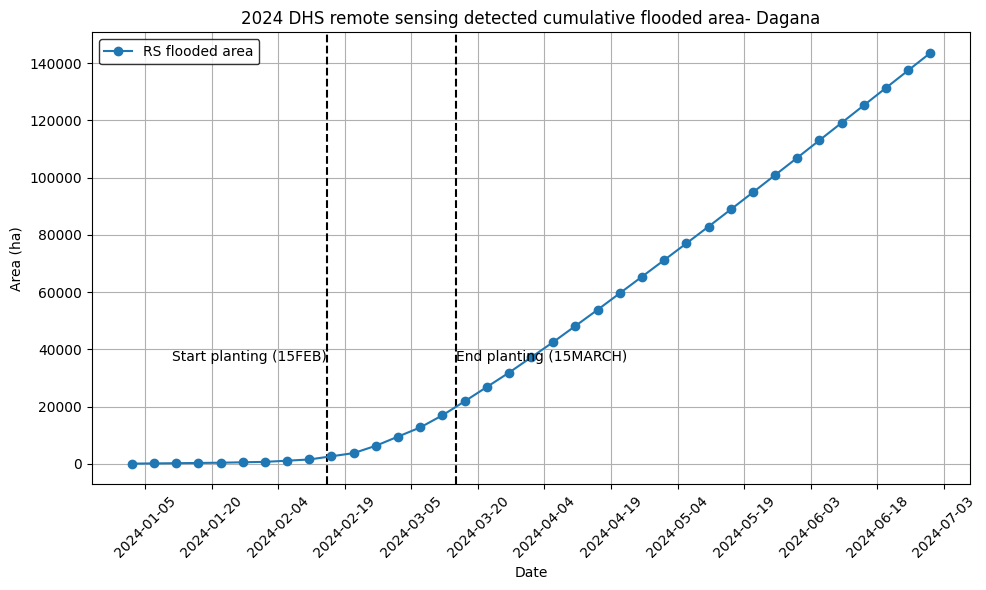

In [ ]:
#@title Plot the cumulative flooded areas
# Select columns that match the date format
clean_df = final_df[~np.array(final_df['flooding_date']=='0')]

clean_df ['RS flooding doy'] = pd.to_datetime( clean_df ['flooding_date']).dt.dayofyear
rs_hueristics_df = clean_df.filter(regex=('\d{4}-?\d{2}-?\d{2}$'))

area_rs_24 = rs_hueristics_df.sum(axis=0)
rs_df_24 = pd.DataFrame()
rs_df_24['Date'] = list(area_rs_24.index)
rs_df_24['Area(ha)'] = list(area_rs_24.values)
rs_df_24['Data_source'] ='S2 MNDWI 2024'


# Convert date strings to datetime objects
start_date = datetime.strptime('2024-02-15', '%Y-%m-%d')
end_date = datetime.strptime('2024-03-15', '%Y-%m-%d')

# Create a line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add vertical lines for start and end dates
ax.axvline(start_date, color='black', linestyle='--')
ax.axvline(end_date, color='black', linestyle='--')

# Add labels for the vertical lines
ax.text(start_date, 35000, 'Start planting (15FEB)', ha='right', va='bottom', color='black')
ax.text(end_date, 35000, 'End planting (15MARCH)', ha='left', va='bottom', color='black')

# Convert the 'Time' column to datetime
rs_df_24['Date'] = pd.to_datetime(rs_df_24['Date'])
rs_df_24['date'] = pd.to_datetime(rs_df_24['Date'])

# Create a line plot
ax.plot(rs_df_24['Date'], rs_df_24['Area(ha)'], label='RS flooded area', marker='o', linestyle='-')
ax.set_title('2024 DHS remote sensing detected cumulative flooded area- Dagana')
ax.set_xlabel('Date')
ax.set_ylabel('Area (ha)')

# Customize the x-axis time interval
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create a DayLocator with the desired interval (e.g., 7 days for weekly ticks)
desired_interval = 15
day_locator = DayLocator(interval=desired_interval)

# Format the date labels
date_format = DateFormatter("%Y-%m-%d")

# Set the x-axis locator and formatter
ax.xaxis.set_major_locator(day_locator)
ax.xaxis.set_major_formatter(date_format)

# Add the legend with specified edgecolor
legend = ax.legend(frameon=True, edgecolor='black')
frame = legend.get_frame()
frame.set_facecolor('white')  # Set the legend background color
frame.set_linewidth(1)  # Adjust the border thickness

ax.grid(True)

# Identify peak flooding periods
peak_flooding_dates = rs_df_24.nlargest(3, 'Area(ha)')
rs_df_24['date'] = pd.to_datetime(rs_df_24['Date'])

# Generate the analysis for the bulletin
timeline_analysis = f"""

Key observations:


    - The peak flooding periods occurred on the following dates:

        1. {peak_flooding_dates.iloc[0]['date'].strftime('%Y-%m-%d')}: {peak_flooding_dates.iloc[0]['Area(ha)']:.2f}

        2. {peak_flooding_dates.iloc[1]['date'].strftime('%Y-%m-%d')}: {peak_flooding_dates.iloc[1]['Area(ha)']:.2f}

        3. {peak_flooding_dates.iloc[2]['date'].strftime('%Y-%m-%d')}: {peak_flooding_dates.iloc[2]['Area(ha)']:.2f}

"""

plt.tight_layout()
plt.show()

In [ ]:
rs_df_24

,Date,Area(ha),Data_source,date
0,2024-02-01,1338.03,S2 MNDWI 2024,2024-02-01
1,2024-02-06,8464.88,S2 MNDWI 2024,2024-02-06
2,2024-02-11,30954.32,S2 MNDWI 2024,2024-02-11


In [ ]:
# Initialize the cumulative flood mask with ones for the first image
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(dagana) \
                .filterDate('2024-01-07','2024-01-08') \
                .first()
projection = first_image.select('B2').projection()
scale = first_image.select('B2').projection().nominalScale()
print(projection)

In [ ]:
import rasterio as rio
rio.open(first_image)

In [ ]:
import ee
import folium

# Initialize the Earth Engine module.
ee.Initialize()

# Function to add Earth Engine layers to Folium map
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map data © Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Load a Landsat 8 image and select bands
image = ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318')

# Calculate MNDWI
mndwi = image.normalizedDifference(['B3', 'B6']).rename('MNDWI')

# Create a binary mask for standing water
water_mask = mndwi.gt(3)

# Create a Folium map
map = folium.Map(location=[37.6413, -122.2582], zoom_start=10)
map.add_ee_layer(water_mask, {'palette': ['white','blue']}, 'Standing Water')
map.add_child(folium.LayerControl())





In [ ]:
#@title updated - Process the images and extract flooded areas
import os
from rasterio.plot import show
import matplotlib.pyplot as plt
import ee
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter, DayLocator
os.chdir('/content/gdrive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow')
from datetime import datetime
from IPython.display import display
import geemap
from branca.colormap import LinearColormap

#@title Process the images and extract flooded areas
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
#m = geemap.Map(location=[center_lat, center_lon], zoom_start=10)
# Function to add Earth Engine layers to Folium map
def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    """
    Add an Earth Engine image layer to a Folium map.

    Parameters:
    - ee_image_object: The Earth Engine image object.
    - vis_params: Visualization parameters.
    - name: Name of the layer.
    - opacity: Opacity of the layer.
    - band: Specific band to display.
    """
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

# Function to process each date
def process_each_date(aoi, date):
    """
    Process each date to identify potential flood areas using Sentinel-2 data.

    Parameters:
    - aoi: Area of interest.
    - date: Date to process.

    Returns:
    - current_mask: A mask image indicating flood-prone areas.
    """
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()#.clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    # Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)

    #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')

    # Combine all conditions
    current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_and_grassland_mask)
   # print('i am here>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    return current_mask

# Function to get day of year
def get_doy(date_string):
    """
    Get the day of the year from a date string.

    Parameters:
    - date_string: Date in the format 'YYYY-MM-DD'.

    Returns:
    - doy: Day of the year.
    """
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday
# Date range processing
def enhanced_date_processing(start_date, end_date, interval_days=5):
    """
    Generate a list of dates to process within a specified range and interval.

    Parameters:
    - start_date: Start date (YYYY-MM-DD).
    - end_date: End date (YYYY-MM-DD).
    - interval_days: Interval in days between each processed date.

    Returns:
    - date_list: List of date strings.
    """
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to get day of year
def get_doy(date_string):
    """
    Get the day of the year from a date string.

    Parameters:
    - date_string: Date in the format 'YYYY-MM-DD'.

    Returns:
    - doy: Day of the year.
    """
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-02-11'
date_ranges = enhanced_date_processing(start_date, end_date)

# Initialize the cumulative flood mask with ones for the first image
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(dagana) \
                .filterDate('2024-01-07','2024-01-08') \
                .first()
projection = first_image.select('B2').projection()
scale = first_image.select('B2').projection().nominalScale()
cumulative_flood_mask = ee.Image(1).clip(dagana).reproject(crs=projection, scale=scale)
# Initialize a list to store flood data
flood_data = []

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    """
    Calculate flood area for each grid cell using a flood mask.

    Parameters:
    - flood_mask: Image indicating flood areas.
    - grid: Grid of features for zonal statistics.

    Returns:
    - Grid with flood area information.
    """
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha',area_ha) #area.get('MNDWI'))
    return grid.map(calculate_area)

# Process images for each date range
for i, date in enumerate(date_ranges):
    #print(f"Processing date: {date}")
    current_mndwi = process_each_date(grid, date)
    if current_mndwi is not None:
        doy = get_doy(date)

        if i == 0:  # Base date
            base_date_mask = current_mndwi.gt(0)
            #print('base_date_mask',base_date_mask.getInfo())
            #cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 1
            cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            #print('cumulative_flood_mask1',cumulative_flood_mask.getInfo())
            # flood_value_mask = base_date_mask.multiply(doy)
            #cumulative_flood_mask = flood_value_mask
        else:
            new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(1))
            #print('new_areas',new_areas.getInfo())
            flood_value_mask = new_areas.multiply(doy)
            cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)
            #print('cumulative_flood_mask_2',cumulative_flood_mask.getInfo())

        # Calculate flood area for each grid cell
        grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(3), grid)
        flood_data.extend(grid_with_flood_area.getInfo()['features'])
        #print('grid_with_flood_area',grid_with_flood_area.getInfo())

        # Get the results
        #grid_flood_data = grid_with_flood_area.getInfo()['features']

        # for feature in grid_flood_data:
        #     grid_id = feature['properties']['ID']
        #     flood_area_m2 = feature['properties'].get('flood_area_m2', 0)
        #     flood_area_ha = flood_area_m2 / 10000 if flood_area_m2 is not None else 0

        #     flood_data.append({
        #         'date': date,
        #         'grid_id': grid_id,
        #         'flood_area_ha': flood_area_ha,
        #         **feature['properties']  # Include all other grid properties
        #     })

             # Visualize cumulative flood mask
        visualization_mask = cumulative_flood_mask.gt(0)
        add_ee_layer(visualization_mask.clip(dagana), {'palette': 'blue'}, f'Cumulative Flooded Areas {date}', opacity=0.7)

        # Visualize flood progression
        add_ee_layer(cumulative_flood_mask.clip(dagana),
                     {'min': get_doy(date_ranges[0]), 'max': doy, 'palette': ['blue', 'cyan', 'green', 'yellow', 'red']},
                     f'Flood Progression {date}',
                     opacity=0.7)

        # Export high-resolution image
        visualization = cumulative_flood_mask.clip(dagana).visualize(**{
            'min': get_doy(date_ranges[0]),
            'max': doy,
            'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
        })

        # task = ee.batch.Export.image.toDrive(
        #     image=visualization,
        #     description=f'Flood_Progression_{date}',
        #     scale=10,
        #     region=dagana.geometry(),
        #     fileFormat='GeoTIFF'
        # )
        # task.start()
    else:
        print(f"Skipping date {date} due to no valid MNDWI")


# Add color map legend
colormap = LinearColormap(
    colors=['blue', 'cyan', 'green', 'yellow', 'red'],
    vmin=get_doy(date_ranges[0]),
    vmax=get_doy(date_ranges[-1])
)
colormap.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)


# Create DataFrame
df = pd.DataFrame(flood_data)

# Calculate cumulative flood area for each grid
df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()
# Pivot the data back to wide format, using date columns
# Pivot the DataFrame to have dates as columns
df_pivoted = df.pivot(index='grid_id', columns='date', values='cumulative_flood_area_ha')
df_pivoted.columns.name = None

# Add total flooding area and flooding date columns
df_pivoted['total_flooding_area'] = df_pivoted.max(axis=1)
df_pivoted['flooding_date'] = df_pivoted.idxmax(axis=1)

# Merge the pivoted data with the original grid properties
grid_properties = df.drop(['date', 'flood_area_ha', 'cumulative_flood_area_ha','flood_area_m2'], axis=1).drop_duplicates(subset='grid_id')
final_df = pd.merge(df_pivoted.reset_index(), grid_properties, on='grid_id')

# # Reorder columns so grid details come first
final_df = final_df[grid_properties.columns.tolist() + [col for col in final_df.columns if col not in grid_properties.columns.tolist()]]


# Save to CSV
#final_df.to_csv('grid_flood_analysis.csv', index=False)
# print("CSV file saved as 'grid_flood_analysis.csv'")


KeyError: 'grid_id'

In [ ]:
# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    """
    Calculate flood area for each grid cell using a flood mask.

    Parameters:
    - flood_mask: Image indicating flood areas.
    - grid: Grid of features for zonal statistics.

    Returns:
    - Grid with flood area information.
    """
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        area_ha = area.getNumber('constant').divide(10000).format('%.2f')
        return feature.set('flood_area_ha',area_ha) #area.get('MNDWI'))
    return grid.map(calculate_area)

def add_ee_layer(map_obj, ee_image_object, vis_params, name, opacity=0.7, shown=True):
    """
    Add an Earth Engine image layer to a Folium map.
    """
    try:
        if isinstance(ee_image_object, ee.Image):
            map_id_dict = ee_image_object.getMapId(vis_params)
            folium.raster_layers.TileLayer(
                tiles=map_id_dict['tile_fetcher'].url_format,
                attr='Map Data © Google Earth Engine',
                name=name,
                overlay=True,
                control=True,
                opacity=opacity,
                shown=shown
            ).add_to(map_obj)
        else:
            raise ValueError("Invalid Earth Engine object passed.")
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")
# Function to get day of year
def get_doy(date_string):
    """
    Get the day of the year from a date string.

    Parameters:
    - date_string: Date in the format 'YYYY-MM-DD'.

    Returns:
    - doy: Day of the year.
    """
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def extract_flood_data(features, date):
    """
    Extract flood-related data from Earth Engine feature collection information.

    Parameters:
    - features: A list of features from an Earth Engine API response, typically from `getInfo()` on an ee.FeatureCollection.
    - date: The date associated with the flood data collection, as a string.

    Returns:
    - List of dictionaries containing extracted data for each feature.
    """
    flood_data = []
    for feature in features:
        # Extract relevant properties from each feature
        # These properties depend on what's available in your feature collection
        grid_id = feature['properties']['ID']
        # Assuming 'flood_area_ha' is calculated and included in the feature properties
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)

        # Append the processed data in a dictionary format to the list
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha,
            **feature['properties']  # Include all other grid properties
            # Add additional lines here if you have more properties to include
        })

    return flood_data
def visualize_flooding(map_obj, flood_mask, date, doy):
    """
    Visualize flooding on a Folium map.

    Parameters:
    - map_obj: The Folium map object to which layers will be added.
    - flood_mask: The Earth Engine Image object representing the flood mask.
    - date: The date string representing when the image was processed.
    - doy: Day of the year, used for dynamic visualization parameters.

    """
    # Define visualization parameters
    vis_params = {
        'min': 0,
        'max': 1,
        'palette': ['blue', 'green']
    }

    # Add the flood mask as a new layer to the map
    try:
        layer_name = f'Flood Mask {date}'
        add_ee_layer(map_obj, flood_mask, vis_params, layer_name, opacity=0.7)
    except Exception as e:
        print(f"Failed to add flood visualization for {date}: {str(e)}")

    # Optionally, add additional visualizations such as flood progression
    progression_vis_params = {
        'min': get_doy(date_ranges[0]),
        'max': doy,
        'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
    }
    progression_layer_name = f'Flood Progression on {date}'
    add_ee_layer(map_obj, flood_mask, progression_vis_params, progression_layer_name, opacity=0.7)


def create_flood_dataframe(flood_data):
    """
    Create a DataFrame from a list of flood data dictionaries.

    Parameters:
    - flood_data: List of dictionaries with keys including 'date', 'grid_id', 'flood_area_ha', and possibly other grid properties.

    Returns:
    - DataFrame: A pandas DataFrame containing the organized flood data.
    """
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(flood_data)

    # Optional: Convert 'date' from string to datetime format for easier manipulation
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' and 'grid_id' as an index if desired
    df.set_index(['date', 'grid_id'], inplace=True)

    # Return the DataFrame
    return df
def process_flood_results(df, grid_properties):
    """
    Process the DataFrame containing flood data to extract useful insights or summaries.
    Parameters:
    - df: pandas DataFrame containing flood data with columns like 'date', 'grid_id', 'flood_area_ha'.
    - grid_properties: DataFrame or dictionary containing additional properties for each grid that need to be merged with flood results.
    Returns:
    - final_df: A pandas DataFrame with processed results and additional grid properties merged.
    """
    # Convert 'flood_area_ha' to numeric type if it's not already
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

    # Handling missing values after conversion, if any
    df['flood_area_ha'].fillna(0, inplace=True)

    # Calculate cumulative flood area over time for each grid
    df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()

    # If grid_properties is a DataFrame, ensure it has 'grid_id' as an index or as a column
    if isinstance(grid_properties, pd.DataFrame):
        # Merge additional properties from grid_properties DataFrame
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        # If grid_properties is a dictionary or another format, adjust this code accordingly
        final_df = df  # This line can be modified to incorporate additional merging logic

    # Return the processed DataFrame
    return final_df

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to process each date
def process_each_date(aoi, date):
    """
    Process each date to identify potential flood areas using Sentinel-2 data.

    Parameters:
    - aoi: Area of interest.
    - date: Date to process.

    Returns:
    - current_mask: A mask image indicating flood-prone areas.
    """
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()#.clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    # Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)

    #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')

    # Combine all conditions
    current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_and_grassland_mask)
   # print('i am here>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    return current_mask
# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-05-31'
date_ranges = enhanced_date_processing(start_date, end_date)

# Function to process and visualize flooding for each date
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(1).reproject(crs=projection, scale=10).clip(aoi)

    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(1))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))

            visualize_flooding(m, cumulative_flood_mask, date, doy)
        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    return flood_data

# Add layer control and save the map
folium.LayerControl().add_to(m)
# m.save('flood_map.html')

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
#Reset the index to make 'date' and 'grid_id' regular columns
df = df.reset_index()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Pivot the table
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')

# Merge with the other columns you want to keep
columns_to_keep = ['ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid']
df_other = df[columns_to_keep].drop_duplicates().set_index('ID')

# Ensure 'grid_id' and 'ID' are the same
df_pivoted = df_pivoted.rename_axis(index='ID')

# Merge the pivoted data with other columns
df_final = df_other.join(df_pivoted)

# Reset index to make 'ID' a regular column
df_final = df_final.reset_index()

# Optionally, sort the columns
date_columns = [col for col in df_final.columns if col not in columns_to_keep]
df_final = df_final[columns_to_keep + sorted(date_columns)]


In [ ]:
df_final.to_csv('flood_analysis.csv', index=False)

In [ ]:
rs_hueristics_df

,2024-01-12,2024-01-17,2024-01-22,2024-01-27,2024-02-01,2024-02-06,2024-02-11,2024-02-16,2024-02-21,2024-02-26,...,2024-04-16,2024-04-21,2024-04-26,2024-05-01,2024-05-06,2024-05-11,2024-05-16,2024-05-21,2024-05-26,2024-05-31
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.11,0.12,...,8.37,8.68,8.68,8.68,8.71,8.71,8.71,9.07,9.07,9.09
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,3.23,...,23.07,28.79,28.79,28.94,29.44,29.50,29.50,30.21,30.21,30.21
5,0.00,0.00,0.00,0.00,0.00,0.42,0.48,0.56,0.56,4.06,...,88.76,102.27,102.30,104.96,106.78,106.98,106.98,107.53,107.53,107.68
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85.34,...,183.13,183.32,183.32,183.32,183.38,183.38,183.58,183.58,183.58,183.58
7,0.00,0.00,0.00,0.00,0.00,0.00,1.81,1.81,1.81,5.16,...,14.16,14.16,15.48,15.48,15.61,15.64,15.64,15.82,15.82,15.83
8,0.00,0.00,0.00,0.00,0.00,0.62,6.31,6.31,6.31,10.90,...,13.45,13.45,14.01,14.01,14.01,14.01,14.01,14.02,14.02,14.02
9,0.00,0.42,0.42,3.37,3.37,10.94,10.94,30.80,30.80,91.56,...,218.18,219.16,219.16,219.16,229.41,255.03,302.28,302.28,333.90,333.90


In [ ]:
area_rs_24 = rs_hueristics_df.sum(axis=0)
rs_df_24 = pd.DataFrame()
rs_df_24['Date'] = list(area_rs_24.index)
rs_df_24['Area(ha)'] = list(area_rs_24.values)
rs_df_24['Data_source'] ='S2 MNDWI 2024'

In [ ]:
area_rs_24

,0
2024-01-12,0.000.000.000.000.000.000.000.000.000.000.000....
2024-01-17,0.000.000.000.000.000.000.000.000.000.420.060....
2024-01-22,0.000.000.000.000.000.000.000.000.000.420.060....
2024-01-27,0.000.000.000.000.000.000.000.000.003.373.060....
2024-02-01,0.000.000.000.000.000.000.000.000.003.373.060....
2024-02-06,0.000.000.000.000.000.420.000.000.6210.9436.45...
2024-02-11,0.000.000.000.000.000.480.001.816.3110.9436.45...
2024-02-16,0.110.000.000.000.030.560.001.816.3130.80110.3...
2024-02-21,0.110.000.000.000.030.560.001.816.3130.80110.3...
2024-02-26,0.120.000.000.003.234.0685.345.1610.9091.56226...


In [ ]:
#@title Plot the cumulative flooded areas
# Select columns that match the date format
clean_df = df_final#[~np.array(df_final['flooding_date']=='0')]

#clean_df ['RS flooding doy'] = pd.to_datetime( clean_df ['flooding_date']).dt.dayofyear
rs_hueristics_df = clean_df.filter(regex=('\d{4}-?\d{2}-?\d{2}$'))

area_rs_24 = rs_hueristics_df.sum(axis=0)
rs_df_24 = pd.DataFrame()
rs_df_24['Date'] = list(area_rs_24.index)
rs_df_24['Area(ha)'] = list(area_rs_24.values)
rs_df_24['Data_source'] ='S2 MNDWI 2024'


# Convert date strings to datetime objects
start_date = datetime.strptime('2024-02-15', '%Y-%m-%d')
end_date = datetime.strptime('2024-03-15', '%Y-%m-%d')

# Create a line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add vertical lines for start and end dates
ax.axvline(start_date, color='black', linestyle='--')
ax.axvline(end_date, color='black', linestyle='--')

# Add labels for the vertical lines
ax.text(start_date, 5000, 'Start planting (15FEB)', ha='right', va='bottom', color='black')
ax.text(end_date, 5000, 'End planting (15MARCH)', ha='left', va='bottom', color='black')

# Convert the 'Time' column to datetime
rs_df_24['Date'] = pd.to_datetime(rs_df_24['Date'])
rs_df_24['date'] = pd.to_datetime(rs_df_24['Date'])

# Create a line plot
ax.plot(rs_df_24['Date'], rs_df_24['Area(ha)'], label='RS flooded area', marker='o', linestyle='-')
ax.set_title('2024 DHS remote sensing detected cumulative flooded area- Dagana')
ax.set_xlabel('Date')
ax.set_ylabel('Area (ha)')

# Customize the x-axis time interval
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create a DayLocator with the desired interval (e.g., 7 days for weekly ticks)
desired_interval = 15
day_locator = DayLocator(interval=desired_interval)

# Format the date labels
date_format = DateFormatter("%Y-%m-%d")

# Set the x-axis locator and formatter
ax.xaxis.set_major_locator(day_locator)
ax.xaxis.set_major_formatter(date_format)

# Add the legend with specified edgecolor
legend = ax.legend(frameon=True, edgecolor='black')
frame = legend.get_frame()
frame.set_facecolor('white')  # Set the legend background color
frame.set_linewidth(1)  # Adjust the border thickness

ax.grid(True)

# Identify peak flooding periods
peak_flooding_dates = rs_df_24.nlargest(3, 'Area(ha)')
rs_df_24['date'] = pd.to_datetime(rs_df_24['Date'])

# Generate the analysis for the bulletin
timeline_analysis = f"""

Key observations:


    - The peak flooding periods occurred on the following dates:

        1. {peak_flooding_dates.iloc[0]['date'].strftime('%Y-%m-%d')}: {peak_flooding_dates.iloc[0]['Area(ha)']:.2f}

        2. {peak_flooding_dates.iloc[1]['date'].strftime('%Y-%m-%d')}: {peak_flooding_dates.iloc[1]['Area(ha)']:.2f}

        3. {peak_flooding_dates.iloc[2]['date'].strftime('%Y-%m-%d')}: {peak_flooding_dates.iloc[2]['Area(ha)']:.2f}

"""

plt.tight_layout()
plt.show()

In [ ]:
m

In [ ]:
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')

In [ ]:
def add_ee_layer(map_obj, ee_image_object, vis_params, name, opacity=0.7, shown=True):
    """
    Add an Earth Engine image layer to a Folium map.
    """
    try:
        if isinstance(ee_image_object, ee.Image):
            map_id_dict = ee_image_object.getMapId(vis_params)
            folium.raster_layers.TileLayer(
                tiles=map_id_dict['tile_fetcher'].url_format,
                attr='Map Data © Google Earth Engine',
                name=name,
                overlay=True,
                control=True,
                opacity=opacity,
                shown=shown
            ).add_to(map_obj)
        else:
            raise ValueError("Invalid Earth Engine object passed.")
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")


def extract_flood_data(features, date):
    """
    Extract flood-related data from Earth Engine feature collection information.

    Parameters:
    - features: A list of features from an Earth Engine API response, typically from `getInfo()` on an ee.FeatureCollection.
    - date: The date associated with the flood data collection, as a string.

    Returns:
    - List of dictionaries containing extracted data for each feature.
    """
    flood_data = []
    for feature in features:
        # Extract relevant properties from each feature
        # These properties depend on what's available in your feature collection
        grid_id = feature['properties']['ID']
        # Assuming 'flood_area_ha' is calculated and included in the feature properties
        flood_area_ha = feature['properties'].get('flood_area_ha', 0)

        # Append the processed data in a dictionary format to the list
        flood_data.append({
            'date': date,
            'grid_id': grid_id,
            'flood_area_ha': flood_area_ha
            # Add additional lines here if you have more properties to include
        })

    return flood_data
def visualize_flooding(map_obj, flood_mask, date, doy):
    """
    Visualize flooding on a Folium map.

    Parameters:
    - map_obj: The Folium map object to which layers will be added.
    - flood_mask: The Earth Engine Image object representing the flood mask.
    - date: The date string representing when the image was processed.
    - doy: Day of the year, used for dynamic visualization parameters.

    """
    # Define visualization parameters
    vis_params = {
        'min': 0,
        'max': 1,
        'palette': ['blue', 'green']
    }

    # Add the flood mask as a new layer to the map
    try:
        layer_name = f'Flood Mask {date}'
        add_ee_layer(map_obj, flood_mask, vis_params, layer_name, opacity=0.7)
    except Exception as e:
        print(f"Failed to add flood visualization for {date}: {str(e)}")

    # Optionally, add additional visualizations such as flood progression
    progression_vis_params = {
        'min': get_doy(date_ranges[0]),
        'max': doy,
        'palette': ['blue', 'cyan', 'green', 'yellow', 'red']
    }
    progression_layer_name = f'Flood Progression on {date}'
    add_ee_layer(map_obj, flood_mask, progression_vis_params, progression_layer_name, opacity=0.7)


def create_flood_dataframe(flood_data):
    """
    Create a DataFrame from a list of flood data dictionaries.

    Parameters:
    - flood_data: List of dictionaries with keys including 'date', 'grid_id', 'flood_area_ha', and possibly other grid properties.

    Returns:
    - DataFrame: A pandas DataFrame containing the organized flood data.
    """
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(flood_data)

    # Optional: Convert 'date' from string to datetime format for easier manipulation
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' and 'grid_id' as an index if desired
    df.set_index(['date', 'grid_id'], inplace=True)

    # Return the DataFrame
    return df
def process_flood_results(df, grid_properties):
    """
    Process the DataFrame containing flood data to extract useful insights or summaries.
    Parameters:
    - df: pandas DataFrame containing flood data with columns like 'date', 'grid_id', 'flood_area_ha'.
    - grid_properties: DataFrame or dictionary containing additional properties for each grid that need to be merged with flood results.
    Returns:
    - final_df: A pandas DataFrame with processed results and additional grid properties merged.
    """
    # Convert 'flood_area_ha' to numeric type if it's not already
    df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

    # Handling missing values after conversion, if any
    df['flood_area_ha'].fillna(0, inplace=True)

    # Calculate cumulative flood area over time for each grid
    df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()

    # If grid_properties is a DataFrame, ensure it has 'grid_id' as an index or as a column
    if isinstance(grid_properties, pd.DataFrame):
        # Merge additional properties from grid_properties DataFrame
        final_df = pd.merge(df.reset_index(), grid_properties, on='grid_id', how='left')
    else:
        # If grid_properties is a dictionary or another format, adjust this code accordingly
        final_df = df  # This line can be modified to incorporate additional merging logic

    # Return the processed DataFrame
    return final_df

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to process each date
def process_each_date(aoi, date):
    """
    Process each date to identify potential flood areas using Sentinel-2 data.

    Parameters:
    - aoi: Area of interest.
    - date: Date to process.

    Returns:
    - current_mask: A mask image indicating flood-prone areas.
    """
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    # Load the Sentinel-2 image collection
    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20))
    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic()#.clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)
    # Apply JRC masks to refine flood detection
    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(1).Or(jrcYearly_dataset.eq(2))
    non_permanent_water3 = jrcMonthly_dataset.eq(1)

    #Apply the croplandmask- ESA/V200
    cropland_and_grassland_mask  = land_cover_dataset.eq(40)#.Or(land_cover_dataset.eq(30))

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')

    # Combine all conditions
    current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_and_grassland_mask)
   # print('i am here>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    return current_mask
# Define the date range for processing
start_date = '2024-01-12'
end_date = '2024-02-11'
date_ranges = enhanced_date_processing(start_date, end_date)

# Function to process and visualize flooding for each date
def process_and_visualize_flooding(aoi, date_ranges, grid):
    flood_data = []
    first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(aoi).first()
    projection = first_image.select('B2').projection()
    cumulative_flood_mask = ee.Image(1).reproject(crs=projection, scale=10).clip(aoi)

    for i, date in enumerate(date_ranges):
        current_mndwi = process_each_date(aoi, date)
        if current_mndwi is not None:
            doy = get_doy(date)
            base_date_mask = current_mndwi.gt(0)
            if i == 0:
                cumulative_flood_mask = cumulative_flood_mask.where(base_date_mask, 2)
            else:
                new_areas = current_mndwi.gt(0).And(cumulative_flood_mask.eq(1))
                cumulative_flood_mask = cumulative_flood_mask.where(new_areas, doy)

            grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(3), grid)
            flood_data.extend(extract_flood_data(grid_with_flood_area.getInfo()['features'], date))

            visualize_flooding(m, cumulative_flood_mask, date, doy)
        else:
            print(f"Skipping date {date} due to no valid MNDWI")

    return flood_data

# Add layer control and save the map
folium.LayerControl().add_to(m)
# m.save('flood_map.html')

# Process flooding data and create DataFrame for analysis
flood_data = process_and_visualize_flooding(dagana, date_ranges, grid)
df = create_flood_dataframe(flood_data)
final_df = process_flood_results(df, grid_properties)
# final_df.to_csv('grid_flood_analysis.csv', index=False)
# print("CSV file saved as 'grid_flood_analysis.csv'")

NameError: name 'grid_properties' is not defined

In [ ]:
m

In [ ]:
m

In [ ]:
m

In [ ]:
# Create DataFrame
dff = pd.DataFrame(flood_data)

In [ ]:
# Pivot the data back to wide format, using date columns
wide_format_data_fixed = dff.pivot_table(
    index=['grid_id', 'ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid'],
    columns='date',
    values='flood_area_ha'
).reset_index()

In [ ]:
# Pivot the data back to wide format, using date columns
wide_format_data_fixed = long_format_data_fixed.pivot_table(
    index=['grid_id', 'ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid'],
    columns='date',
    values='flood_area_ha'
).reset_index()

# Reset column names
wide_format_data_fixed.columns.name = None

# Display the first few rows of the transformed data
tools.display_dataframe_to_user(name="Fixed Wide Format Flood Data", dataframe=wide_format_data_fixed.head())

# Display the first few rows of the fixed wide-format data
wide_format_data_fixed.head()



In [ ]:
# Pivot the data back to wide format
wide_format_data = dff.pivot_table(
    index=['grid_id', 'ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid'],
    columns='date',
    values='flood_area_ha'
).reset_index()

# Reorder the columns for better readability
# Move date columns to start after non-date columns
column_order = ['grid_id', 'ID', 'LatNP', 'Latitude', 'LonNP', 'Longitude', 'nasapid'] + list(dates)
wide_format_data = wide_format_data[column_order]

tools.display_dataframe_to_user(name="Flood Analysis Wide Format", dataframe=wide_format_data.head())

# Display the first few rows of the transformed wide-format data
wide_format_data.head()


In [ ]:
clean_df

type 2

In [ ]:
import ee
import folium
from datetime import datetime, timedelta
import pandas as pd
from branca.colormap import LinearColormap
import matplotlib.pyplot as plt
import numpy as np

# Initialize Earth Engine
ee.Initialize()

# Define the region of interest (Dagana)
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())
# Define the grid for zonal statistics
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water')
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass')

# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map')

# Function to add Earth Engine layers to Folium map
def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

# Function to process each date
def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', 20)).mosaic()

    s2_cloudless = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY') \
                    .filterBounds(aoi) \
                    .filterDate(start_period, end_period).first()

    if s2_sr_col and s2_cloudless:
        cld_prb = s2_cloudless.select('probability')
        is_cloud = cld_prb.gt(10)
        image_with_bands = s2_sr_col.addBands(ee.Image([cld_prb, is_cloud]).rename(['cloud_prob', 'clouds']))
        mndwi = image_with_bands.normalizedDifference(['B3', 'B11']).rename('MNDWI')

        non_permanent_water1 = jrcglobal_dataset.lte(10)
        non_permanent_water2 = jrcYearly_dataset.eq(2)
        non_permanent_water3 = jrcMonthly_dataset.eq(1)
        cropland_mask = land_cover_dataset.eq(40)

        current_mask = mndwi.gt(0).updateMask(non_permanent_water1).updateMask(non_permanent_water2).updateMask(non_permanent_water3).updateMask(cropland_mask)
        return mndwi, current_mask
    else:
        print(f"No valid images found for {date}, skipping...")
        return None, None

# Date range processing
def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

# Function to get day of year
def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

# Function to calculate flood area for each grid cell
def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e13
        )
        return feature.set('flood_area_m2', area.get('MNDWI'))

    return grid.map(calculate_area)

# Function to plot MNDWI distribution
def plot_mndwi_distribution(mndwi_image, date, aoi, num_samples=10000):
    samples = mndwi_image.sample(
        region=aoi,
        scale=10,
        numPixels=num_samples,
        seed=42
    )

    mndwi_values = samples.aggregate_array('MNDWI').getInfo()

    plt.figure(figsize=(10, 6))
    plt.hist(mndwi_values, bins=50, edgecolor='black')
    plt.title(f'MNDWI Distribution for {date}')
    plt.xlabel('MNDWI Value')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='r', linestyle='--', label='MNDWI = 0')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'mndwi_distribution_{date}.png')
    plt.close()

# Define the date range for processing
start_date = '2024-01-02'
end_date = '2024-02-01'
date_ranges = enhanced_date_processing(start_date, end_date)

# Initialize cumulative flood mask
cumulative_flood_mask = ee.Image(0)

# Initialize a list to store flood data
flood_data = []

# Select dates to plot MNDWI distributions
dates_to_plot = [date_ranges[0], date_ranges[len(date_ranges)//2], date_ranges[-1]]

# Process images for each date range
for i, date in enumerate(date_ranges):
    print(f"Processing date: {date}")
    current_mndwi, current_mask = process_each_date(grid, date)
    if current_mndwi is not None and current_mask is not None:
        doy = get_doy(date)

        if i == 0:  # Base date
            base_date_mask = current_mask.gt(0)
            flood_value_mask = base_date_mask.multiply(doy)
            cumulative_flood_mask = flood_value_mask
        else:
            new_areas = current_mask.gt(0).And(base_date_mask.Not())
            flood_value_mask = new_areas.multiply(doy)
            cumulative_flood_mask = cumulative_flood_mask.where(flood_value_mask, flood_value_mask)

        # Calculate flood area for each grid cell
        grid_with_flood_area = calculate_grid_flood_area(cumulative_flood_mask.gt(0), grid)

        # Get the results
        grid_flood_data = grid_with_flood_area.getInfo()['features']

        for feature in grid_flood_data:
            grid_id = feature['properties']['ID']
            flood_area_m2 = feature['properties'].get('flood_area_m2', 0)
            flood_area_ha = flood_area_m2 / 10000 if flood_area_m2 is not None else 0

            flood_data.append({
                'date': date,
                'grid_id': grid_id,
                'flood_area_ha': flood_area_ha,
                **feature['properties']
            })

        # Visualize cumulative flood mask
        visualization_mask = cumulative_flood_mask.gt(0)
        add_ee_layer(visualization_mask.clip(dagana), {'palette': 'blue'}, f'Cumulative Flooded Areas {date}', opacity=0.7)

        # Visualize flood progression
        add_ee_layer(cumulative_flood_mask.clip(dagana),
                     {'min': get_doy(date_ranges[0]), 'max': doy, 'palette': ['blue', 'cyan', 'green', 'yellow', 'red']},
                     f'Flood Progression {date}',
                     opacity=0.7)

        # Plot MNDWI distribution for selected dates
        if date in dates_to_plot:
            plot_mndwi_distribution(current_mndwi, date, dagana)

    else:
        print(f"Skipping date {date} due to no valid MNDWI")

# Add color map legend
colormap = LinearColormap(
    colors=['blue', 'cyan', 'green', 'yellow', 'red'],
    vmin=get_doy(date_ranges[0]),
    vmax=get_doy(date_ranges[-1])
)
colormap.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Create DataFrame
df = pd.DataFrame(flood_data)

# Calculate cumulative flood area for each grid
df['cumulative_flood_area_ha'] = df.groupby('grid_id')['flood_area_ha'].cumsum()

# Pivot the DataFrame to have dates as columns
df_pivoted = df.pivot(index='grid_id', columns='date', values='cumulative_flood_area_ha')
df_pivoted.columns.name = None

# Add total flooding area and flooding date columns
df_pivoted['total_flooding_area'] = df_pivoted.max(axis=1)
df_pivoted['flooding_date'] = df_pivoted.idxmax(axis=1)

# Merge the pivoted data with the original grid properties
grid_properties = df.drop(['date', 'flood_area_ha', 'cumulative_flood_area_ha','flood_area_m2'], axis=1).drop_duplicates(subset='grid_id')
final_df = pd.merge(df_pivoted.reset_index(), grid_properties, on='grid_id')

# Reorder columns so grid details come first
final_df = final_df[grid_properties.columns.tolist() + [col for col in final_df.columns if col not in grid_properties.columns.tolist()]]

# # Save to CSV
# final_df.to_csv('grid_flood_analysis.csv', index=False)
# print("CSV file saved as 'grid_flood_analysis.csv'")

# # Save the map
# m.save("flood_progression_map.html")
# print("Map saved as 'flood_progression_map.html'")

Processing date: 2024-01-02
Processing date: 2024-01-07
Processing date: 2024-01-12
Processing date: 2024-01-17
Processing date: 2024-01-22
Processing date: 2024-01-27
Processing date: 2024-02-01


In [ ]:
final_df

,grid_id,ID,LatNP,Latitude,LonNP,Longitude,nasapid,2024-01-02,2024-01-07,2024-01-12,2024-01-17,2024-01-22,2024-01-27,2024-02-01,total_flooding_area,flooding_date
0,5492683,5492683,15.75,15.958333,-16.25,-16.458333,152248,0.009560,0.019119,0.028679,0.038238,0.047798,0.057357,0.066917,0.066917,2024-02-01
1,5492684,5492684,15.75,15.958333,-16.25,-16.375000,152248,0.076475,0.152951,0.229426,0.305902,0.382377,0.458853,0.535328,0.535328,2024-02-01
2,5497003,5497003,16.25,16.041667,-16.25,-16.458333,152968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-02
3,5497004,5497004,16.25,16.041667,-16.25,-16.375000,152968,0.009555,0.019109,0.028664,0.038218,0.047773,0.057327,0.066882,0.066882,2024-02-01
4,5497005,5497005,16.25,16.041667,-16.25,-16.291667,152968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-02
5,5497006,5497006,16.25,16.041667,-16.25,-16.208333,152968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-02
6,5501323,5501323,16.25,16.125000,-16.25,-16.458333,152968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-02
7,5501324,5501324,16.25,16.125000,-16.25,-16.375000,152968,1.642934,3.295420,5.005220,6.715020,8.424819,10.134619,11.844419,11.844419,2024-02-01
8,5501325,5501325,16.25,16.125000,-16.25,-16.291667,152968,0.152852,0.305705,0.601816,0.897927,1.194038,1.490150,1.786261,1.786261,2024-02-01
9,5501326,5501326,16.25,16.125000,-16.25,-16.208333,152968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-02


In [ ]:
m

Including exclusion areas

In [ ]:
import ee
import folium
import pandas as pd
from datetime import datetime, timedelta

# Authenticate and initialize the Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-janet')

# Parameters
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 1
BUFFER = 50
CLOUD_PERCENTAGE_THRESHOLD = 20
MNDWI_THRESHOLD = 0.0

# Define the grid and region of interest
grid = ee.FeatureCollection("projects/ee-janet/assets/senegal/52_grid_dagana")
init_dagana = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana")
exclusion_area = ee.FeatureCollection("projects/ee-janet/assets/senegal/dagana_exclusion_region")
dagana = init_dagana.geometry().difference(exclusion_area.geometry())

# Get the bounding box and center of the ROI for the Folium map
roi_bounds = dagana.bounds().getInfo()['coordinates'][0]
center_lat = (roi_bounds[0][1] + roi_bounds[2][1]) / 2
center_lon = (roi_bounds[0][0] + roi_bounds[2][0]) / 2

# JRC Global Surface Water data layers
jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')
jrcMonthly_dataset = ee.Image('JRC/GSW1_4/MonthlyHistory/2021_01').select('water')
jrcYearly_dataset = ee.Image('JRC/GSW1_4/YearlyHistory/2021').select('waterClass')

# Land Cover Data
land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map')

# Initialize the Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

def add_ee_layer(ee_image_object, vis_params, name, opacity=1, band=None):
    try:
        image_to_display = ee_image_object.select(band) if band else ee_image_object
        map_id_dict = image_to_display.getMapId(vis_params)
        folium.raster_layers.TileLayer(
            tiles=map_id_dict['tile_fetcher'].url_format,
            attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
            name=name,
            overlay=True,
            control=True,
            opacity=opacity
        ).add_to(m)
    except Exception as e:
        print(f"Failed to add layer for {name}: {str(e)}")

def process_each_date(aoi, date):
    start_period = datetime.strptime(date, "%Y-%m-%d") - timedelta(days=5)
    end_period = datetime.strptime(date, "%Y-%m-%d") + timedelta(days=5)

    s2_sr_col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(aoi) \
                .filterDate(start_period, end_period) \
                .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_PERCENTAGE_THRESHOLD))

    s2_sr = s2_sr_col.sort('CLOUDY_PIXEL_PERCENTAGE').mosaic().clip(dagana)
    qa_band = s2_sr.select('QA60')
    cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))
    s2_sr_masked = s2_sr.updateMask(cloud_mask)

    non_permanent_water1 = jrcglobal_dataset.lte(10)
    non_permanent_water2 = jrcYearly_dataset.eq(2)
    non_permanent_water3 = jrcMonthly_dataset.eq(1)
    cropland_mask = land_cover_dataset.eq(40)
    combined_mask = non_permanent_water1.Or(non_permanent_water2).Or(non_permanent_water3).Or(cropland_mask)

    mndwi = s2_sr_masked.normalizedDifference(['B3', 'B11']).rename('MNDWI')
    current_mask = mndwi.gt(MNDWI_THRESHOLD)
    return current_mask

def enhanced_date_processing(start_date, end_date, interval_days=5):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    date_list = []
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += timedelta(days=interval_days)
    return date_list

def get_doy(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d')
    return date.timetuple().tm_yday

def calculate_grid_flood_area(flood_mask, grid):
    def calculate_area(feature):
        area = flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e9
        )
        area_ha = area.getNumber('MNDWI').divide(10000).format('%.2f')
        return feature.set('flood_area_ha', area_ha)
    return grid.map(calculate_area)

# Define the date range for processing
start_date = '2024-01-07'
end_date = '2024-02-01'
date_ranges = enhanced_date_processing(start_date, end_date)

# Initialize the cumulative flood mask with zeros for the entire region
first_image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                .filterBounds(dagana) \
                .filterDate(date_ranges[0], date_ranges[-1]) \
                .first()
projection = first_image.select('B2').projection()
scale = first_image.select('B2').projection().nominalScale()
cumulative_flood_mask = ee.Image(0).clip(dagana).reproject(crs=projection, scale=scale)

flood_data = []
dates_to_plot = [date_ranges[0], date_ranges[len(date_ranges)//2], date_ranges[-1]]

for i, date in enumerate(date_ranges):
    print(f"Processing date: {date}")
    current_mndwi = process_each_date(grid, date)

    if current_mndwi is not None:
        doy = get_doy(date)
        current_flood_mask = current_mndwi.gt(MNDWI_THRESHOLD)

        # Update the cumulative flood mask: add new flooded areas
        cumulative_flood_mask = cumulative_flood_mask.add(current_flood_mask)

        # Calculate the flooded area for the current date
        grid_with_flood_area = calculate_grid_flood_area(current_flood_mask, grid)
        grid_flood_data = grid_with_flood_area.getInfo()['features']

        for feature in grid_flood_data:
            grid_id = feature['properties']['ID']
            flood_data.append({
                'date': date,
                'grid_id': grid_id,
                **feature['properties']
            })

        # Visualization: Flood map for the current date
        flood_progression_viz = {
            'min': 0,
            'max': len(date_ranges),
            'palette': ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
        }

        add_ee_layer(cumulative_flood_mask.clip(dagana),
                     flood_progression_viz,
                     f'Flood Progression (Up to {date})',
                     opacity=1)
    else:
        print(f"Skipping date {date} due to no valid MNDWI")

folium.LayerControl().add_to(m)

# Create DataFrame
df = pd.DataFrame(flood_data)
df['flood_area_ha'] = pd.to_numeric(df['flood_area_ha'], errors='coerce')

# Pivot the DataFrame to have dates as columns
df_pivoted = df.pivot(index='grid_id', columns='date', values='flood_area_ha')
df_pivoted.columns.name = None

# Add total flooding area and first flooding date columns
df_pivoted['total_flooding_area'] = df_pivoted.sum(axis=1)
df_pivoted['first_flooding_date'] = df_pivoted.apply(lambda row: row.first_valid_index(), axis=1)

# Display the final DataFrame
df_pivoted

Processing date: 2024-01-07
Processing date: 2024-01-12
Processing date: 2024-01-17
Processing date: 2024-01-22
Processing date: 2024-01-27
Processing date: 2024-02-01


,2024-01-07,2024-01-12,2024-01-17,2024-01-22,2024-01-27,2024-02-01,total_flooding_area,first_flooding_date
grid_id,,,,,,,,
5492683,1029.07,1048.39,1048.39,0.00,0.00,0.00,3125.85,2024-01-07
5492684,36.00,38.03,38.03,0.00,0.00,0.00,112.06,2024-01-07
5497003,1207.35,1247.15,1247.15,0.00,0.00,0.00,3701.65,2024-01-07
5497004,373.50,366.09,366.09,0.00,0.00,0.00,1105.68,2024-01-07
5497005,39.59,36.57,36.57,0.00,0.00,0.00,112.73,2024-01-07
5497006,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2024-01-07
5501323,369.82,452.46,452.46,0.00,0.00,0.00,1274.74,2024-01-07
5501324,373.69,381.88,381.88,0.00,0.00,0.00,1137.45,2024-01-07
5501325,201.38,214.07,214.07,0.00,0.00,0.00,629.52,2024-01-07


Now, let's modify the ee_flooding_module function to return a dictionary of flood masks for each date, along with the grid results:

Now, let's create a function to plot the flooding maps for each date:

In [ ]:
def ee_flooding_module(region, start_date, end_date, grid):
    # Parameters
    CLOUD_PERCENTAGE_THRESHOLD = 20
    MNDWI_THRESHOLD = 0.0

    # Load datasets
    jrcglobal_dataset = ee.Image("JRC/GSW1_4/GlobalSurfaceWater").select('occurrence')
    land_cover_dataset = ee.ImageCollection('ESA/WorldCover/v200').first().select('Map')

    # Initialize the cumulative flood mask
    cumulative_flood_mask = ee.Image.constant(0).clip(region)

    def process_image(image):
        date = image.date()
        doy = date.getRelative('day', 'year').add(1)

        # Cloud masking
        qa_band = image.select('QA60')
        cloud_mask = qa_band.bitwiseAnd(1 << 10).eq(0).And(qa_band.bitwiseAnd(1 << 11).eq(0))

        # Calculate MNDWI
        mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')

        # Create water mask
        water_mask = mndwi.gt(MNDWI_THRESHOLD)

        # Exclude permanent water and include only cropland
        non_permanent_water = jrcglobal_dataset.lte(10)
        cropland_mask = land_cover_dataset.eq(40)
        combined_mask = non_permanent_water.Or(cropland_mask)

        # Final flood mask
        flood_mask = water_mask.And(cloud_mask).And(combined_mask)

        return image.addBands(flood_mask.rename('flood_mask')).set('date', date.format('YYYY-MM-dd'))

    # Get Sentinel-2 image collection
    s2_collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
        .filterBounds(region) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_PERCENTAGE_THRESHOLD)) \
        .map(process_image)

    # Create cumulative flood mask
    final_flood_mask = s2_collection.select('flood_mask').max()

    # Calculate flooded area for each grid cell
    def calculate_grid_flood_area(feature):
        area = final_flood_mask.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=feature.geometry(),
            scale=10,
            maxPixels=1e9
        )
        area_ha = ee.Number(area.get('flood_mask')).divide(10000)
        return feature.set('flood_area_ha', area_ha)

    grid_with_flood_area = grid.map(calculate_grid_flood_area)

    return final_flood_mask, grid_with_flood_area, s2_collection

# Usage:
flood_mask, grid_results, flood_collection = ee_flooding_module(region, start_date, end_date, grid)

In [ ]:
flood_mask

maps(flood_masks_dict, region, grid)

Finally, let's create a summary of the flooding progression:

In [ ]:
def summarize_flooding(df_grid_results):
    total_flooded_area = df_grid_results['flood_area_ha'].sum()
    num_affected_grids = (df_grid_results['flood_area_ha'] > 0).sum()

    print(f"Total flooded area: {total_flooded_area:.2f} hectares")
    print(f"Number of affected grid cells: {num_affected_grids}")

    # You can add more summary statistics here

# Usage:
summarize_flooding(df_grid_results)

Total flooded area: 1199.61 hectares
Number of affected grid cells: 50


Now you have:

A DataFrame (df_grid_results) containing the flood area for each grid cell.
A function to plot flood maps for each date.
A summary of the flooding progression.

To use all of this:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ee

def plot_flood_maps(flood_collection, region, grid):
    # Get the dates
    dates = flood_collection.aggregate_array('date').getInfo()

    num_dates = len(dates)
    cols = 3
    rows = (num_dates + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(20, 5*rows))
    axs = axs.ravel()

    for i, date in enumerate(dates):
        # Get the flood mask for this date
        flood_mask = flood_collection.filter(ee.Filter.eq('date', date)).first().select('flood_mask')

        # Get the dimensions of the image
        dimensions = flood_mask.clip(region).projection().nominalScale().getInfo()

        # Get the flood mask as a numpy array
        flood_array = flood_mask.clip(region).reproject(crs='EPSG:4326', scale=dimensions).reduceRegion(
            reducer=ee.Reducer.toList(),
            geometry=region,
            scale=dimensions,
            maxPixels=1e9
        ).getInfo()['flood_mask']

        # Get the actual dimensions of the region
        bounds = region.bounds().getInfo()['coordinates'][0]
        width = int((bounds[2][0] - bounds[0][0]) / dimensions)
        height = int((bounds[1][1] - bounds[0][1]) / dimensions)

        flood_array = np.array(flood_array).reshape((height, width))

        # Plot the flood mask
        axs[i].imshow(flood_array, cmap='Blues')
        axs[i].set_title(f'Flood Extent on {date}')
        axs[i].axis('off')

        # Add grid overlay
        grid_coords = ee.FeatureCollection(grid).geometry().coordinates().getInfo()
        for polygon in grid_coords:
            xs, ys = zip(*polygon[0])
            axs[i].plot(xs, ys, color='red', linewidth=0.5)

    # Remove extra subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Usage:
plot_flood_maps(flood_collection, region, grid)

In [ ]:
# Run the flooding module
flood_mask, grid_results, flood_masks_dict = ee_flooding_module(region, start_date, end_date, grid)

# Convert grid results to DataFrame
df_grid_results = ee_fc_to_df(grid_results)

# Plot flood maps
plot_flood_maps(flood_masks_dict, region, grid)

# Summarize flooding
summarize_flooding(df_grid_results)